In [2]:
import utilities as utils
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier


    Last Execution: 2022-04-09 15:54:55.681786
    python:	3.8.5

    	fastai:		2.5.6
    	matplotlib:	3.5.1
    	numpy:		1.19.5
    	pandas:		1.4.1
    	seaborn:	0.11.2
    	sklearn:	1.0.2
    	torch:		1.11.0+cu102
    	yellowbrick:	1.4
    	imblearn:	0.9.0
    


/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
data_path_1: str = './synthetic/'   
data_path_2: str = '../../../Data/phase1/'   

data_set_1: list = [ 'smote_balanced_application_dataset_labels_10_10_10.csv',
                     'smote_balanced_application_dataset_labels_15_15_15.csv',
                     'smote_balanced_application_dataset_labels_20_20_20.csv',
                     'smote_balanced_application_dataset_labels_25_25_25.csv',
                     'smote_balanced_application_dataset_labels_30_30_30.csv',
                     'smote_balanced_application_dataset_labels_equal.csv',
                     'smote_balanced_application_dataset_labels_proportional.csv',
                     'smote_balanced_traffic_dataset_labels_20_15_5.csv',
                     'smote_balanced_traffic_dataset_labels_20_20_20.csv',
                     'smote_balanced_traffic_dataset_labels_30_20_10.csv',
                     'smote_balanced_traffic_dataset_labels_equal.csv']

data_set_2: list = [ 'Darknet_reduced_features.csv' ] 


file_path_1       = utils.get_file_path(data_path_1)
file_path_2       = utils.get_file_path(data_path_2)
file_set_1 : list = list(map(file_path_1, data_set_1))
file_set_2 : list = list(map(file_path_2, data_set_2))

file_set : list   = file_set_1 + file_set_2
data_set   : list = data_set_1 + data_set_2
current_job: int  = 0

utils.data_set = data_set
utils.file_set = file_set

In [4]:
print(f'We will be using {len(file_set)} files:')
utils.pretty(file_set)

We will be using 12 files:
[   './synthetic/smote_balanced_application_dataset_labels_10_10_10.csv',
    './synthetic/smote_balanced_application_dataset_labels_15_15_15.csv',
    './synthetic/smote_balanced_application_dataset_labels_20_20_20.csv',
    './synthetic/smote_balanced_application_dataset_labels_25_25_25.csv',
    './synthetic/smote_balanced_application_dataset_labels_30_30_30.csv',
    './synthetic/smote_balanced_application_dataset_labels_equal.csv',
    './synthetic/smote_balanced_application_dataset_labels_proportional.csv',
    './synthetic/smote_balanced_traffic_dataset_labels_20_15_5.csv',
    './synthetic/smote_balanced_traffic_dataset_labels_20_20_20.csv',
    './synthetic/smote_balanced_traffic_dataset_labels_30_20_10.csv',
    './synthetic/smote_balanced_traffic_dataset_labels_equal.csv',
    '../../../Data/phase1/Darknet_reduced_features.csv']


In [5]:
smote_balanced_application_dataset_labels_10_10_10 = utils.examine_dataset(1)
smote_balanced_application_dataset_labels_15_15_15 = utils.examine_dataset(2)
smote_balanced_application_dataset_labels_20_20_20 = utils.examine_dataset(3)
smote_balanced_application_dataset_labels_25_25_25 = utils.examine_dataset(4)
smote_balanced_application_dataset_labels_30_30_30 = utils.examine_dataset(5)
smote_balanced_application_dataset_labels_equal = utils.examine_dataset(6)
smote_balanced_application_dataset_labels_proportional = utils.examine_dataset(7)
smote_balanced_traffic_labels_dataset_20_15_5 = utils.examine_dataset(8)
smote_balanced_traffic_labels_dataset_20_20_20 = utils.examine_dataset(9)
smote_balanced_traffic_labels_dataset_30_20_10 = utils.examine_dataset(10)
smote_balanced_traffic_labels_dataset_equal = utils.examine_dataset(11)
baseline = utils.examine_dataset(12)

Dataset 1/12: We now look at ./synthetic/smote_balanced_application_dataset_labels_10_10_10.csv


Loading Dataset: ./synthetic/smote_balanced_application_dataset_labels_10_10_10.csv
	To Dataset Cache: ./cache/smote_balanced_application_dataset_labels_10_10_10.csv.pickle


        File:				./synthetic/smote_balanced_application_dataset_labels_10_10_10.csv  
        Job Number:			1
        Shape:				(80000, 63)
        Samples:			80000 
        Features:			63
    
Dataset 2/12: We now look at ./synthetic/smote_balanced_application_dataset_labels_15_15_15.csv


Loading Dataset: ./synthetic/smote_balanced_application_dataset_labels_15_15_15.csv
	To Dataset Cache: ./cache/smote_balanced_application_dataset_labels_15_15_15.csv.pickle


        File:				./synthetic/smote_balanced_application_dataset_labels_15_15_15.csv  
        Job Number:			2
        Shape:				(120000, 63)
        Samples:			120000 
        Features:			63
    
Dataset 3/12: We now look at ./synthetic/smote_balanced_applicat

KeyboardInterrupt: 

In [ ]:
import pickle

def run_shallow_learning_experiment(df: utils.pd.DataFrame, name: str, target_label: str, classifier, split=0.2, categorical : list = ['Protocol'], leave_out: list = [], experiment_set_name : str = "") -> utils.Model_data:
    '''
        Run binary classification using a shallow learning model
        returns the 10-tuple Model_data
    '''

    # First we split the features into the dependent variable and 
    # continous and categorical features
    dep_var: str = target_label

    categorical_features: list = []
    untouched_features  : list = []

    for x in categorical:
        if x in df.columns:
            categorical_features.append(x)

    for x in leave_out:
        if x in df.columns:
            untouched_features.append(x)
        
    continuous_features = list(set(df) - set(categorical_features) - set([dep_var]) - set(untouched_features))

    # Next, we set up the feature engineering pipeline, namely filling missing values
    # encoding categorical features, and normalizing the continuous features
    # all within a pipeline to prevent the normalization from leaking details
    # about the test sets through the normalized mapping of the training sets
    procs = [utils.FillMissing, utils.Categorify, utils.Normalize]
    splits = utils.RandomSplitter(valid_pct=split, seed=utils.seed)(utils.range_of(df))
    
    # The dataframe is loaded into a fastai datastructure now that 
    # the feature engineering pipeline has been set up
    to = utils.TabularPandas(
        df            , y_names=dep_var                , 
        splits=splits , cat_names=categorical_features ,
        procs=procs   , cont_names=continuous_features , 
    )

    # We use fastai to quickly extract the names of the classes as they are mapped to the encodings
    dls = to.dataloaders(bs=64)
    model = utils.tabular_learner(dls)
    classes : list = list(model.dls.vocab)


    # extract the name from the path
    p = utils.pathlib.Path(name)
    name: str = str(p.parts[-1])


    # We extract the training and test datasets from the dataframe
    X_train = to.train.xs.reset_index(drop=True)
    X_test = to.valid.xs.reset_index(drop=True)
    y_train = to.train.ys.values.ravel()
    y_test = to.valid.ys.values.ravel()


    # Now that we have the train and test datasets, we set up a gridsearch of the K-NN classifier
    # using SciKitLearn and print the results 
    model = classifier
    model.fit(X_train, y_train)
    pickle.dump(model, open(f'./models/{experiment_set_name}/{name}.pkl', 'wb'))
    prediction = model.predict(X_test)
    prediction_prob = model.predict_proba(X_test)
    report = utils.classification_report(y_test, prediction)
    print(f"Results for {name}")
    print(report)
    print(f'\tAccuracy: {utils.accuracy_score(y_test, prediction)}\n')
    print(f'\tF1: {utils.f1_score(y_test, prediction, average="weighted")}\n')
    print(f'\tAUC: {utils.roc_auc_score(y_test, prediction_prob, multi_class="ovr")}\n')
    print(f'\tMathew\'s Correlation: {utils.matthews_corrcoef(y_test, prediction)}\n')

   # we add a target_type_ attribute to our model so yellowbrick knows how to make the visualizations
    if len(classes) == 2:
        model.target_type_ = 'binary'
    elif len(classes) > 2:  
        model.target_type_ = 'multiclass'
    else:
        print('Must be more than one class to perform classification')
        raise ValueError('Wrong number of classes')

    model_data: utils.Model_data = utils.Model_data(name, model, classes, X_train, y_train, X_test, y_test, to, dls, name)

    
    # Now that the classifier has been created and trained, we pass out our training values
    # for analysis and further experimentation
    return model_data

def run_deep_nn_experiment(
    df: utils.pd.DataFrame, 
    file_name: str, 
    target_label: str, 
    shape: tuple, 
    split=0.2, 
    categorical: list = ['Protocol'],
    procs = [utils.FillMissing, utils.Categorify, utils.Normalize], 
    leave_out: list = [],
    epochs: int = 10,
    batch_size: int = 64,
    metrics: list or None = None,
    callbacks: list = [utils.ShowGraphCallback],
    lr_choice: str = 'valley',
    name: str or None = None,
    experiment_set_name : str = ""
) -> utils.Model_data:
    '''
        Function trains a deep neural network model on the given data. 

        Parameters:
            df: pandas dataframe containing the data
            file_name: name of the file the dataset came from
            target_label: the label to predict
            shape: the shape of the neural network, the i-th value in the tuple represents the number of nodes in the i+1 layer
                    and the number of entries in the tuple represent the number of layers
            name: name of the experiment, if none a default is given
            split: the percentage of the data to use for testing
            categorical: list of the categorical columns
            procs: list of preprocessing functions to apply in the dataloaders pipeline
                    additional options are: 
                        PCA_tabular (generate n principal components) 
                        Normal (features are scaled to the interval [0,1])
            leave_out: list of columns to leave out of the experiment
            epochs: number of epochs to train for
            batch_size: number of samples processed in one forward and backward pass of the model
            metrics: list of metrics to calculate and display during training
            callbacks: list of callbacks to apply during training
            lr_choice: where the learning rate sampling function should find the optimal learning rate
                        choices are: 'valley', 'steep', 'slide', and 'minimum'
         
        
        returns a model data named tuple
            model_data: tuple = (file_name, model, classes, X_train, y_train, X_test, y_test, model_type)
    '''
    shape = tuple(shape)

    if name is None:
        width: int = shape[0]
        for x in shape:
            width = x if (x > width) else width
        name = f'Deep_NN_{len(shape)}x{width}'

    lr_choice = {'valley': 0, 'slide': 1, 'steep': 2, 'minimum': 3}[lr_choice]


    categorical_features: list = []
    untouched_features  : list = []

    for x in leave_out:
        if x in df.columns:
            untouched_features.append(x)

    for x in categorical:
        if x in df.columns:
            categorical_features.append(x)

        
    if metrics is None:
        metrics = [utils.accuracy, utils.BalancedAccuracy(), utils.RocAuc(), utils.MatthewsCorrCoef(), utils.F1Score(average='macro'), utils.Precision(average='macro'), utils.Recall(average='macro')]


    continuous_features = list(set(df) - set(categorical_features) - set([target_label]) - set(untouched_features))

    splits = utils.RandomSplitter(valid_pct=split, seed=utils.seed)(utils.range_of(df))
    

    # The dataframe is loaded into a fastai datastructure now that 
    # the feature engineering pipeline has been set up
    to = utils.TabularPandas(
        df            , y_names=target_label                , 
        splits=splits , cat_names=categorical_features ,
        procs=procs   , cont_names=continuous_features , 
    )

    # The dataframe is then converted into a fastai dataset
    dls = to.dataloaders(bs=batch_size)

    # extract the file_name from the path
    p = utils.pathlib.Path(file_name)
    file_name: str = str(p.parts[-1])


    learner = utils.tabular_learner(
        dls, 
        layers=list(shape), 
        metrics = metrics,
        cbs=callbacks,
    )

   

    # fitting functions, they give different results, some networks perform better with different learning schedule during fitting
    # learner.fit(epochs, lr[lr_choice])
    # learner.fit_flat_cos(epochs, lr[lr_choice])
    with learner.no_bar(), learner.no_logging():
        lr = learner.lr_find(suggest_funcs=[utils.valley, utils.slide, utils.steep, utils.minimum])

        
        learner.fit_one_cycle(epochs, lr_max=lr[lr_choice])
        learner.save(f'./{experiment_set_name}/{file_name}.model')

        #learner.recorder.plot_sched() 
        results = learner.validate()
        
        print(f'loss: {results[0]}, accuracy: {results[1]*100: .2f}%')

        #interp = utils.ClassificationInterpretation.from_learner(learner)
    #interp.plot_confusion_matrix()

    X_train = to.train.xs.reset_index(drop=True)
    X_test = to.valid.xs.reset_index(drop=True)
    y_train = to.train.ys.values.ravel()
    y_test = to.valid.ys.values.ravel()

    wrapped_model = utils.SklearnWrapper(learner)
    
    wrapped_model.fit(X_train, y_train)
    prediction = wrapped_model.predict(X_test)
    prediction_prob = wrapped_model.predict_proba(X_test)
    report = utils.classification_report(y_test, prediction)
    print(f"Results for {name}")
    print(report)
    print(f'\tAccuracy: {utils.accuracy_score(y_test, prediction)}\n')
    print(f'\tF1: {utils.f1_score(y_test, prediction, average="weighted")}\n')
    print(f'\tAUC: {utils.roc_auc_score(y_test, prediction_prob, multi_class="ovr")}\n')
    print(f'\tMathew\'s Correlation: {utils.matthews_corrcoef(y_test, prediction)}\n')

    classes = list(learner.dls.vocab)
    if len(classes) == 2:
        wrapped_model.target_type_ = 'binary'
    elif len(classes) > 2:  
        wrapped_model.target_type_ = 'multiclass'
    else:
        print('Must be more than one class to perform classification')
        raise ValueError('Wrong number of classes')
    
    wrapped_model._target_labels = target_label
    
    model_data: utils.Model_data = utils.Model_data(file_name, wrapped_model, classes, X_train, y_train, X_test, y_test, to, dls, name)


    return model_data

def run_residual_deep_nn_experiment(
    df: utils.pd.DataFrame, 
    file_name: str, 
    target_label: str, 
    shape: tuple, 
    split=0.2, 
    categorical: list = ['Protocol'],
    procs = [utils.FillMissing, utils.Categorify, utils.Normalize], 
    leave_out: list = [],
    epochs: int = 10,
    batch_size: int = 64,
    metrics: list or None = None,
    callbacks: list = [utils.ShowGraphCallback],
    lr_choice: str = 'valley',
    name: str or None = None,
    experiment_set_name : str = ""
) -> utils.Model_data:
    '''
        Function trains a residual deep neural network model on the given data. 
            Based on ResNet from Deep Residual Learning for Image Recognition by He et al. (2016) 
            but adapted to tabular data using the answer given here 
        
        (https://stackoverflow.com/questions/57229054/how-to-implement-my-own-resnet-with-torch-nn-sequential-in-pytorch)
        (https://arxiv.org/abs/1512.03385)

        Parameters:
            df: pandas dataframe containing the data
            file_name: name of the file the dataset came from
            target_label: the label to predict
            shape: the shape of the neural network, the i-th value in the tuple represents the number of nodes in the i+1 layer
                    and the number of entries in the tuple represent the number of layers
            name: name of the experiment, if none a default is given
            split: the percentage of the data to use for testing
            categorical: list of the categorical columns
            procs: list of preprocessing functions to apply in the dataloaders pipeline
                    additional options are: 
                        PCA_tabular (generate n principal components) 
                        Normal (features are scaled to the interval [0,1])
            leave_out: list of columns to leave out of the experiment
            epochs: number of epochs to train for
            batch_size: number of samples processed in one forward and backward pass of the model
            metrics: list of metrics to calculate and display during training
            callbacks: list of callbacks to apply during training
            lr_choice: where the learning rate sampling function should find the optimal learning rate
                        choices are: 'valley', 'steep', 'slide', and 'minimum'
         
        
        returns a model data named tuple
            model_data: tuple = (file_name, model, classes, X_train, y_train, X_test, y_test, model_type)
    '''
    shape = tuple(shape)

    if name is None:
        width: int = shape[0]
        for x in shape:
            width = x if (x > width) else width
        name = f'Residual_1D_Deep_NN_{len(shape)}x{width}'

    lr_choice = {'valley': 0, 'slide': 1, 'steep': 2, 'minimum': 3}[lr_choice]


    categorical_features: list = []
    untouched_features  : list = []

    for x in leave_out:
        if x in df.columns:
            untouched_features.append(x)

    for x in categorical:
        if x in df.columns:
            categorical_features.append(x)

        
    if metrics is None:
        metrics = [utils.accuracy, utils.BalancedAccuracy(), utils.RocAuc(), utils.MatthewsCorrCoef(), utils.F1Score(average='macro'), utils.Precision(average='macro'), utils.Recall(average='macro')]


    continuous_features = list(set(df) - set(categorical_features) - set([target_label]) - set(untouched_features))

    splits = utils.RandomSplitter(valid_pct=split, seed=utils.seed)(utils.range_of(df))
    

    # The dataframe is loaded into a fastai datastructure now that 
    # the feature engineering pipeline has been set up
    to = utils.TabularPandas(
        df            , y_names=target_label                , 
        splits=splits , cat_names=categorical_features ,
        procs=procs   , cont_names=continuous_features , 
    )

    # The dataframe is then converted into a fastai dataset
    dls = to.dataloaders(bs=batch_size)

    # extract the file_name from the path
    p = utils.pathlib.Path(file_name)
    file_name: str = str(p.parts[-1])


    learner = utils.residual_tabular_learner(
        dls, 
        layers=list(shape), 
        metrics = metrics,
        cbs=callbacks,
    )
    with learner.no_bar(), learner.no_logging():
        lr = learner.lr_find(suggest_funcs=[utils.valley, utils.slide, utils.steep, utils.minimum])


        # fitting functions, they give different results, some networks perform better with different learning schedule during fitting
        # learner.fit(epochs, lr[lr_choice])
        # learner.fit_flat_cos(epochs, lr[lr_choice])
        learner.fit_one_cycle(epochs, lr_max=lr[lr_choice])

        learner.save(f'./{experiment_set_name}/{file_name}.model')

        learner.recorder.plot_sched() 
        results = learner.validate()
    
    #interp = utils.ClassificationInterpretation.from_learner(learner)

    X_train = to.train.xs.reset_index(drop=True)
    X_test = to.valid.xs.reset_index(drop=True)
    y_train = to.train.ys.values.ravel()
    y_test = to.valid.ys.values.ravel()

    wrapped_model = utils.SklearnWrapper(learner)

    classes = list(learner.dls.vocab)
    if len(classes) == 2:
        wrapped_model.target_type_ = 'binary'
    elif len(classes) > 2:  
        wrapped_model.target_type_ = 'multiclass'
    else:
        print('Must be more than one class to perform classification')
        raise ValueError('Wrong number of classes')
    
    wrapped_model._target_labels = target_label
    
    wrapped_model.fit(X_train, y_train)
    prediction = wrapped_model.predict(X_test)
    prediction_prob = wrapped_model.predict_proba(X_test)
    report = utils.classification_report(y_test, prediction)
    print(f"Results for {name}")
    print(report)
    print(f'\tAccuracy: {utils.accuracy_score(y_test, prediction)}\n')
    print(f'\tF1: {utils.f1_score(y_test, prediction, average="weighted")}\n')
    print(f'\tAUC: {utils.roc_auc_score(y_test, prediction_prob, multi_class="ovr")}\n')
    print(f'\tMathew\'s Correlation: {utils.matthews_corrcoef(y_test, prediction)}\n')
    
    model_data: utils.Model_data = utils.Model_data(file_name, wrapped_model, classes, X_train, y_train, X_test, y_test, to, dls, name)


    return model_data

def run_tabnet_experiment(
    df: utils.pd.DataFrame, 
    file_name: str, 
    target_label: str, 
    split=0.2, 
    name: str or None = None,
    categorical: list = ['Protocol'],
    procs = [utils.FillMissing, utils.Categorify, utils.Normalize], 
    leave_out: list = [],
    epochs: int = 10,
    steps: int = 1,
    batch_size: int = 64,
    metrics: list or None = None,
    attention_size: int = 16,
    attention_width: int = 16,
    callbacks: list = [utils.ShowGraphCallback],
    lr_choice: str = 'valley',
    experiment_set_name : str = ""
) -> utils.Model_data:
    '''
    Function trains a TabNet model on the dataframe and returns a model data named tuple
        Based on TabNet: Attentive Interpretable Tabular Learning by Sercan Arik and Tomas Pfister from Google Cloud AI (2016)
            where a DNN selects features from the input features based on an attention layer. Each step of the model selects 
            different features and uses the input from the previous step to ultimately make predictions
    
        Combines aspects of a transformer, decision trees, and deep neural networks to learn tabular data, and has achieved state
            of the art results on some datasets.

        Capable of self-supervised learning, however it is not implemented here yet.

    (https://arxiv.org/pdf/1908.07442.pdf)

    Parameters:
        df: pandas dataframe containing the data
        file_name: name of the file the dataset came from
        target_label: the label to predict
        name: name of the experiment, if none a default is given
        split: the percentage of the data to use for testing
        categorical: list of the categorical columns
        procs: list of preprocessing functions to apply in the dataloaders pipeline
                additional options are: 
                    PCA_tabular (generate n principal components) 
                    Normal (features are scaled to the interval [0,1])
        leave_out: list of columns to leave out of the experiment
        epochs: number of epochs to train for
        batch_size: number of samples processed in one forward and backward pass of the model
        metrics: list of metrics to calculate and display during training
        attention size: determines the number of rows and columns in the attention layers
        attention width: determines the width of the decision layer
        callbacks: list of callbacks to apply during training
        lr_choice: where the learning rate sampling function should find the optimal learning rate
                    choices are: 'valley', 'steep', 'slide', and 'minimum'
        
    
    returns a model data named tuple
        model_data: tuple = (file_name, model, classes, X_train, y_train, X_test, y_test, model_type)
    '''

    if name is None:
        name = f"TabNet_steps_{steps}_width_{attention_width}_attention_{attention_size}"

    lr_choice = {'valley': 0, 'slide': 1, 'steep': 2, 'minimum': 3}[lr_choice]


    categorical_features: list = []
    untouched_features  : list = []

    for x in leave_out:
        if x in df.columns:
            untouched_features.append(x)

    for x in categorical:
        if x in df.columns:
            categorical_features.append(x)

        
    if metrics is None:
        metrics = [utils.accuracy, utils.BalancedAccuracy(), utils.RocAuc(), utils.MatthewsCorrCoef(), utils.F1Score(average='macro'), utils.Precision(average='macro'), utils.Recall(average='macro')]


    continuous_features = list(set(df) - set(categorical_features) - set([target_label]) - set(untouched_features))

    splits = utils.RandomSplitter(valid_pct=split, seed=utils.seed)(utils.range_of(df))
    
    # The dataframe is loaded into a fastai datastructure now that 
    # the feature engineering pipeline has been set up

    to = utils.TabularPandas(
        df            , y_names=target_label                , 
        splits=splits , cat_names=categorical_features ,
        procs=procs   , cont_names=continuous_features , 
    )

    # The dataframe is then converted into a fastai dataset
    dls = to.dataloaders(bs=batch_size)

    # extract the file_name from the path
    p = utils.pathlib.Path(file_name)
    file_name: str = str(p.parts[-1])


    emb_szs = utils.get_emb_sz(to)


    net = utils.TabNet(emb_szs, len(to.cont_names), dls.c, n_d=attention_width, n_a=attention_size, n_steps=steps) 
    tab_model = utils.Learner(dls, net, loss_func=utils.CrossEntropyLossFlat(), metrics=metrics, opt_func=utils.ranger, cbs=callbacks)


    with tab_model.no_bar(), tab_model.no_logging():
        lr = tab_model.lr_find(suggest_funcs=[utils.valley, utils.slide, utils.steep, utils.minimum])

        # tab_model.fit_flat_cos(epochs, lr[lr_choice])
        tab_model.fit_one_cycle(epochs, lr[lr_choice])

        tab_model.save(f'./{experiment_set_name}/{file_name}.model')

        tab_model.recorder.plot_sched() 
        results = tab_model.validate()
    


    X_train = to.train.xs.reset_index(drop=True)
    X_test = to.valid.xs.reset_index(drop=True)
    y_train = to.train.ys.values.ravel()
    y_test = to.valid.ys.values.ravel()

    wrapped_model = utils.SklearnWrapper(tab_model)
    
    wrapped_model.fit(X_train, y_train)
    prediction = wrapped_model.predict(X_test)
    prediction_prob = wrapped_model.predict_proba(X_test)
    report = utils.classification_report(y_test, prediction)
    print(f"Results for {name}")
    print(report)
    print(f'\tAccuracy: {utils.accuracy_score(y_test, prediction)}\n')
    print(f'\tF1: {utils.f1_score(y_test, prediction, average="weighted")}\n')
    print(f'\tAUC: {utils.roc_auc_score(y_test, prediction_prob, multi_class="ovr")}\n')
    print(f'\tMathew\'s Correlation: {utils.matthews_corrcoef(y_test, prediction)}\n')

    classes = list(tab_model.dls.vocab)
    if len(classes) == 2:
        wrapped_model.target_type_ = 'binary'
    elif len(classes) > 2:  
        wrapped_model.target_type_ = 'multiclass'
    else:
        print('Must be more than one class to perform classification')
        raise ValueError('Wrong number of classes')
    
    wrapped_model._target_labels = target_label
    
    model_data: utils.Model_data = utils.Model_data(file_name, wrapped_model, classes, X_train, y_train, X_test, y_test, to, dls, name)


    return model_data



NameError: name 'utils' is not defined

In [7]:
def visualize_side_by_side(
    model_datum: list,
    title: str = "Confusion Matrices",
    model_descriptions: list or None = None,
    plotting_function: callable = utils.visualize_confusion_matrix,
    shape: tuple = (2,5),
    size: tuple = (20,10),
    x_label: str = 'Predicted',
    y_label: str = 'True',
) -> tuple:
    '''
        Function will take the plotting function and execute it on each Model_data tuple passed in through the model_datum list
            The plots will be oriented in a subplot grid with the number of rows and columns specified by the shape tuple
            average accuracy will be calculated and displayed in the subtitle of the figure
            
    '''

    print('Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model')
    rows = shape[0]
    cols = shape[1]

    fig, ax = utils.plt.subplots(nrows=rows, ncols=cols, figsize=size)
    fig.suptitle(title)

    viz: list = [0] * len(model_datum)
    for i in range(rows*cols):
        row = i // cols
        col = i % cols
        if i < len(model_datum):
            if(rows == 1):
                current_ax = ax[col]
            else:
                current_ax = ax[row][col]
            viz[i] = plotting_function(model_datum[i], ax=current_ax)
            viz[i].finalize()
            if model_descriptions is not None:
                current_ax.set_title(model_descriptions[i])

        if(row == rows-1):
            current_ax.set_xlabel(x_label)
        else:
            current_ax.set_xlabel('')
            current_ax.xaxis.set_ticklabels([])

        if(col == 0):
            current_ax.set_ylabel(y_label)
        else:
            current_ax.set_ylabel('')
            current_ax.yaxis.set_ticklabels([])

    utils.plt.tight_layout()

    return (fig, ax)

In [8]:
def train_and_evaluate_n_classifiers(df: utils.pd.DataFrame, classifiers: list, target_label: str, classifier_names: list, shallow_classifiers: list, shape : tuple, chart_title : str, epochs: int = 10, experiment_set_name : str = "") -> list:
    model_results : list = []
    for i, classifier in enumerate(classifiers):
        if classifier_names[i] in shallow_classifiers:
            model_results.append(run_shallow_learning_experiment(df, classifier_names[i],target_label, classifier, experiment_set_name=experiment_set_name))
        elif classifier == "Deep Neural Network":
            model_results.append(run_deep_nn_experiment(df, classifier_names[i], target_label, shape, callbacks=[], epochs=epochs, name=classifier_names[i], experiment_set_name=experiment_set_name))
        elif classifier == "Residual Neural Network":
            model_results.append(run_residual_deep_nn_experiment(df, classifier_names[i], target_label, shape, callbacks=[], epochs=epochs, name=classifier_names[i], experiment_set_name=experiment_set_name))
        else:
            model_results.append(run_tabnet_experiment(df, classifier_names[i], target_label, callbacks=[], epochs=epochs, name=classifier_names[i], experiment_set_name=experiment_set_name))
    visualize_side_by_side(model_results, chart_title, classifier_names, shape=(2,4), size=(20,10))
    visualize_side_by_side(model_results, chart_title, classifier_names, shape=(2,4), size=(20,10), plotting_function=utils.visualize_roc)
    visualize_side_by_side(model_results, chart_title, classifier_names, shape=(2,4), size=(20,10), plotting_function=utils.visualize_report)
    
    print("Condensed results:")
    for model in model_results:
        prediction = model[1].predict(model[5])
        prediction_prob = model[1].predict_proba(model[5])
        print(f'Results for {model[0]}. Acc: {utils.accuracy_score(model[6], prediction)}, F1: {utils.f1_score(model[6], prediction, average="weighted")}, AUC: {utils.roc_auc_score(model[6], prediction_prob, multi_class="ovr")}, MCC: {utils.matthews_corrcoef(model[6], prediction)}')

    return model_results

# Baseline Results

In [9]:
baseline_dataset = utils.package_data_for_inspection_with_label(
                utils.reduce_feature_to_values(baseline['Dataset'], 'Traffic Type', ['Tor', 'VPN', 'Non-Tor'] ), 'Dataset_2')

baseline_dataset['Dataset'] = utils.rename_values_in_column(baseline_dataset, [('Traffic Type', {'Non-Tor': 'Regular'})])

baseline_traffic_dataset : dict = utils.package_data_for_inspection_with_label(
                         utils.prune_dataset(baseline_dataset, ['Application Type']), 'Traffic_Dataset_2_Tor_VPN_Regular')

baseline_application_dataset : dict = utils.package_data_for_inspection_with_label(
                            utils.prune_dataset(baseline_dataset, ['Traffic Type']), 'Application_Dataset_1')

/home/drake/projects/Sp22/CMUDarknet/experiments/data_generation/SMOTE/utilities.py:601: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(df[df[column] == v].copy())
/home/drake/projects/Sp22/CMUDarknet/experiments/data_generation/SMOTE/utilities.py:601: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(df[df[column] == v].copy())
/home/drake/projects/Sp22/CMUDarknet/experiments/data_generation/SMOTE/utilities.py:601: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(df[df[column] == v].copy())



        Shape:				(117620, 64)
        Samples:			117620 
        Features:			64
    

        Shape:				(117620, 63)
        Samples:			117620 
        Features:			63
    

        Shape:				(117620, 63)
        Samples:			117620 
        Features:			63
    


Results for Linear Discriminant Analysis
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18739
           1       0.85      0.83      0.84       275
           2       0.98      0.85      0.91      4510

    accuracy                           0.97     23524
   macro avg       0.93      0.89      0.91     23524
weighted avg       0.97      0.97      0.97     23524

	Accuracy: 0.9667148444142153

	F1: 0.9657392507308975

	AUC: 0.963996913327238

	Mathew's Correlation: 0.8967774819632586

Results for Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18739
           1       0.99      0.97      0.98       275
           2       1.00      1.00      1.00      4510

    accuracy                           1.00     23524
   macro avg       0.99      0.99      0.99     23524
weighted avg       1.00      1.00      1.00     23524

	Accuracy: 0.9982145893555517

	F1: 0.998211878

/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:21:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results for XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18739
           1       0.99      0.98      0.99       275
           2       1.00      1.00      1.00      4510

    accuracy                           1.00     23524
   macro avg       1.00      0.99      0.99     23524
weighted avg       1.00      1.00      1.00     23524

	Accuracy: 0.9984696480190444

	F1: 0.9984690180886309

	AUC: 0.9999646901833357

	Mathew's Correlation: 0.995341467462309

Results for K-Nearest Neighbors
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18739
           1       0.98      0.92      0.95       275
           2       0.99    

/home/drake/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/drake/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.911899983882904, accuracy:  93.55%
Results for Deep Neural Network
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18739
           1       0.02      0.06      0.03       275
           2       0.94      0.72      0.82      4510

    accuracy                           0.94     23524
   macro avg       0.65      0.59      0.61     23524
weighted avg       0.96      0.94      0.95     23524

	Accuracy: 0.9355126679136201

	F1: 0.9453542094305172

	AUC: 0.9631679226082794

	Mathew's Correlation: 0.8047980616697077

Results for Tabnet
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18739
           1       0.97      0.84      0.90       275
           2       0.98      0.99      0.98      4510

    accuracy                           0.99     23524
   macro avg       0.98      0.94      0.96     23524
weighted avg       0.99      0.99      0.99     23524

	Accuracy: 0.993751

/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Condensed results:
Results for Linear Discriminant Analysis. Acc: 0.9667148444142153, F1: 0.9657392507308975, AUC: 0.963996913327238, MCC: 0.8967774819632586
Results for Random Forest. Acc: 0.9982145893555517, F1: 0.998211878275542, AUC: 0.9990893793239891, MCC: 0.9945628618368292
Results for XGBoost. Acc: 0.9984696480190444, F1: 0.9984690180886309, AUC: 0.9999646901833357, MCC: 0.995341467462309


/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Results for K-Nearest Neighbors. Acc: 0.9942611800714164, F1: 0.9942341380133342, AUC: 0.9941162560698307, MCC: 0.9824759387242042
Results for LightGBM. Acc: 0.9982996089100493, F1: 0.9982995345801182, AUC: 0.999968820600504, MCC: 0.9948241682633975
Results for Deep Neural Network. Acc: 0.9355126679136201, F1: 0.9453542094305172, AUC: 0.9631679226082794, MCC: 0.8047980616697077
Results for Tabnet. Acc: 0.9937510627444313, F1: 0.9936862755800387, AUC: 0.9923059494405754, MCC: 0.9810016202482768
Results for Residual Neural Network. Acc: 0.9946437680666553, F1: 0.9946477171691593, AUC: 0.9980083605237792, MCC: 0.983702041745984


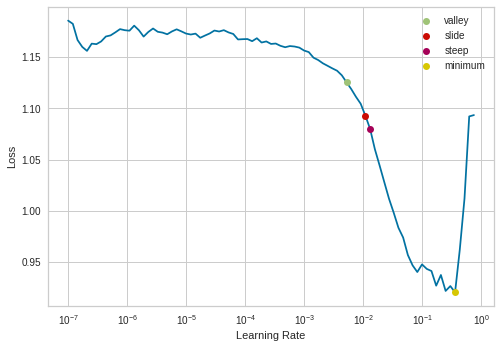

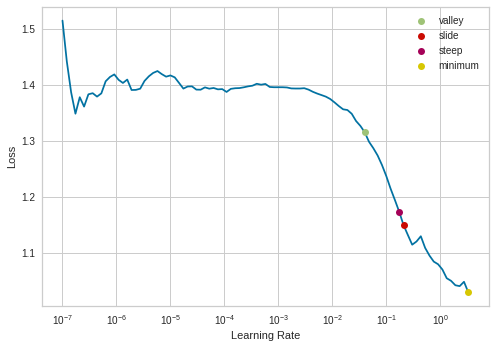

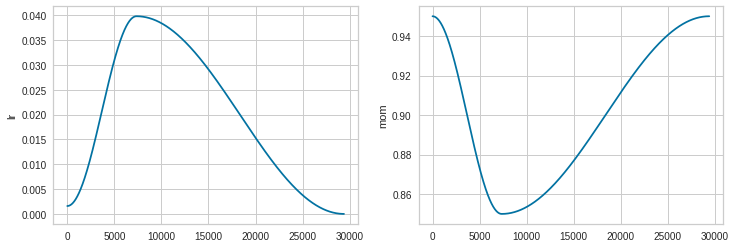

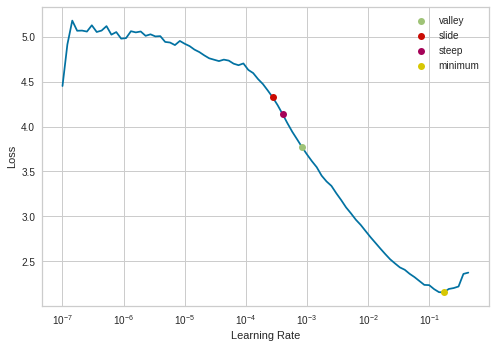

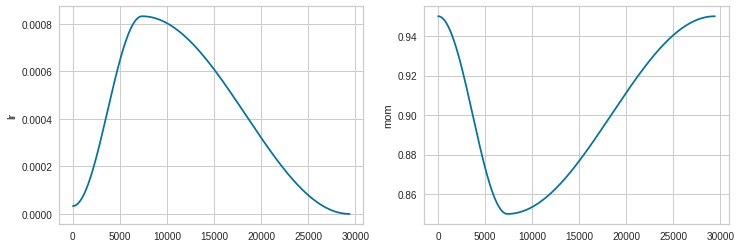

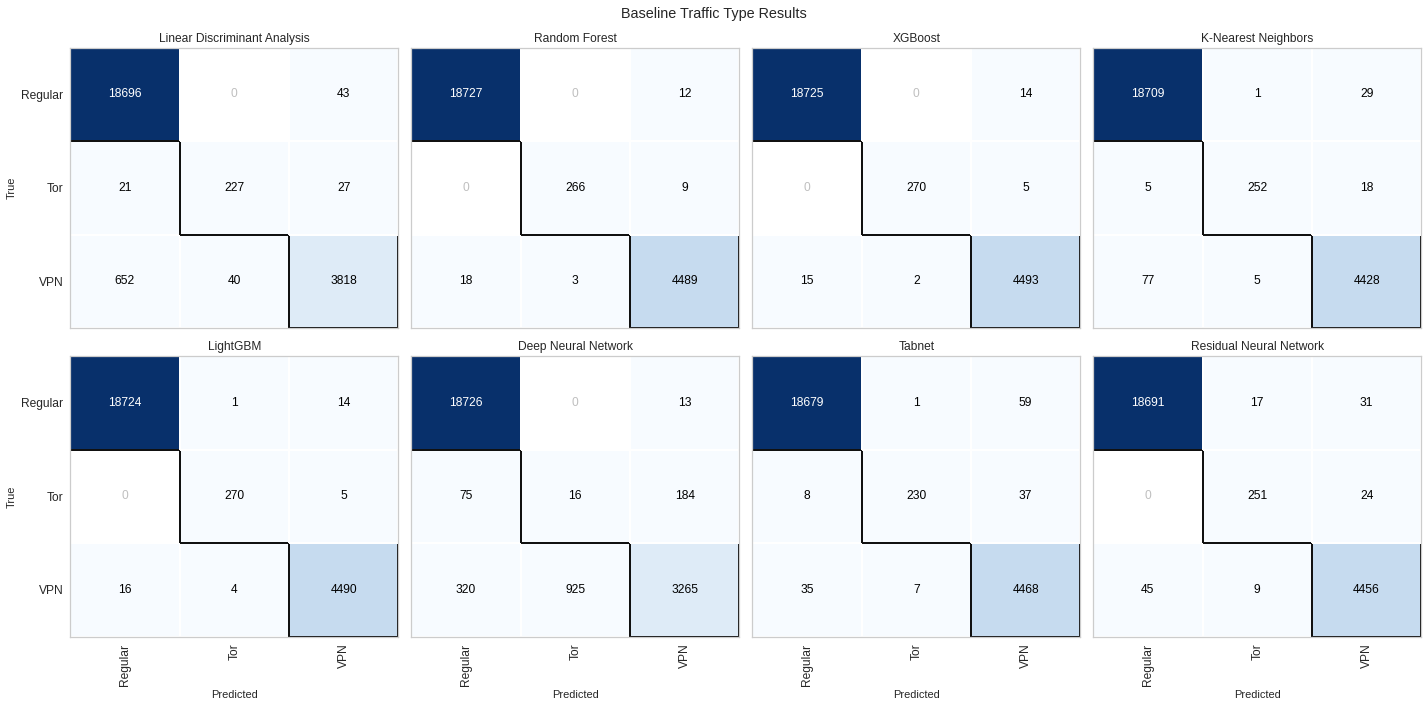

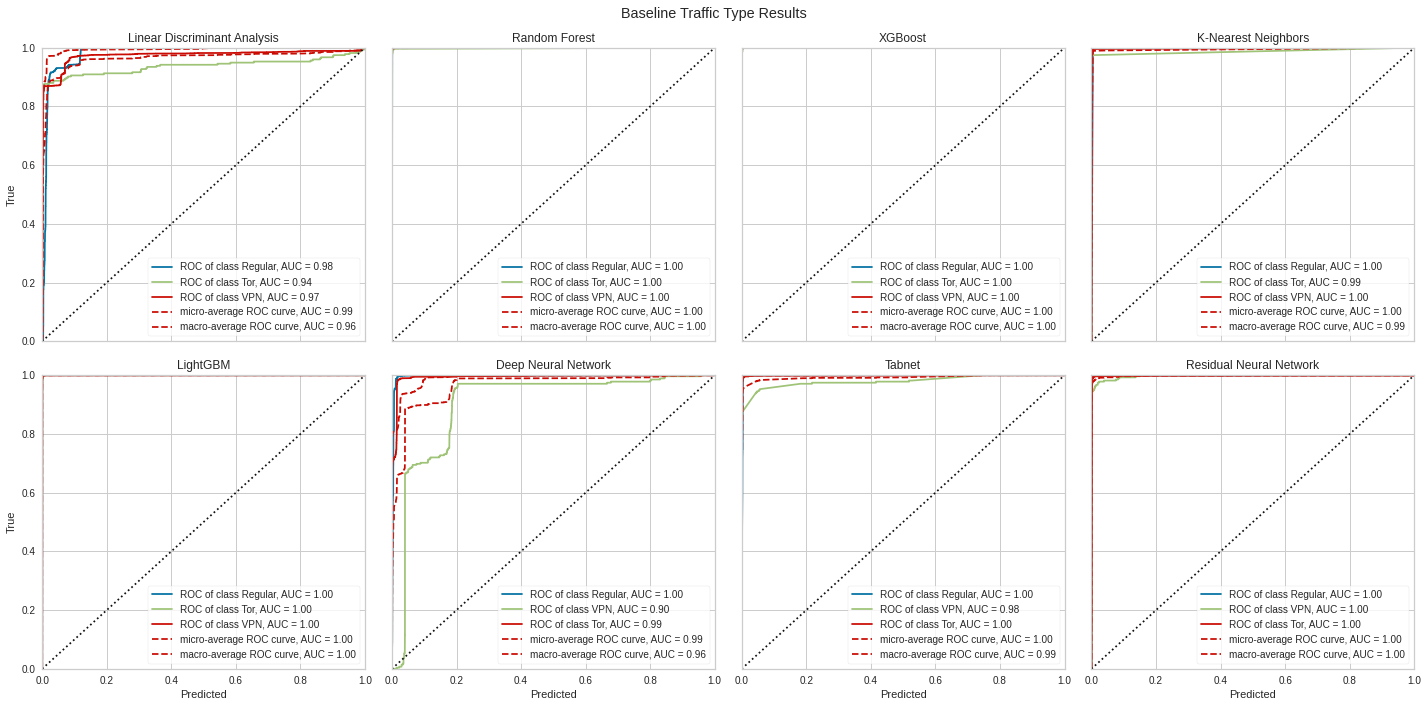

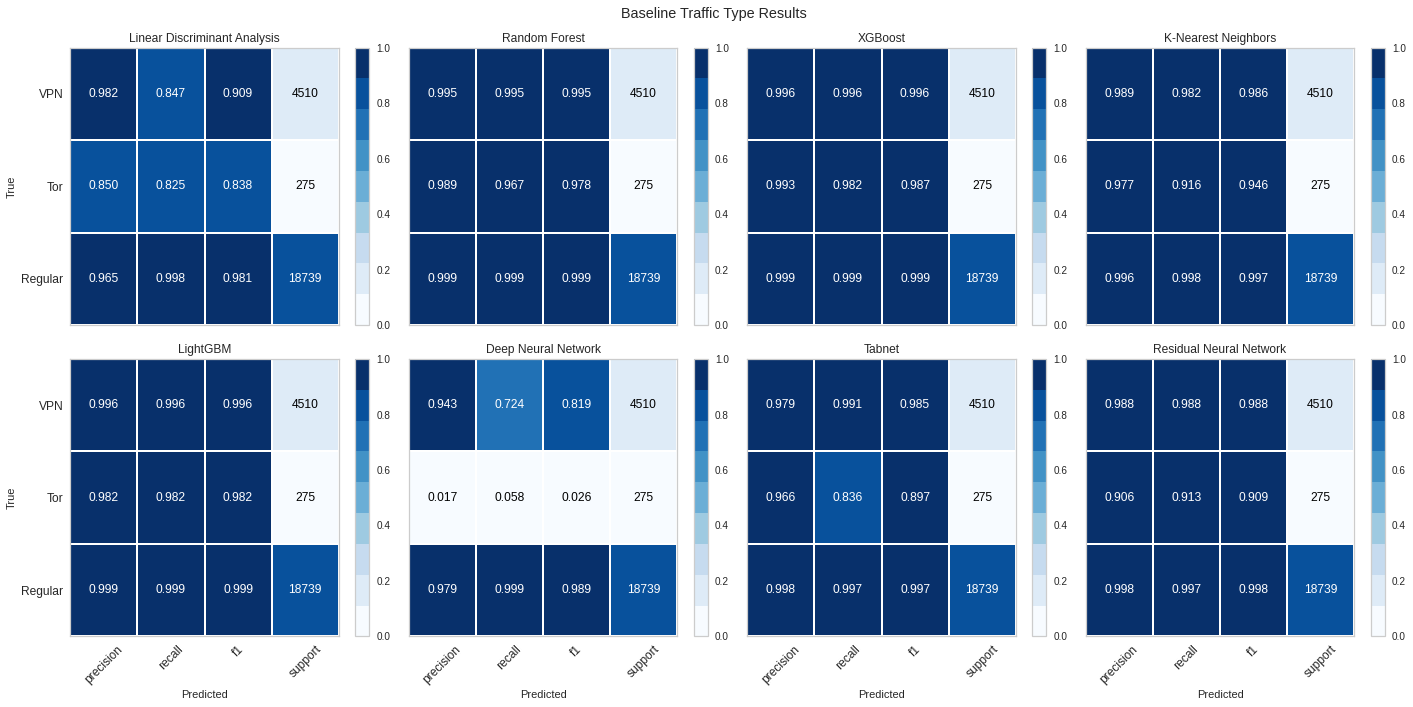

In [126]:
classifiers = [LinearDiscriminantAnalysis(), RandomForestClassifier(), XGBClassifier(), KNeighborsClassifier(),  LGBMClassifier(), "Deep Neural Network", "Tabnet", "Residual Neural Network"]
classifier_names = ["Linear Discriminant Analysis", "Random Forest", "XGBoost", "K-Nearest Neighbors", "LightGBM", "Deep Neural Network", "Tabnet", "Residual Neural Network"]
shallow_classifiers = ["Linear Discriminant Analysis", "Random Forest", "XGBoost", "K-Nearest Neighbors", "LightGBM"]
shape = tuple(100 for i in range(20))
baseline_traffic_dataset_results = train_and_evaluate_n_classifiers(baseline_traffic_dataset['Dataset'], classifiers, 'Traffic Type', classifier_names, shallow_classifiers, shape, "Baseline Traffic Type Results", epochs=20, experiment_set_name='baseline_traffic_dataset_results')

Results for Linear Discriminant Analysis
              precision    recall  f1-score   support

           0       0.72      0.62      0.67      2905
           1       0.65      0.79      0.71      6590
           2       0.48      0.26      0.34       966
           3       0.14      0.32      0.20       211
           4       0.59      0.23      0.33      1863
           5       0.82      0.86      0.84      9727
           6       0.30      0.21      0.25       970
           7       0.21      0.22      0.21       292

    accuracy                           0.70     23524
   macro avg       0.49      0.44      0.44     23524
weighted avg       0.69      0.70      0.68     23524

	Accuracy: 0.6984781499744941

	F1: 0.6837000348439087

	AUC: 0.8633486186418192

	Mathew's Correlation: 0.5759527942093119

Results for Random Forest
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2905
           1       0.88      0.94      0.91     

/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:49:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results for XGBoost
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2905
           1       0.88      0.96      0.92      6590
           2       0.97      0.94      0.96       966
           3       0.84      0.80      0.82       211
           4       0.91      0.82      0.86      1863
           5       0.97      0.97      0.97      9727
           6       0.91      0.71      0.80       970
           7       0.99      0.95      0.97       292

    accuracy                           0.94     23524
   macro avg       0.93      0.89      0.91     23524
weighted avg       0.94      0.94      0.94     23524

	Accuracy: 0.9389134500935216

	F1: 0.9382839323504922

	AUC: 0.995844900468

/home/drake/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/drake/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/drake/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/drake/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_cl

loss: 0.8335493206977844, accuracy:  70.10%


/home/drake/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/drake/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/drake/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results for Deep Neural Network
              precision    recall  f1-score   support

           0       0.69      0.89      0.78      2905
           1       0.63      0.86      0.73      6590
           2       0.00      0.00      0.00       966
           3       0.95      0.18      0.30       211
           4       0.42      0.53      0.47      1863
           5       0.92      0.70      0.79      9727
           6       0.38      0.36      0.37       970
           7       0.84      0.27      0.41       292

    accuracy                           0.70     23524
   macro avg       0.60      0.47      0.48     23524
weighted avg       0.71      0.70      0.69     23524

	Accuracy: 0.7009862268321714

	F1: 0.6879024288819399

	AUC: 0.9035751572640713

	Mathew's Correlation: 0.6023681489167148



/home/drake/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/drake/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/drake/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/drake/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_cl

Results for Tabnet
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2905
           1       0.66      0.94      0.78      6590
           2       0.87      0.75      0.81       966
           3       0.52      0.07      0.12       211
           4       0.66      0.56      0.61      1863
           5       0.97      0.77      0.86      9727
           6       0.46      0.35      0.39       970
           7       0.69      0.76      0.72       292

    accuracy                           0.79     23524
   macro avg       0.71      0.63      0.64     23524
weighted avg       0.81      0.79      0.79     23524

	Accuracy: 0.7890239755143683

	F1: 0.7871744554598931

	AUC: 0.9553870009266391

	Mathew's Correlation: 0.7210758703302075

Layer sizes: [64, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 8], length: 22
Number of residual blocks: 19
Residual locations:  [1, 2, 3, 4, 5, 6, 7,

/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Condensed results:
Results for Linear Discriminant Analysis. Acc: 0.6984781499744941, F1: 0.6837000348439087, AUC: 0.8633486186418192, MCC: 0.5759527942093119
Results for Random Forest. Acc: 0.9305815337527631, F1: 0.9301701600110307, AUC: 0.9864128670235957, MCC: 0.9042860956065374
Results for XGBoost. Acc: 0.9389134500935216, F1: 0.9382839323504922, AUC: 0.9958449004687595, MCC: 0.9157842359972013


/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Results for K-Nearest Neighbors. Acc: 0.8902822649209318, F1: 0.8878138571165229, AUC: 0.952072067405598, MCC: 0.8479952139025485
Results for LightGBM. Acc: 0.9389559598707703, F1: 0.9382149364642648, AUC: 0.9956227579724763, MCC: 0.9157685887294104
Results for Deep Neural Network. Acc: 0.7009862268321714, F1: 0.6879024288819399, AUC: 0.9035751572640713, MCC: 0.6023681489167148
Results for Tabnet. Acc: 0.7890239755143683, F1: 0.7871744554598931, AUC: 0.9553870009266391, MCC: 0.7210758703302075
Results for Residual Neural Network. Acc: 0.798036048291107, F1: 0.8063039877210432, AUC: 0.9647093505614331, MCC: 0.7355617443264388


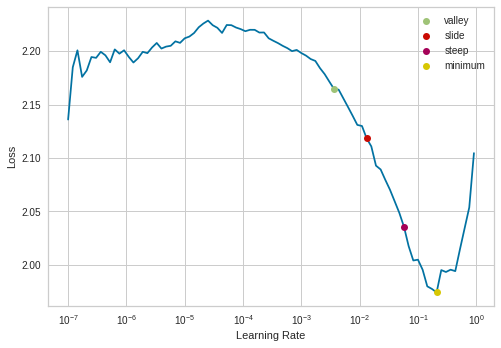

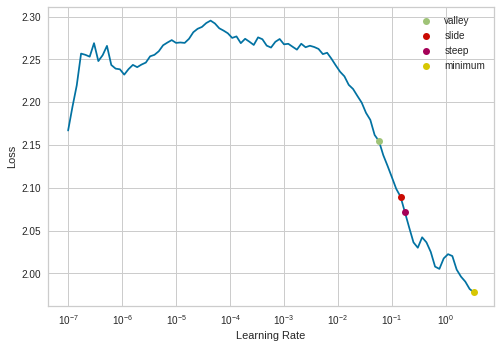

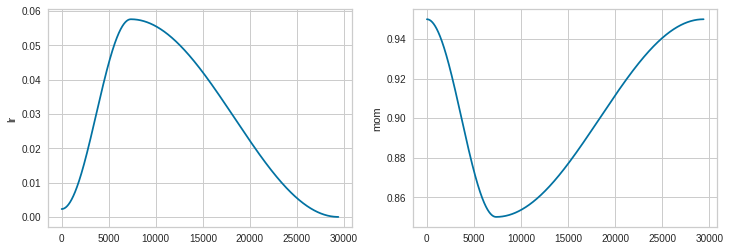

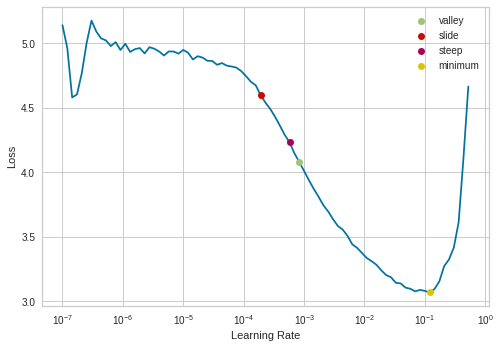

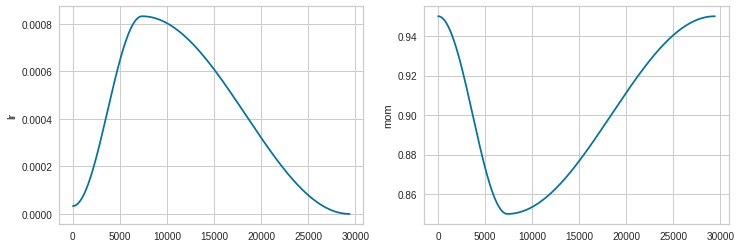

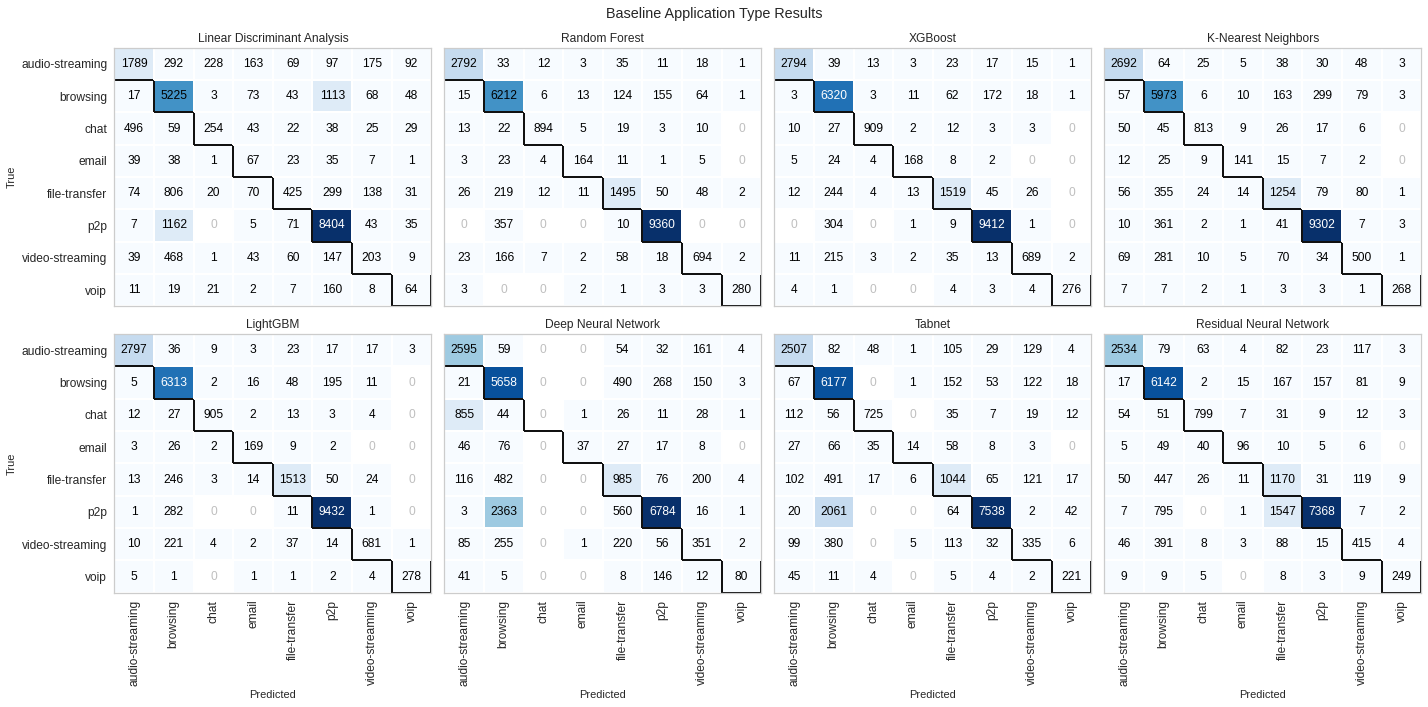

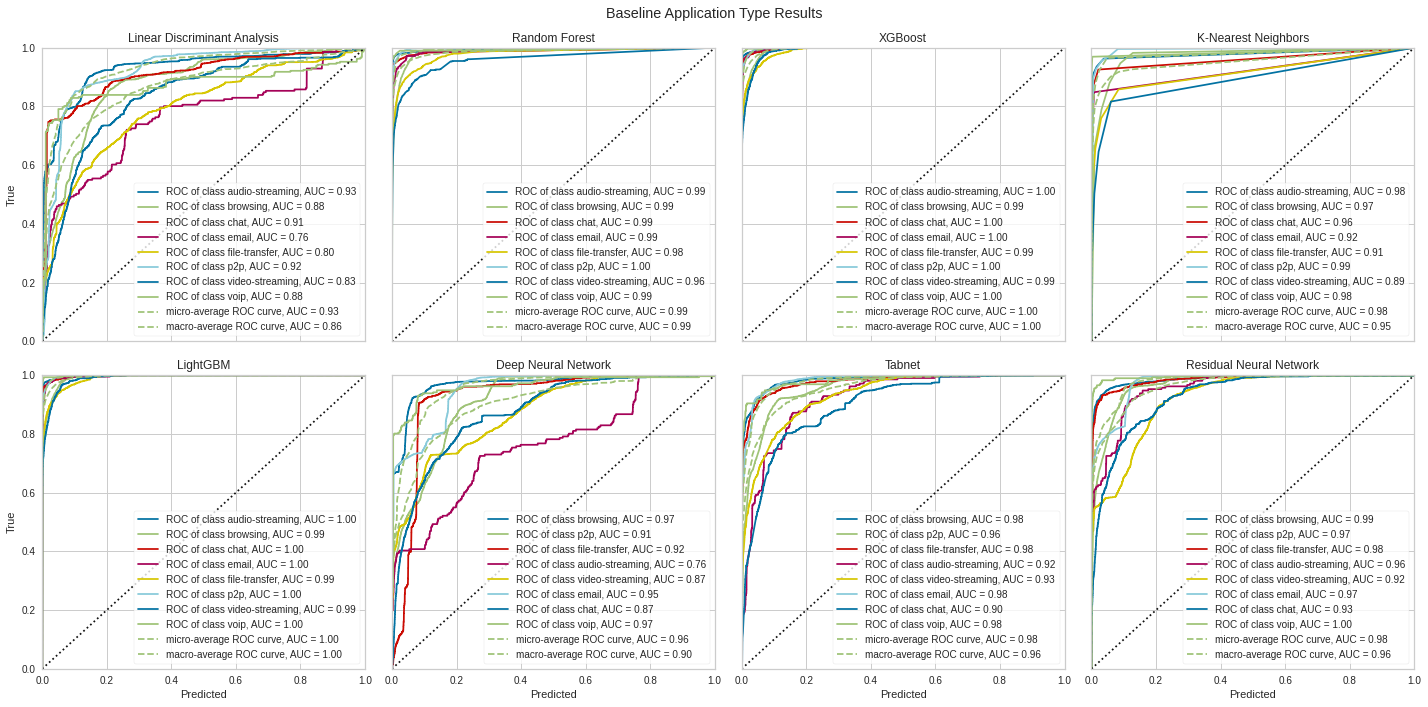

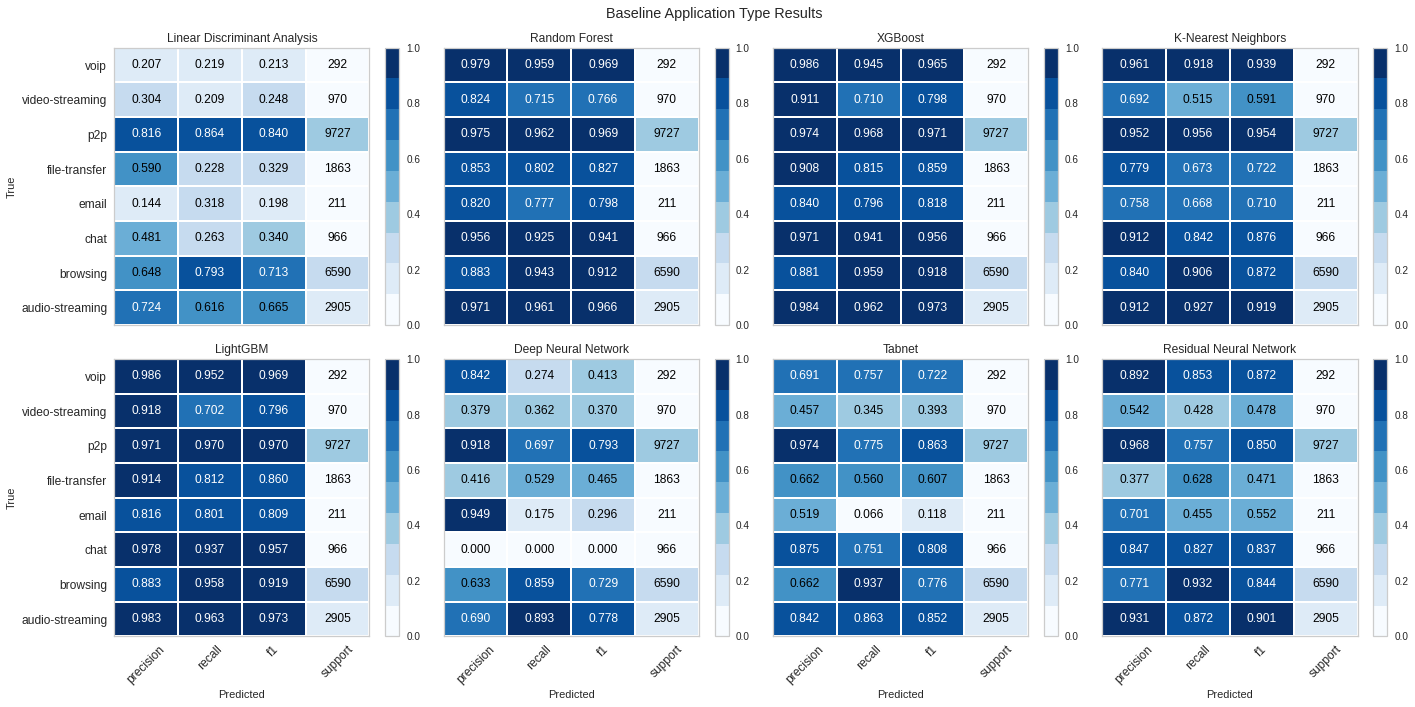

In [127]:
baseline_application_dataset_results = train_and_evaluate_n_classifiers(baseline_application_dataset['Dataset'], classifiers, 'Application Type', classifier_names, shallow_classifiers, shape, "Baseline Application Type Results", epochs=20, experiment_set_name='baseline_application_dataset_results')

# Augmented Traffic Type Results

Results for Linear Discriminant Analysis
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3993
           1       0.95      0.84      0.89       972
           2       0.88      0.90      0.89      3035

    accuracy                           0.91      8000
   macro avg       0.92      0.89      0.90      8000
weighted avg       0.91      0.91      0.91      8000

	Accuracy: 0.91025

	F1: 0.9101157817337837

	AUC: 0.9685854213748284

	Mathew's Correlation: 0.847495486909137

Results for Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3993
           1       1.00      0.99      1.00       972
           2       1.00      1.00      1.00      3035

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

	Accuracy: 0.997

	F1: 0.9969997742492503

	AUC: 0.9997081

/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:19:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results for XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3993
           1       1.00      0.99      1.00       972
           2       1.00      1.00      1.00      3035

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

	Accuracy: 0.99725

	F1: 0.9972498464526959

	AUC: 0.9998533661343124

	Mathew's Correlation: 0.9953559689210096

Results for K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3993
           1       0.98      0.98      0.98       972
           2       0.98      0.98    

/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Condensed results:
Results for Linear Discriminant Analysis. Acc: 0.91025, F1: 0.9101157817337837, AUC: 0.9685854213748284, MCC: 0.847495486909137
Results for Random Forest. Acc: 0.997, F1: 0.9969997742492503, AUC: 0.9997081758781353, MCC: 0.9949336226945235


/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Results for XGBoost. Acc: 0.99725, F1: 0.9972498464526959, AUC: 0.9998533661343124, MCC: 0.9953559689210096
Results for K-Nearest Neighbors. Acc: 0.984125, F1: 0.9841122169085688, AUC: 0.9970548859146083, MCC: 0.9731953792421306
Results for LightGBM. Acc: 0.997, F1: 0.9969994281760596, AUC: 0.9998810809826013, MCC: 0.9949339520571653
Results for Deep Neural Network. Acc: 0.962875, F1: 0.9617322560621685, AUC: 0.9934368905551261, MCC: 0.9375184358961166
Results for Tabnet. Acc: 0.97975, F1: 0.9796036811402034, AUC: 0.9941585574515374, MCC: 0.9657795790976146
Results for Residual Neural Network. Acc: 0.982875, F1: 0.9828297641872409, AUC: 0.9976648821551629, MCC: 0.9711293172444979


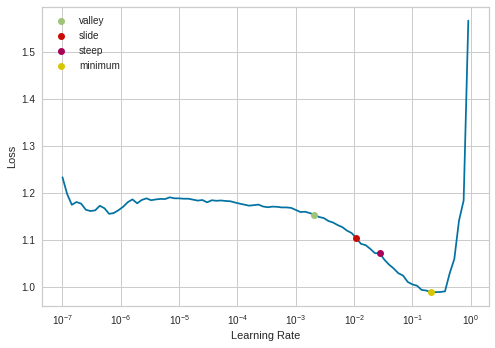

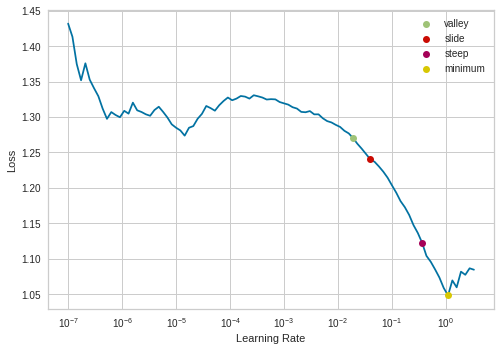

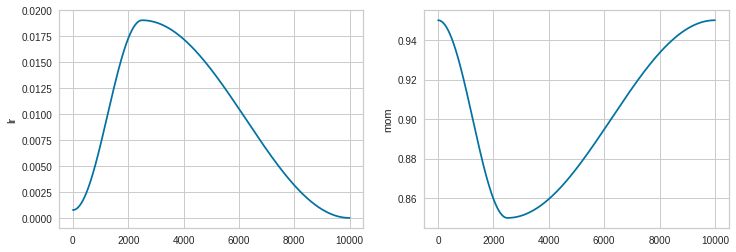

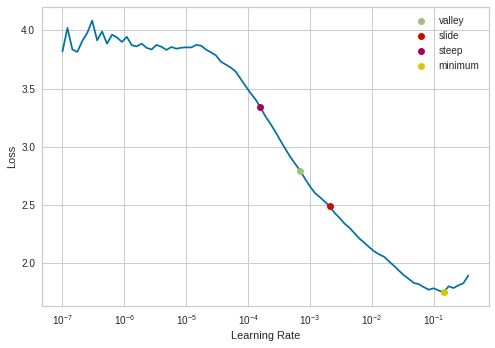

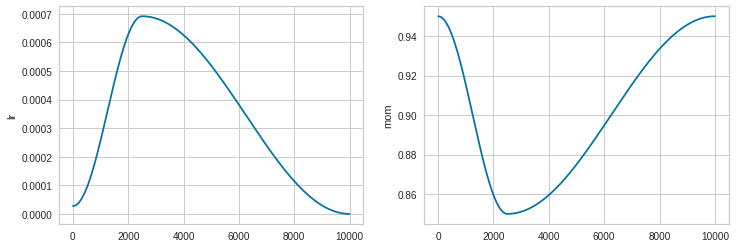

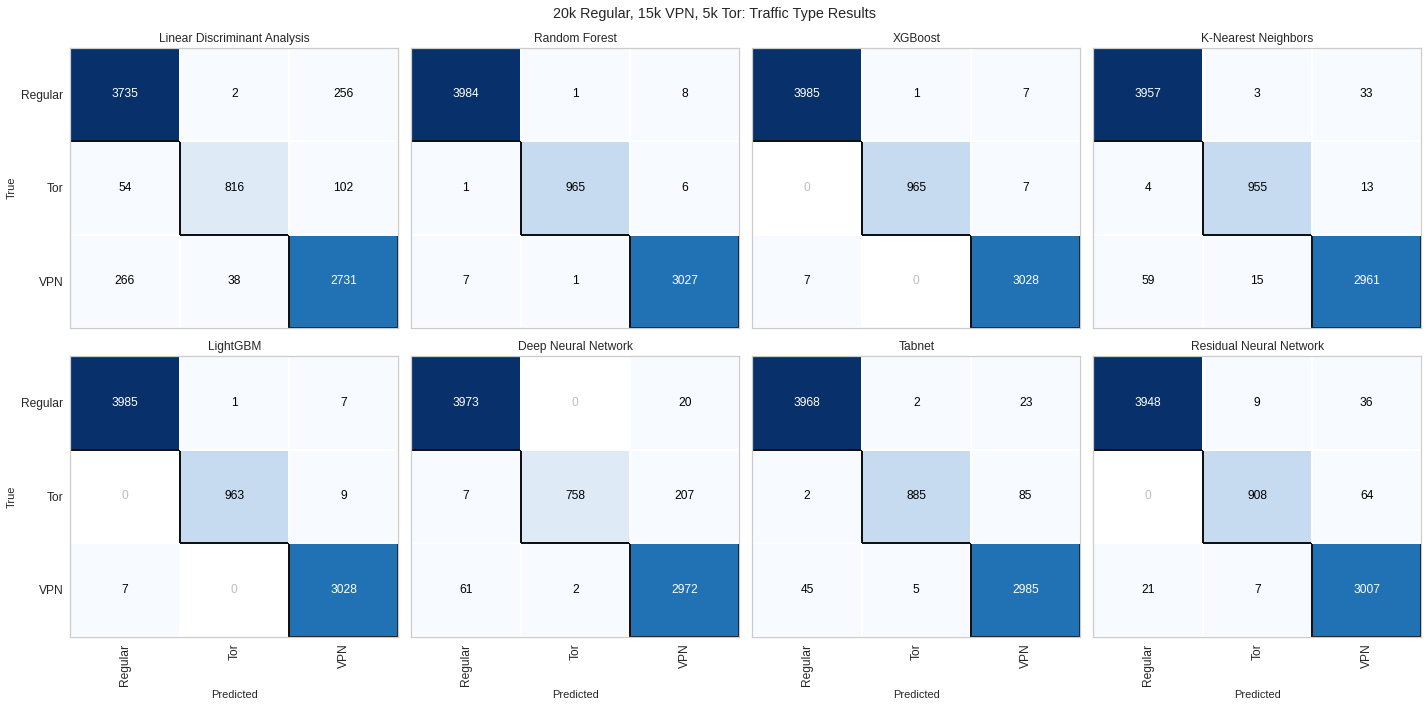

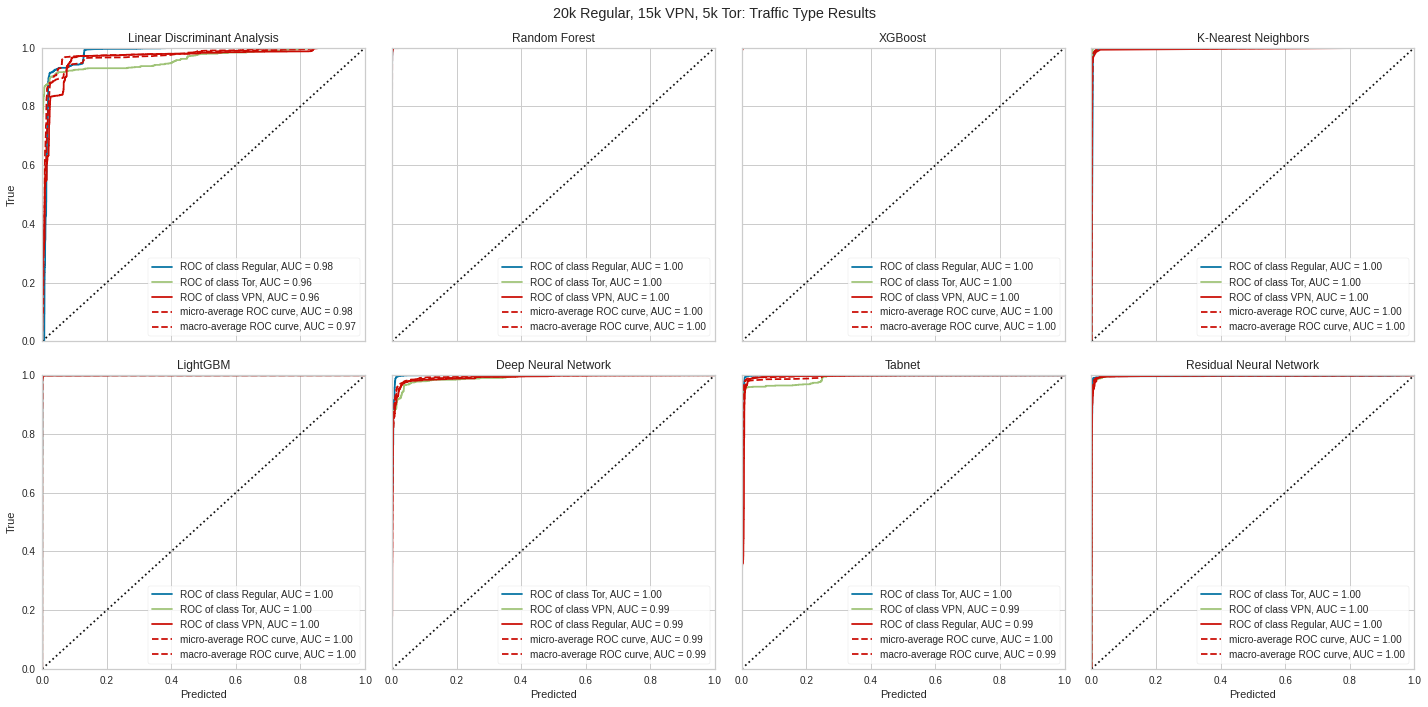

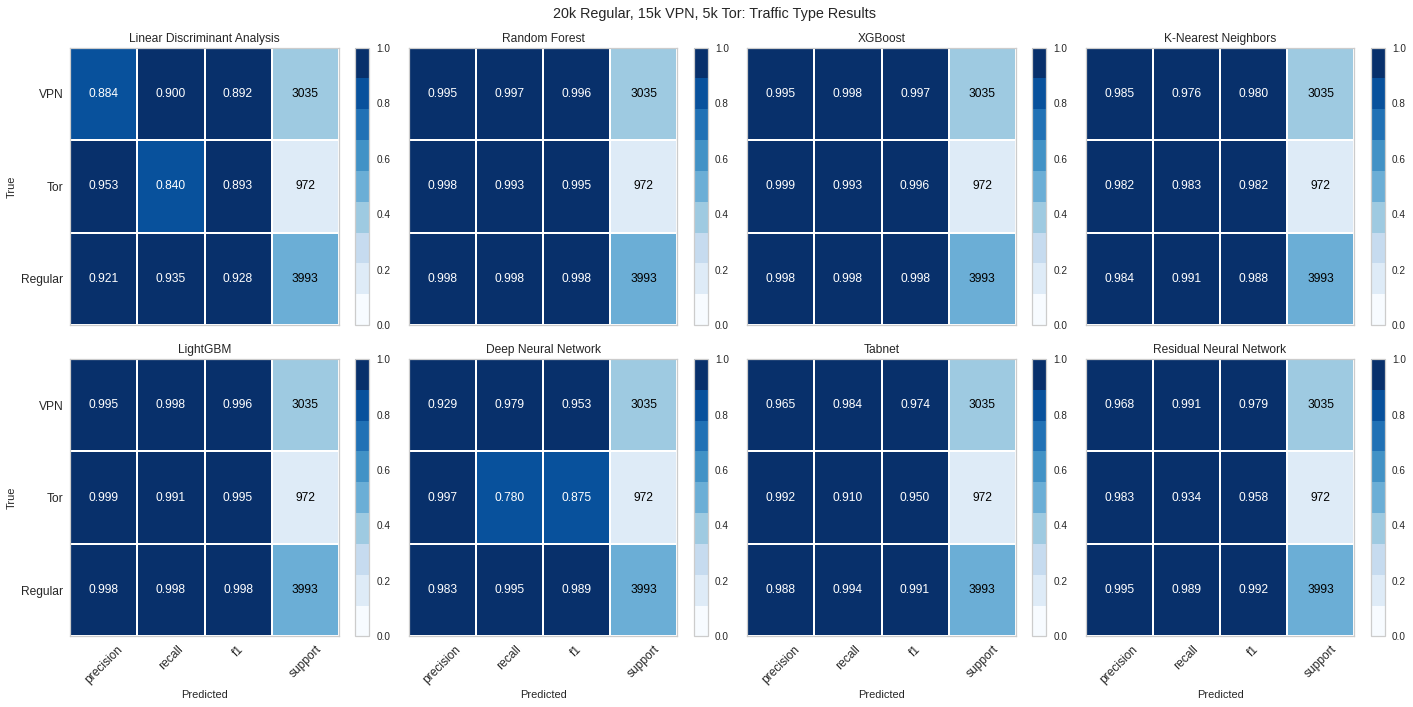

In [128]:
smote_balanced_traffic_labels_dataset_20_15_5_results = train_and_evaluate_n_classifiers(smote_balanced_traffic_labels_dataset_20_15_5['Dataset'], classifiers, 'Traffic Type', classifier_names, shallow_classifiers, shape, "20k Regular, 15k VPN, 5k Tor: Traffic Type Results", epochs=20, experiment_set_name='smote_balanced_traffic_labels_dataset_20_15_5_results')

Results for Linear Discriminant Analysis
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3978
           1       0.98      0.86      0.92      3933
           2       0.84      0.90      0.86      4089

    accuracy                           0.89     12000
   macro avg       0.90      0.89      0.89     12000
weighted avg       0.90      0.89      0.89     12000

	Accuracy: 0.8931666666666667

	F1: 0.8939537207188646

	AUC: 0.9677365127713258

	Mathew's Correlation: 0.8412725122263779

Results for Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3978
           1       1.00      1.00      1.00      3933
           2       1.00      1.00      1.00      4089

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

	Accuracy: 0.99775

	F1: 0.9977498541493042

	

/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:27:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results for XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3978
           1       1.00      1.00      1.00      3933
           2       1.00      1.00      1.00      4089

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

	Accuracy: 0.9984166666666666

	F1: 0.9984166748110591

	AUC: 0.9999826597976137

	Mathew's Correlation: 0.997624710511949

Results for K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3978
           1       0.99      1.00      0.99      3933
           2       0.99    

/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Condensed results:
Results for Linear Discriminant Analysis. Acc: 0.8931666666666667, F1: 0.8939537207188646, AUC: 0.9677365127713258, MCC: 0.8412725122263779
Results for Random Forest. Acc: 0.99775, F1: 0.9977498541493042, AUC: 0.9998277618683215, MCC: 0.9966246517960214
Results for XGBoost. Acc: 0.9984166666666666, F1: 0.9984166748110591, AUC: 0.9999826597976137, MCC: 0.997624710511949


/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Results for K-Nearest Neighbors. Acc: 0.9883333333333333, F1: 0.9883209019244961, AUC: 0.9973372105962973, MCC: 0.9825181159088254
Results for LightGBM. Acc: 0.9985, F1: 0.9985001566836577, AUC: 0.99998184928147, MCC: 0.9977498214366428
Results for Deep Neural Network. Acc: 0.9358333333333333, F1: 0.9366636667356655, AUC: 0.991872331697914, MCC: 0.9058167764827462
Results for Tabnet. Acc: 0.9718333333333333, F1: 0.971783168640452, AUC: 0.9974789086874972, MCC: 0.9577621849912379
Results for Residual Neural Network. Acc: 0.9689166666666666, F1: 0.968938725769538, AUC: 0.9934325995425065, MCC: 0.953546511488028


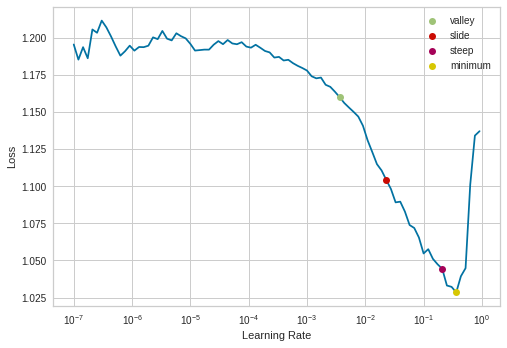

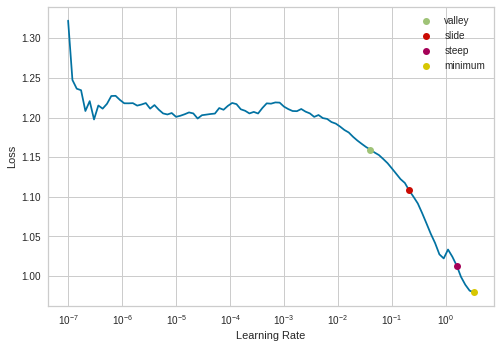

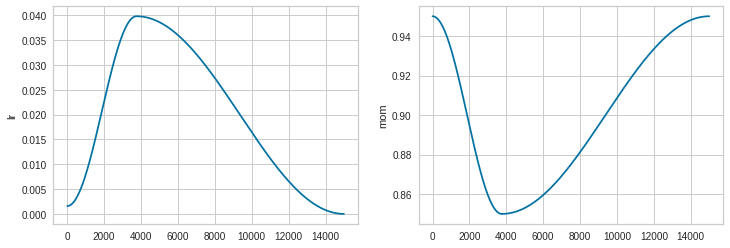

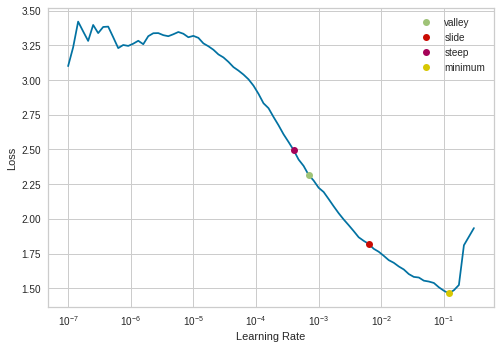

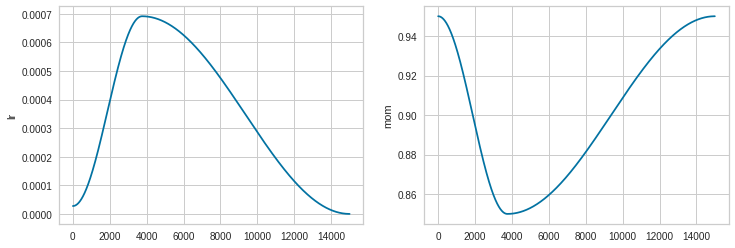

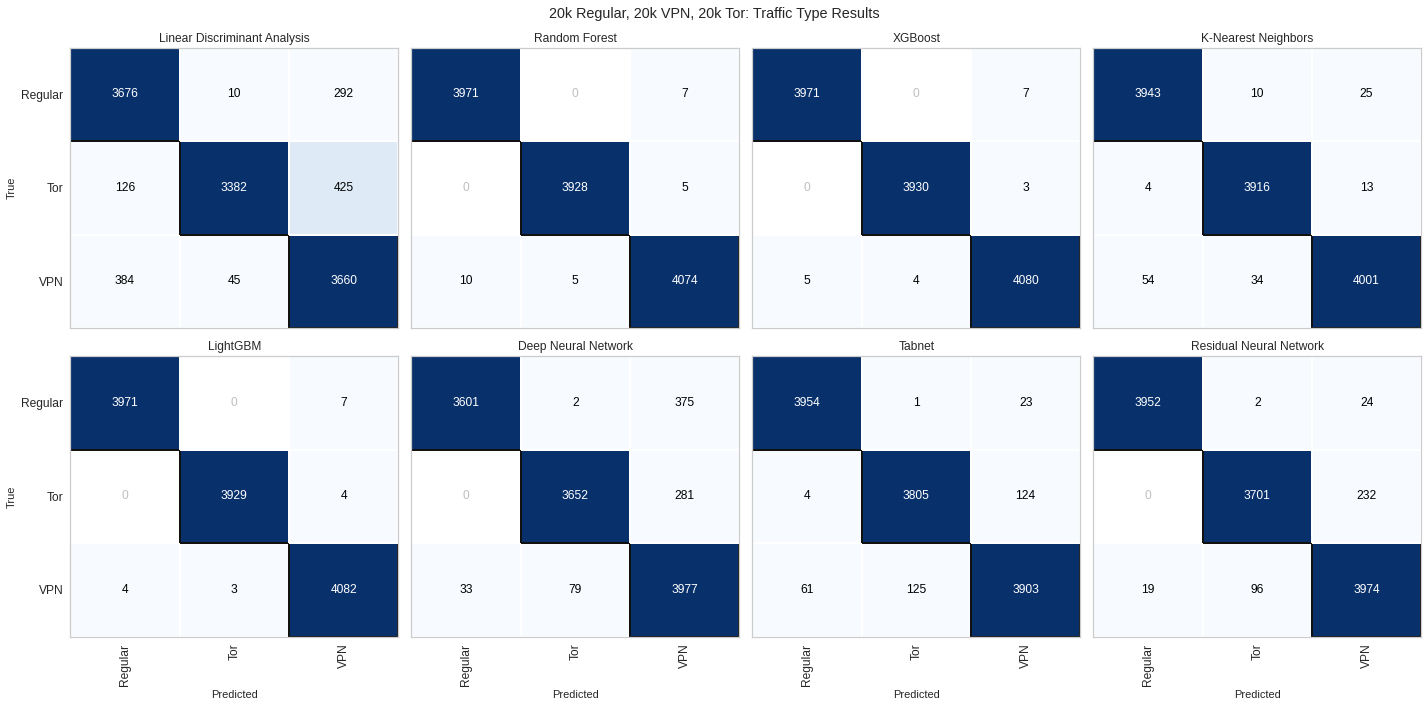

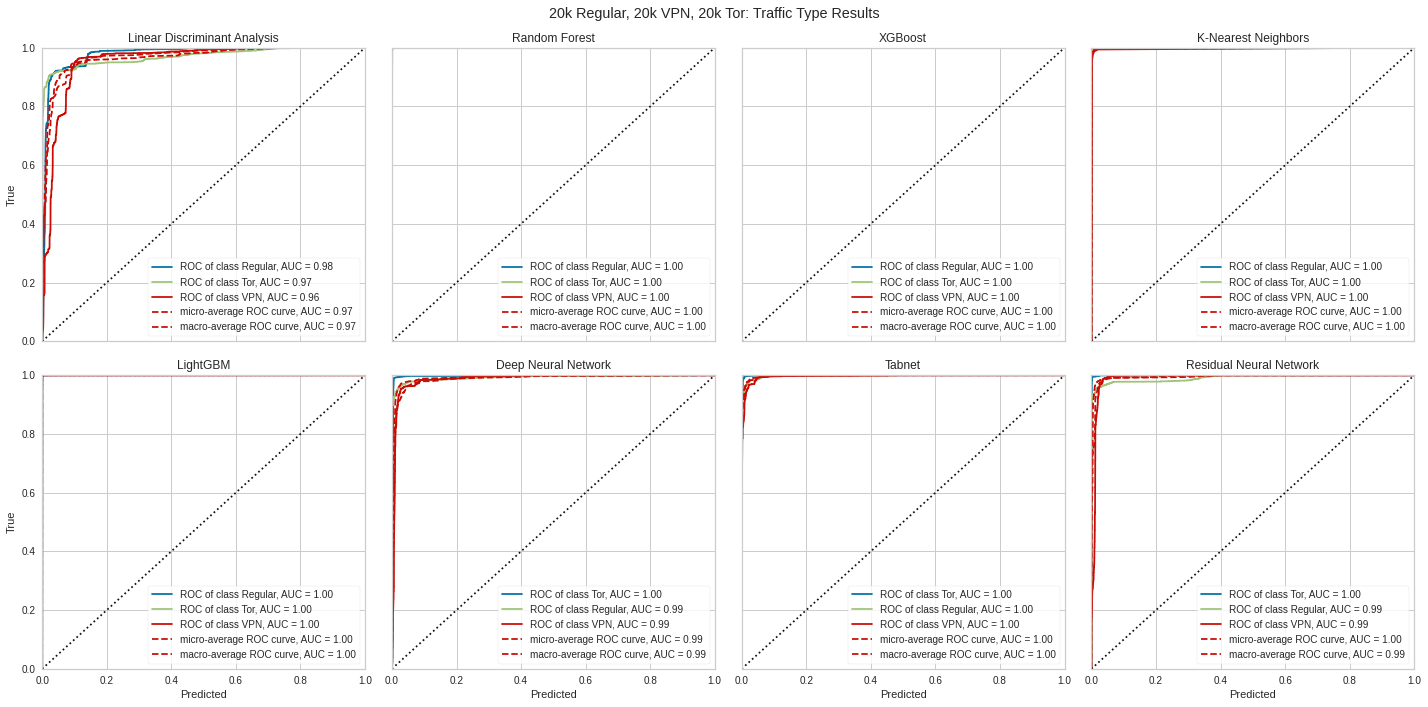

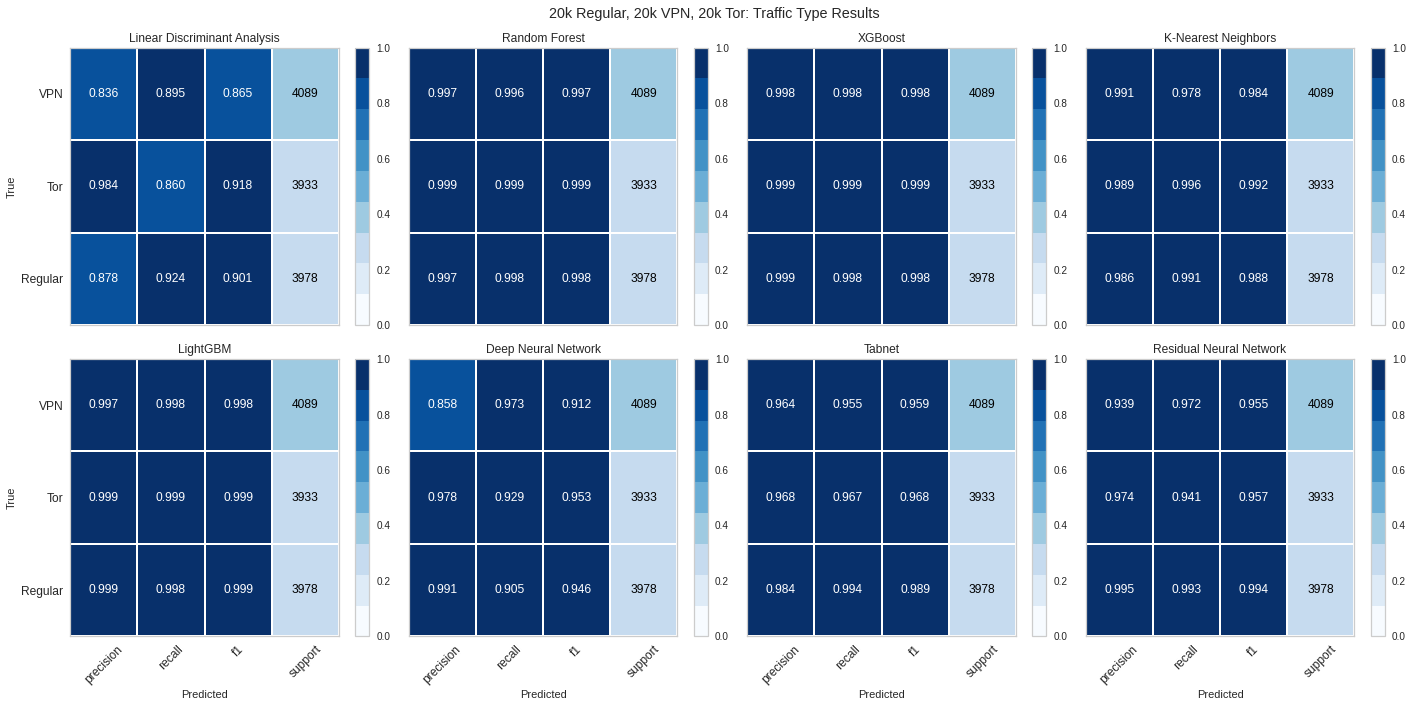

In [129]:
smote_balanced_traffic_labels_dataset_20_20_20 = train_and_evaluate_n_classifiers(smote_balanced_traffic_labels_dataset_20_20_20['Dataset'], classifiers, 'Traffic Type', classifier_names, shallow_classifiers, shape, "20k Regular, 20k VPN, 20k Tor: Traffic Type Results", epochs=20, experiment_set_name='smote_balanced_traffic_labels_dataset_20_20_20')

Results for Linear Discriminant Analysis
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      6006
           1       0.97      0.86      0.91      1925
           2       0.86      0.88      0.87      4069

    accuracy                           0.90     12000
   macro avg       0.91      0.89      0.90     12000
weighted avg       0.90      0.90      0.90     12000

	Accuracy: 0.90125

	F1: 0.9013927900830977

	AUC: 0.9722085468784535

	Mathew's Correlation: 0.8368530002750155

Results for Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6006
           1       1.00      1.00      1.00      1925
           2       1.00      1.00      1.00      4069

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

	Accuracy: 0.99675

	F1: 0.9967500653228575

	AUC: 0.9999

/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:41:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results for XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6006
           1       1.00      1.00      1.00      1925
           2       1.00      1.00      1.00      4069

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

	Accuracy: 0.9973333333333333

	F1: 0.9973336015492346

	AUC: 0.999987373050748

	Mathew's Correlation: 0.9956209469830054

Results for K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6006
           1       0.98      0.99      0.98      1925
           2       0.99    

/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Condensed results:
Results for Linear Discriminant Analysis. Acc: 0.90125, F1: 0.9013927900830977, AUC: 0.9722085468784535, MCC: 0.8368530002750155
Results for Random Forest. Acc: 0.99675, F1: 0.9967500653228575, AUC: 0.9999584120407158, MCC: 0.9946620773354866
Results for XGBoost. Acc: 0.9973333333333333, F1: 0.9973336015492346, AUC: 0.999987373050748, MCC: 0.9956209469830054


/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Results for K-Nearest Neighbors. Acc: 0.9856666666666667, F1: 0.9856459671698867, AUC: 0.9965980467165215, MCC: 0.9764815715033545
Results for LightGBM. Acc: 0.9975, F1: 0.9975002972440424, AUC: 0.9999872809822611, MCC: 0.9958943679787782
Results for Deep Neural Network. Acc: 0.9725, F1: 0.9723433099549736, AUC: 0.9927193550290605, MCC: 0.9549018043131918
Results for Tabnet. Acc: 0.9733333333333334, F1: 0.9732972074086741, AUC: 0.9955208442986944, MCC: 0.956162100484126
Results for Residual Neural Network. Acc: 0.9853333333333333, F1: 0.9853318009786023, AUC: 0.9986579174021069, MCC: 0.9759103415482518


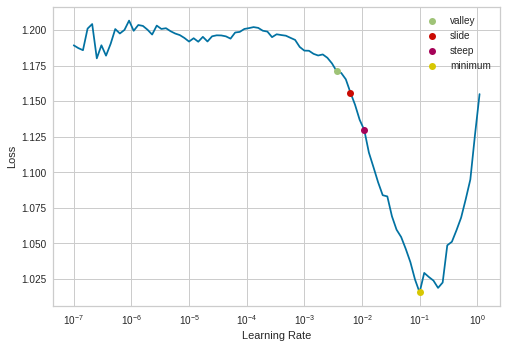

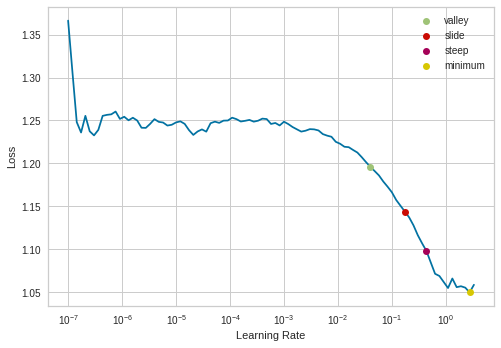

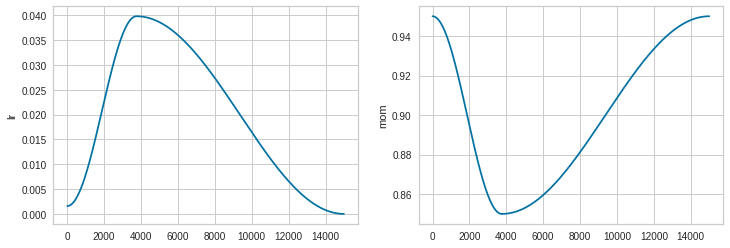

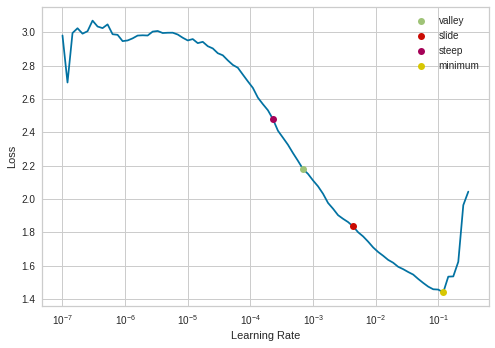

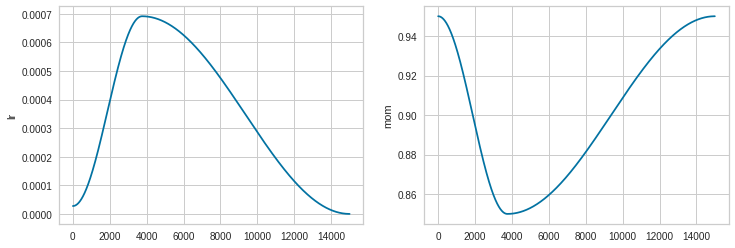

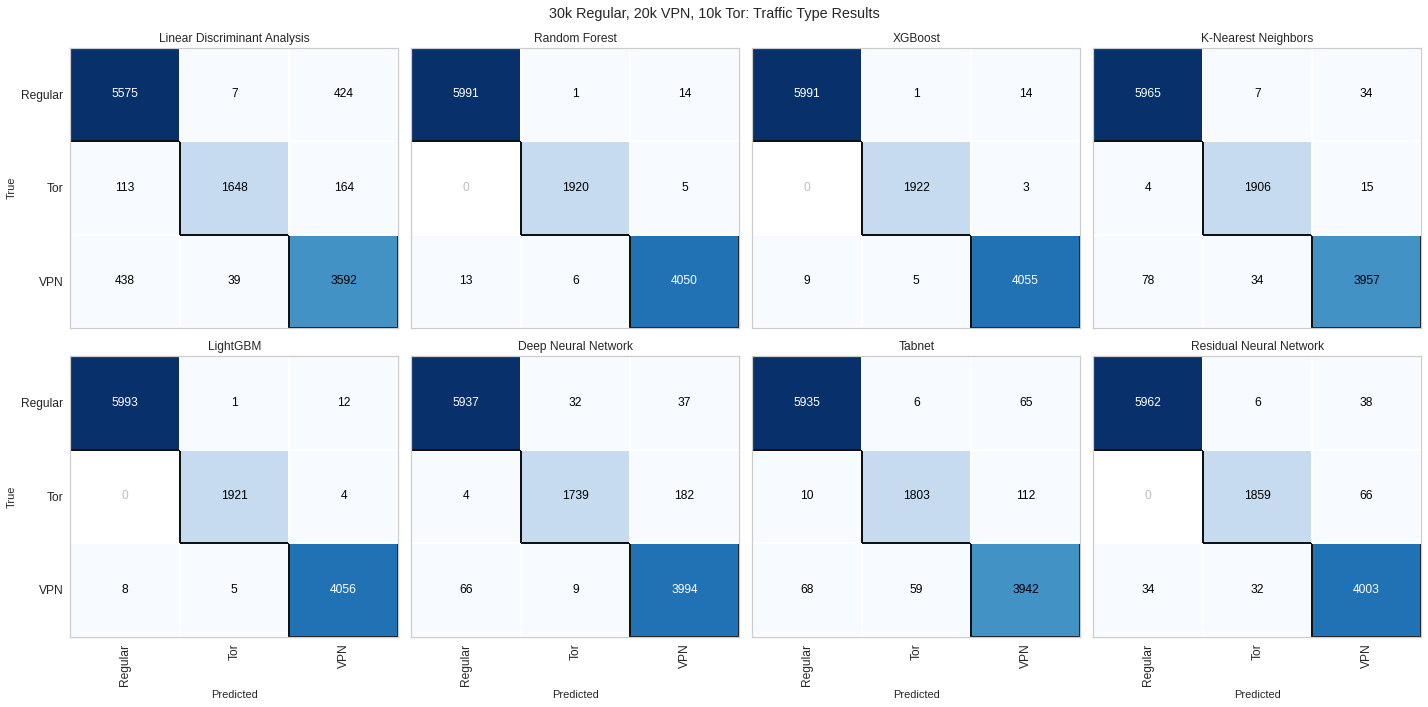

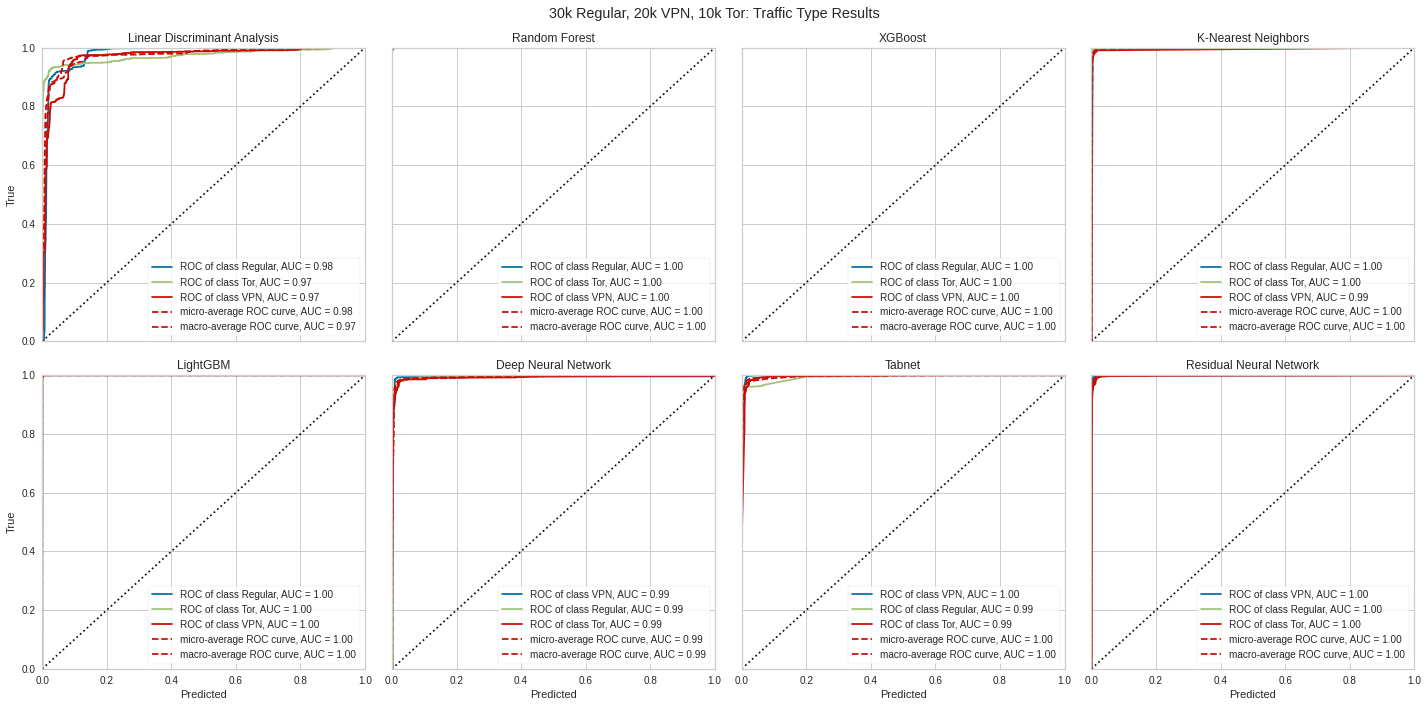

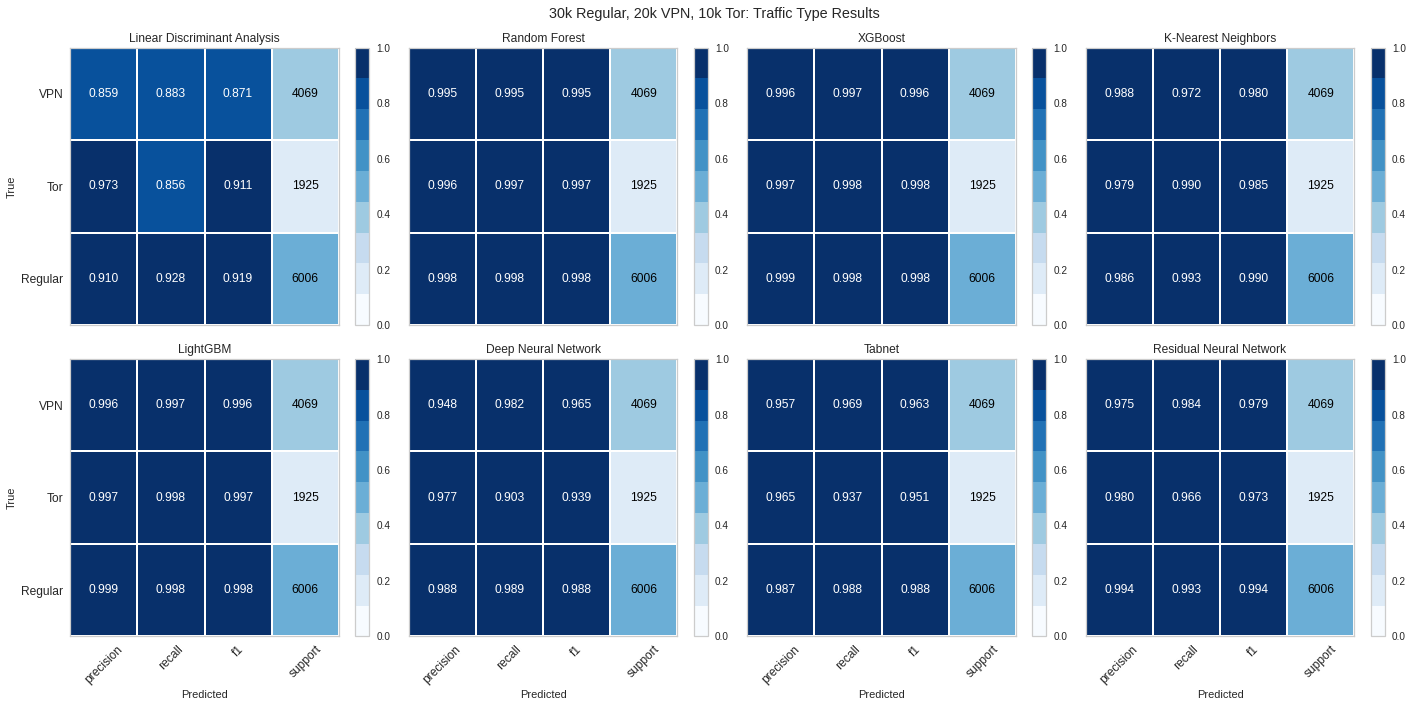

In [130]:
smote_balanced_traffic_labels_dataset_30_20_10 = train_and_evaluate_n_classifiers(smote_balanced_traffic_labels_dataset_30_20_10['Dataset'], classifiers, 'Traffic Type', classifier_names, shallow_classifiers, shape, "30k Regular, 20k VPN, 10k Tor: Traffic Type Results", epochs=20, experiment_set_name='smote_balanced_traffic_labels_dataset_30_20_10')

Results for Linear Discriminant Analysis
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     18484
           1       0.98      0.87      0.92     18770
           2       0.84      0.90      0.87     18731

    accuracy                           0.90     55985
   macro avg       0.90      0.90      0.90     55985
weighted avg       0.90      0.90      0.90     55985

	Accuracy: 0.8973653657229615

	F1: 0.8981452539929118

	AUC: 0.9706576208814922

	Mathew's Correlation: 0.8475417026523526

Results for Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18484
           1       1.00      1.00      1.00     18770
           2       1.00      1.00      1.00     18731

    accuracy                           1.00     55985
   macro avg       1.00      1.00      1.00     55985
weighted avg       1.00      1.00      1.00     55985

	Accuracy: 0.9988925605072787

	F1: 0.99889243

/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:54:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results for XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18484
           1       1.00      1.00      1.00     18770
           2       1.00      1.00      1.00     18731

    accuracy                           1.00     55985
   macro avg       1.00      1.00      1.00     55985
weighted avg       1.00      1.00      1.00     55985

	Accuracy: 0.9989997320710905

	F1: 0.998999646405061

	AUC: 0.9999959959922884

	Mathew's Correlation: 0.9984996251581245

Results for K-Nearest Neighbors
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18484
           1       1.00      1.00      1.00     18770
           2       1.00    

/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Condensed results:
Results for Linear Discriminant Analysis. Acc: 0.8973653657229615, F1: 0.8981452539929118, AUC: 0.9706576208814922, MCC: 0.8475417026523526
Results for Random Forest. Acc: 0.9988925605072787, F1: 0.9988924372799796, AUC: 0.9999646686100173, MCC: 0.9983388814217518


/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Results for XGBoost. Acc: 0.9989997320710905, F1: 0.998999646405061, AUC: 0.9999959959922884, MCC: 0.9984996251581245
Results for K-Nearest Neighbors. Acc: 0.9959989282843619, F1: 0.9959967277013462, AUC: 0.9992150148366846, MCC: 0.9940008286845369
Results for LightGBM. Acc: 0.9990533178529963, F1: 0.9990532402827416, AUC: 0.9999961520942953, MCC: 0.9985800256431533
Results for Deep Neural Network. Acc: 0.9656693757256408, F1: 0.9657105293946769, AUC: 0.9925920182089806, MCC: 0.9485066572075965
Results for Tabnet. Acc: 0.9771367330534965, F1: 0.9771431104579702, AUC: 0.9954402857747064, MCC: 0.9659608846848614
Results for Residual Neural Network. Acc: 0.954666428507636, F1: 0.9552472143464463, AUC: 0.9978965515517588, MCC: 0.9339437268502849


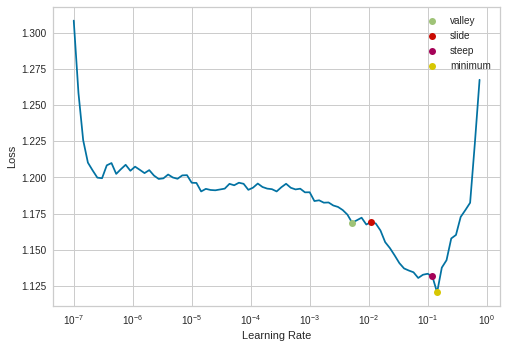

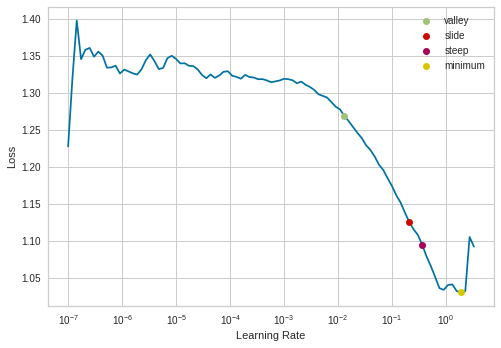

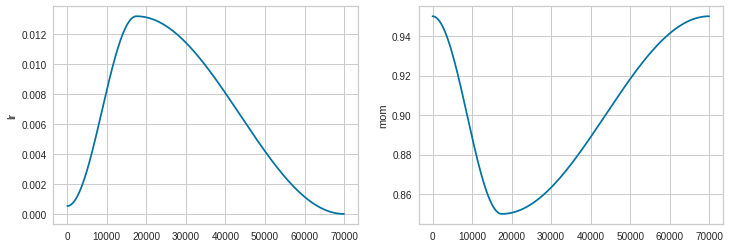

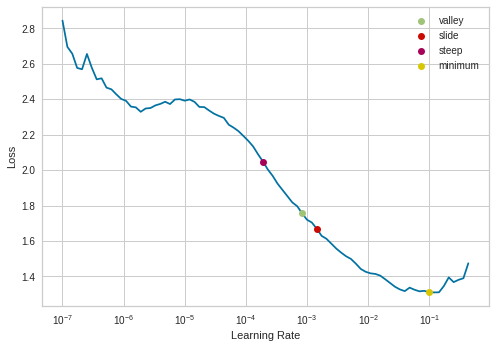

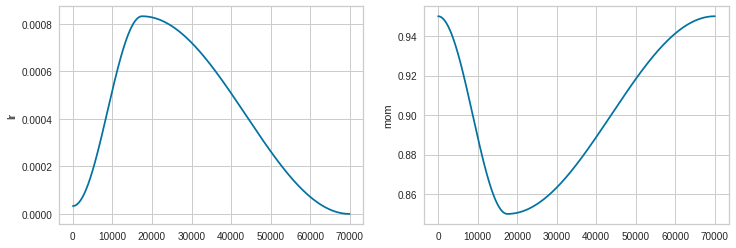

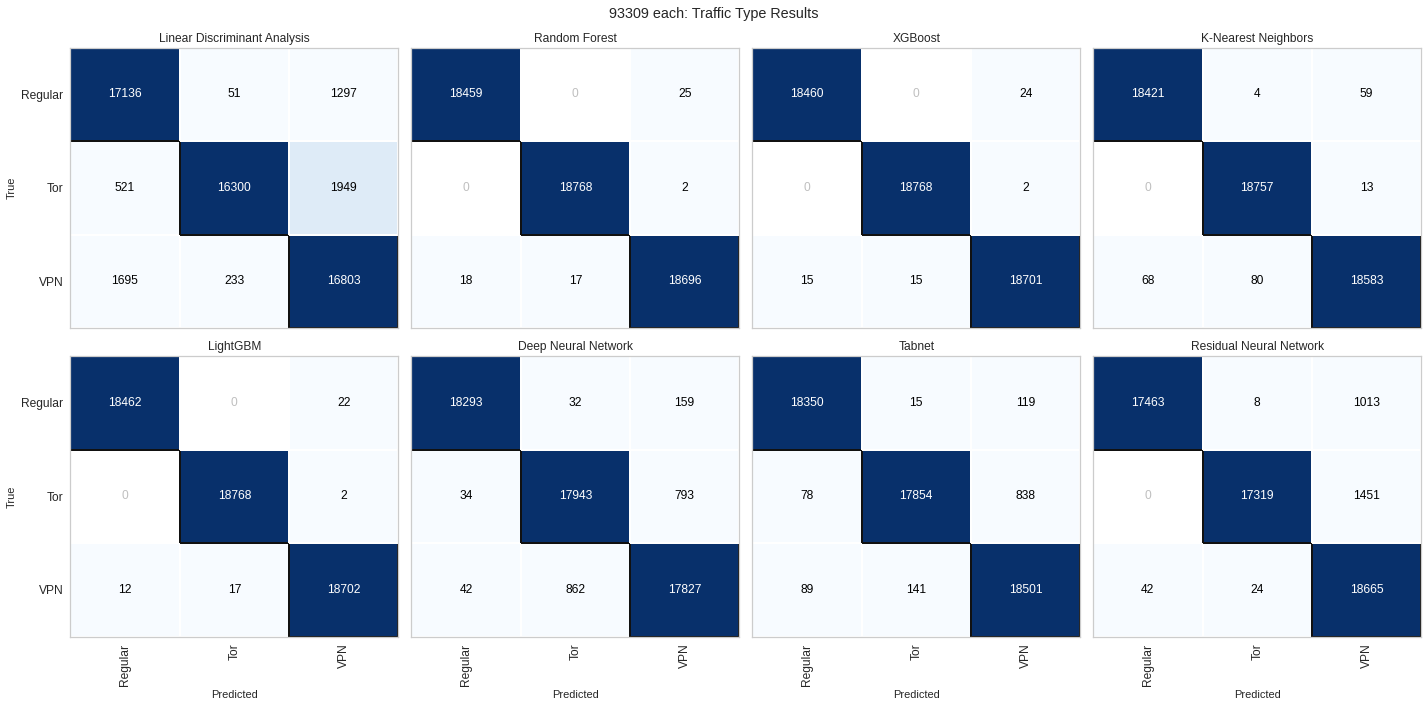

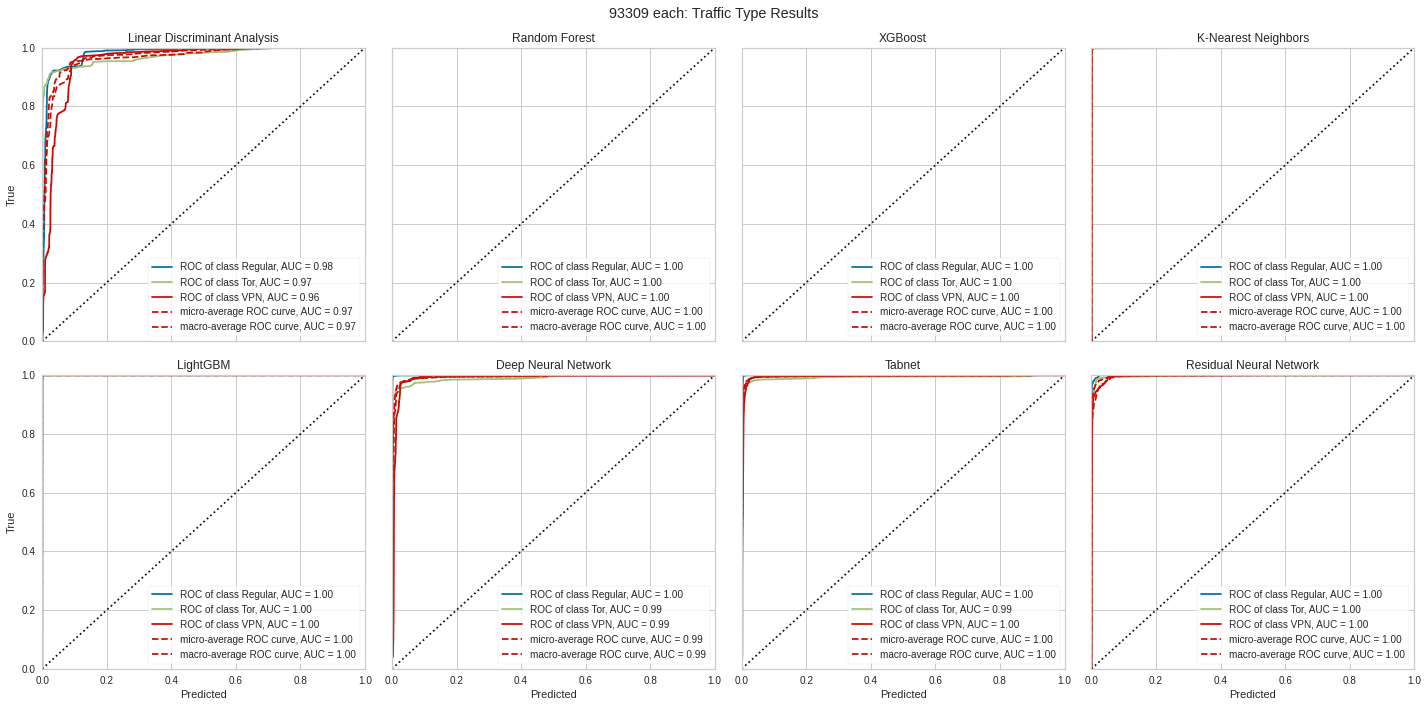

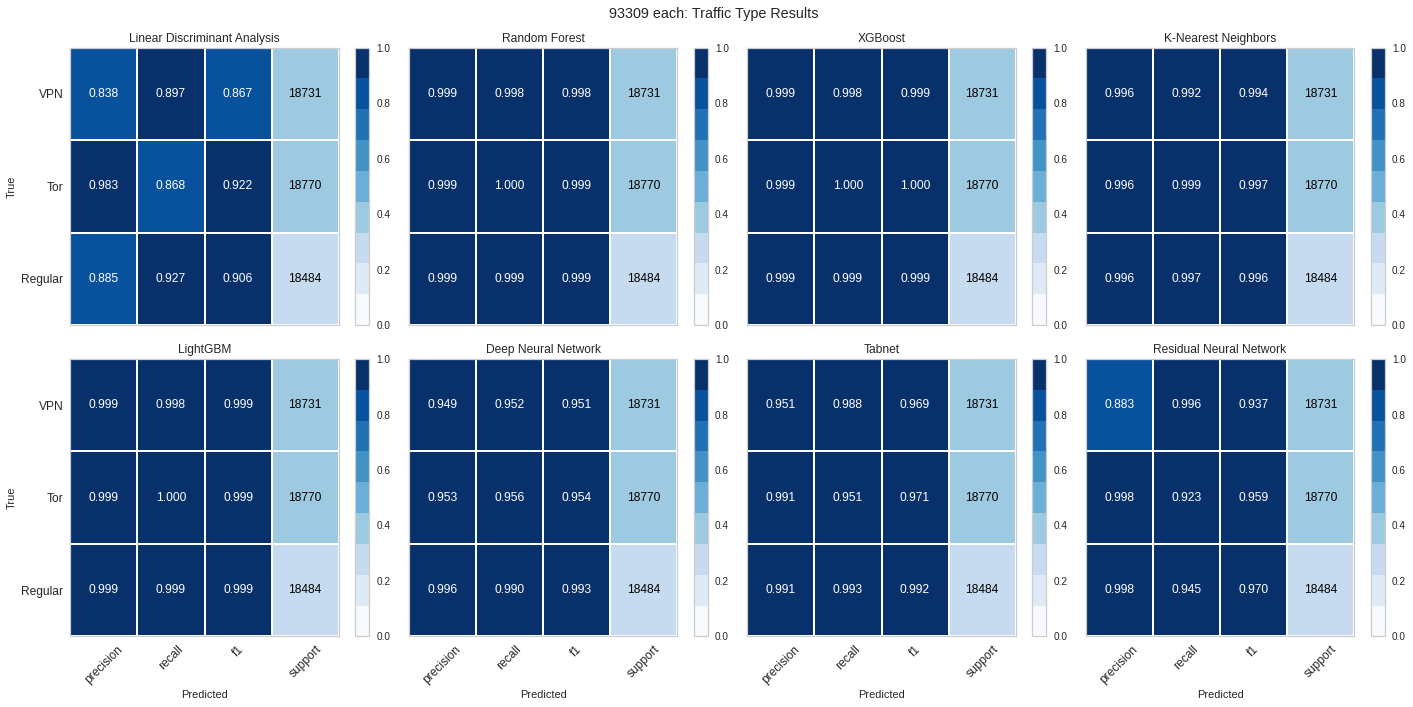

In [131]:
smote_balanced_traffic_labels_dataset_equal = train_and_evaluate_n_classifiers(smote_balanced_traffic_labels_dataset_equal['Dataset'], classifiers, 'Traffic Type', classifier_names, shallow_classifiers, shape, "93309 each: Traffic Type Results", epochs=20, experiment_set_name='smote_balanced_traffic_labels_dataset_equal')

# Augmented Application Type Results

Results for Linear Discriminant Analysis
              precision    recall  f1-score   support

           0       0.82      0.47      0.60      1950
           1       0.47      0.66      0.55      2047
           2       0.46      0.77      0.57      1991
           3       0.57      0.48      0.52      1998
           4       0.60      0.34      0.43      2023
           5       0.60      0.79      0.68      1983
           6       0.51      0.38      0.44      1975
           7       0.82      0.70      0.76      2033

    accuracy                           0.57     16000
   macro avg       0.60      0.57      0.57     16000
weighted avg       0.60      0.57      0.57     16000

	Accuracy: 0.574125

	F1: 0.5682370673132341

	AUC: 0.8645427506584551

	Mathew's Correlation: 0.5187717582875471

Results for Random Forest
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1950
           1       0.81      0.88      0.84      2047
    

/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:28:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results for XGBoost
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1950
           1       0.84      0.90      0.87      2047
           2       0.99      0.95      0.97      1991
           3       0.96      0.98      0.97      1998
           4       0.89      0.86      0.88      2023
           5       0.97      0.94      0.95      1983
           6       0.87      0.90      0.88      1975
           7       0.99      0.99      0.99      2033

    accuracy                           0.94     16000
   macro avg       0.94      0.94      0.94     16000
weighted avg       0.94      0.94      0.94     16000

	Accuracy: 0.935375

	F1: 0.9357337901734264

	AUC: 0.996442166088547

	Math

/home/drake/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results for Tabnet
              precision    recall  f1-score   support

           0       0.95      0.62      0.75      1950
           1       0.28      0.94      0.44      2047
           2       0.76      0.76      0.76      1991
           3       0.62      0.60      0.61      1998
           4       0.38      0.00      0.01      2023
           5       0.80      0.79      0.80      1983
           6       0.28      0.02      0.03      1975
           7       0.88      0.82      0.85      2033

    accuracy                           0.57     16000
   macro avg       0.62      0.57      0.53     16000
weighted avg       0.62      0.57      0.53     16000

	Accuracy: 0.572625

	F1: 0.5310158356418884

	AUC: 0.8617225079700945

	Mathew's Correlation: 0.5495842811626157

Layer sizes: [69, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 8], length: 22
Number of residual blocks: 19
Residual locations:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,

/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Condensed results:
Results for Linear Discriminant Analysis. Acc: 0.574125, F1: 0.5682370673132341, AUC: 0.8645427506584551, MCC: 0.5187717582875471
Results for Random Forest. Acc: 0.9244375, F1: 0.9248872586002291, AUC: 0.9925900985011594, MCC: 0.9137469019420023
Results for XGBoost. Acc: 0.935375, F1: 0.9357337901734264, AUC: 0.996442166088547, MCC: 0.9262308419323512


/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Results for K-Nearest Neighbors. Acc: 0.8655625, F1: 0.865814164094361, AUC: 0.9695619911807422, MCC: 0.8465211729318388
Results for LightGBM. Acc: 0.933125, F1: 0.9334452248342727, AUC: 0.9963739386517618, MCC: 0.9236942012943677
Results for Deep Neural Network. Acc: 0.733875, F1: 0.7318016906144812, AUC: 0.9560097690165148, MCC: 0.6995834491088906
Results for Tabnet. Acc: 0.572625, F1: 0.5310158356418884, AUC: 0.8617225079700945, MCC: 0.5495842811626157
Results for Residual Neural Network. Acc: 0.7950625, F1: 0.7966378211533223, AUC: 0.9742713187711713, MCC: 0.7674384189135876


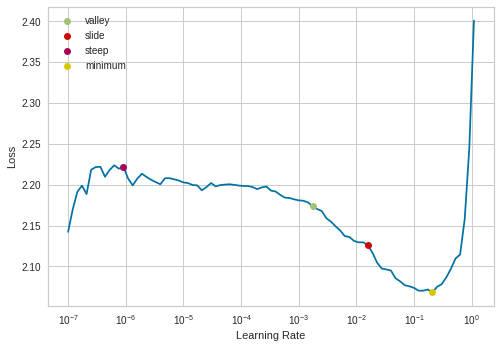

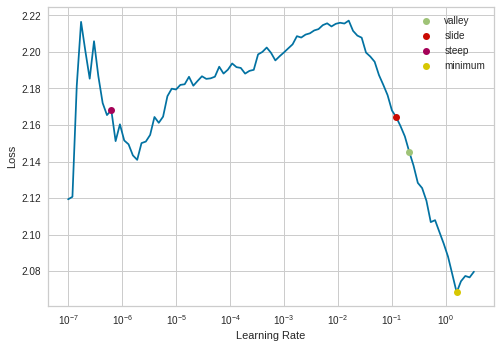

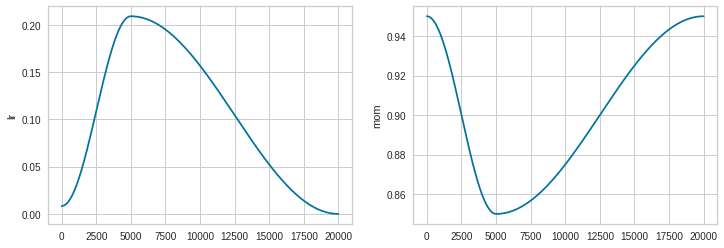

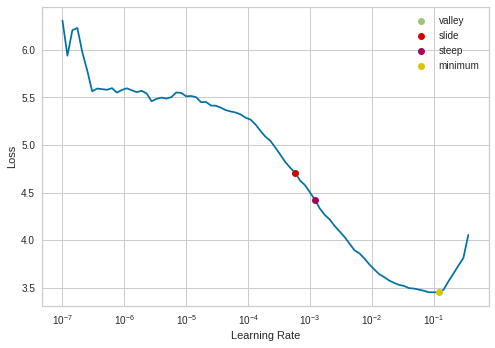

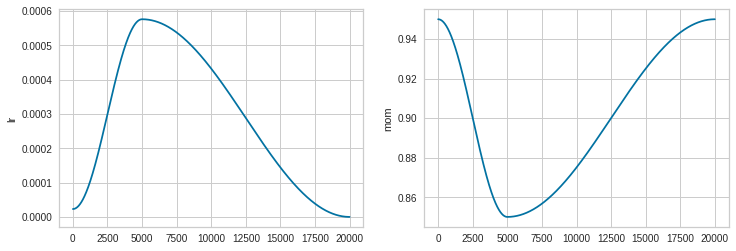

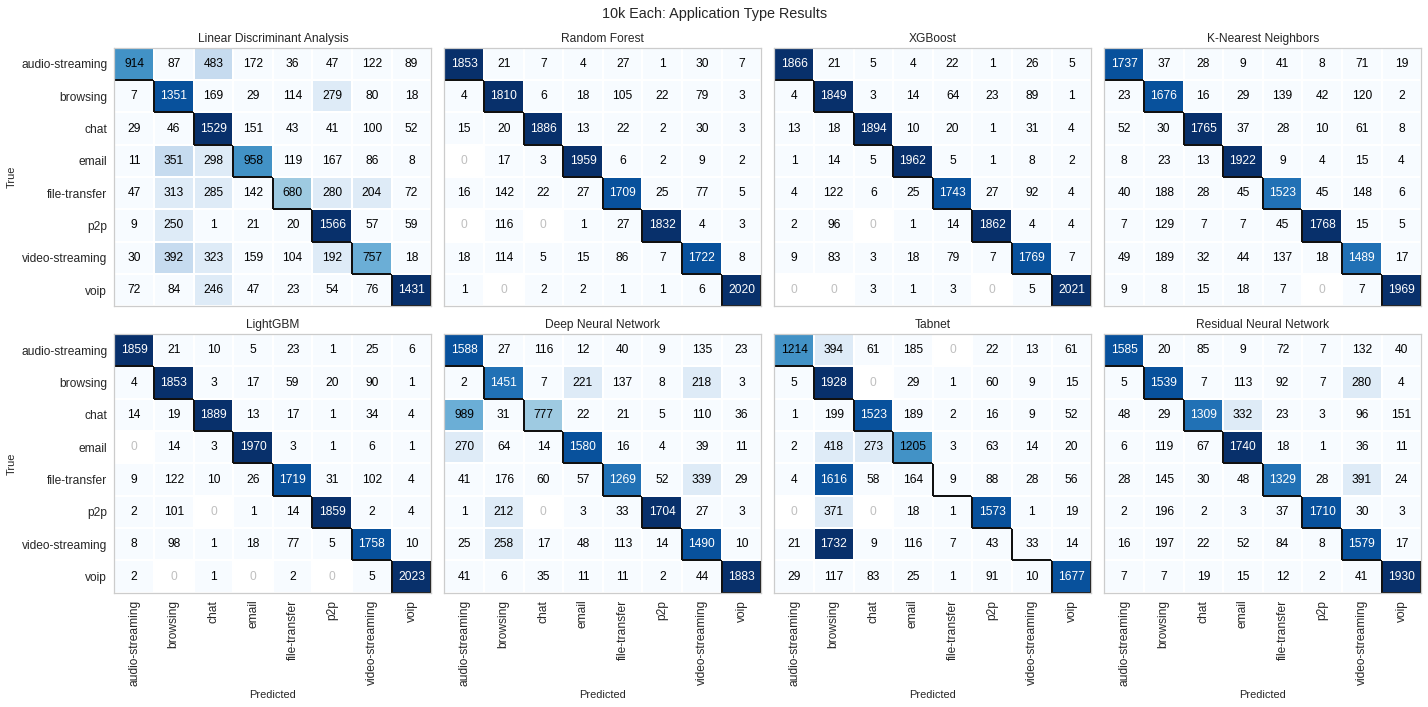

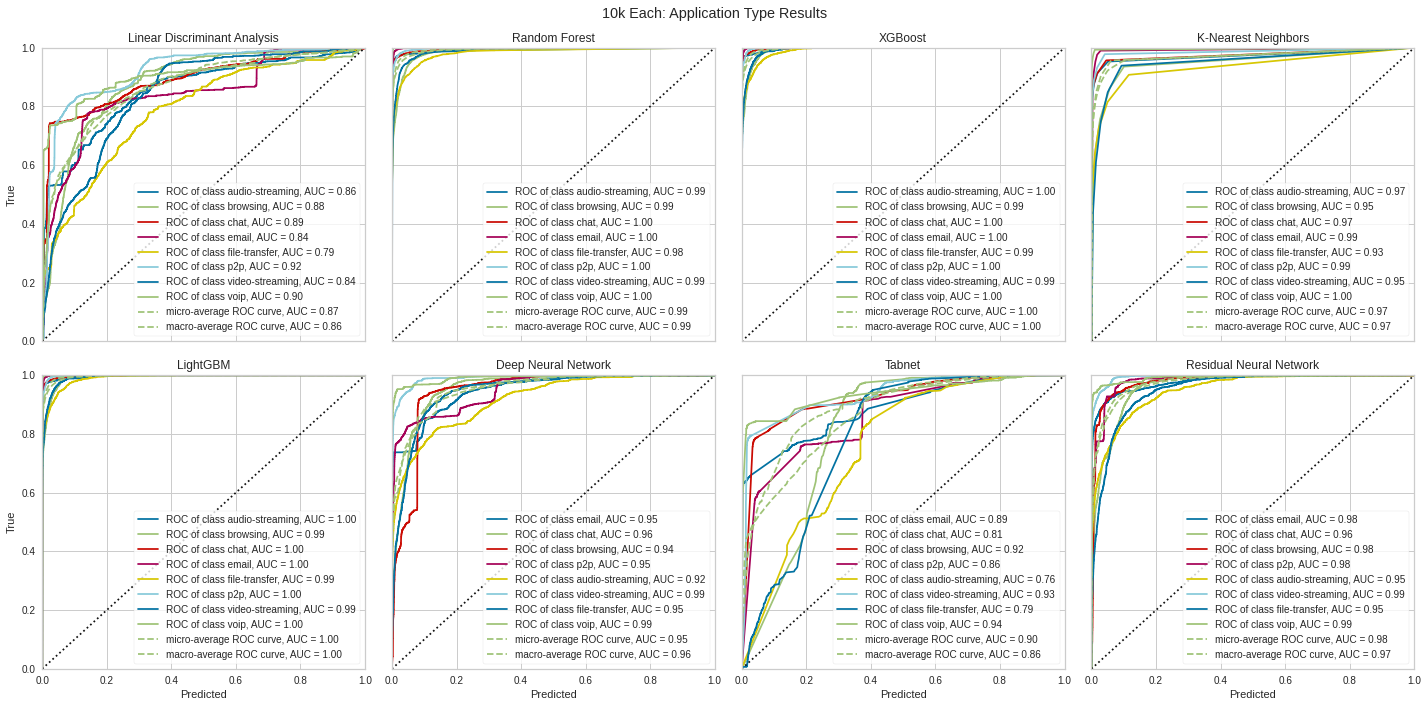

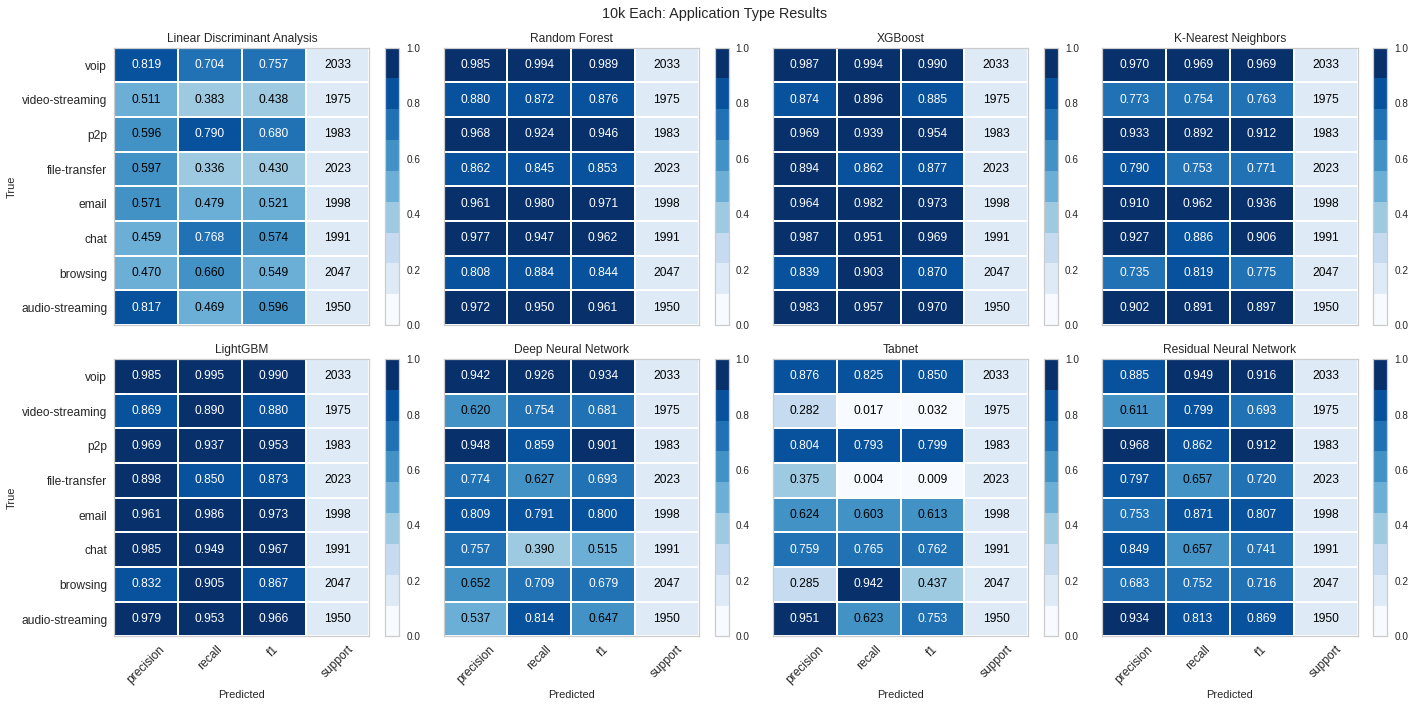

In [132]:
smote_balanced_application_dataset_labels_10_10_10 = train_and_evaluate_n_classifiers(smote_balanced_application_dataset_labels_10_10_10['Dataset'], classifiers, 'Application Type', classifier_names, shallow_classifiers, shape, "10k Each: Application Type Results", epochs=20, experiment_set_name='smote_balanced_application_dataset_labels_10_10_10')

Results for Linear Discriminant Analysis
              precision    recall  f1-score   support

           0       0.82      0.46      0.59      3037
           1       0.45      0.64      0.53      2978
           2       0.46      0.76      0.58      2986
           3       0.57      0.49      0.52      3043
           4       0.61      0.35      0.44      3023
           5       0.61      0.81      0.70      3018
           6       0.50      0.38      0.43      2975
           7       0.84      0.72      0.78      2940

    accuracy                           0.58     24000
   macro avg       0.61      0.58      0.57     24000
weighted avg       0.61      0.58      0.57     24000

	Accuracy: 0.5754583333333333

	F1: 0.570196193104458

	AUC: 0.8687813737095315

	Mathew's Correlation: 0.5202744795461213

Results for Random Forest
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3037
           1       0.83      0.90      0.86      

/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:48:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results for XGBoost
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3037
           1       0.85      0.91      0.88      2978
           2       0.98      0.95      0.97      2986
           3       0.97      0.99      0.98      3043
           4       0.91      0.86      0.89      3023
           5       0.96      0.95      0.96      3018
           6       0.88      0.91      0.90      2975
           7       0.99      0.99      0.99      2940

    accuracy                           0.94     24000
   macro avg       0.94      0.94      0.94     24000
weighted avg       0.94      0.94      0.94     24000

	Accuracy: 0.9409583333333333

	F1: 0.9412123956016397

	AUC: 0.996973656775

/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Condensed results:
Results for Linear Discriminant Analysis. Acc: 0.5754583333333333, F1: 0.570196193104458, AUC: 0.8687813737095315, MCC: 0.5202744795461213
Results for Random Forest. Acc: 0.935625, F1: 0.9359099695467682, AUC: 0.9944125001855533, MCC: 0.9265259405658925
Results for XGBoost. Acc: 0.9409583333333333, F1: 0.9412123956016397, AUC: 0.9969736567758264, MCC: 0.9326195537699093


/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Results for K-Nearest Neighbors. Acc: 0.880625, F1: 0.880466775062798, AUC: 0.9740582455938809, MCC: 0.8636672506190368
Results for LightGBM. Acc: 0.9404166666666667, F1: 0.9406773537620435, AUC: 0.9969111134061526, MCC: 0.9320287608259386
Results for Deep Neural Network. Acc: 0.6809166666666666, F1: 0.660658949944721, AUC: 0.952453814523718, MCC: 0.6414192829832273
Results for Tabnet. Acc: 0.7441666666666666, F1: 0.7449511122867413, AUC: 0.9604270860009352, MCC: 0.708466287481639
Results for Residual Neural Network. Acc: 0.78775, F1: 0.7903316686742511, AUC: 0.973220128044984, MCC: 0.7586716531302335


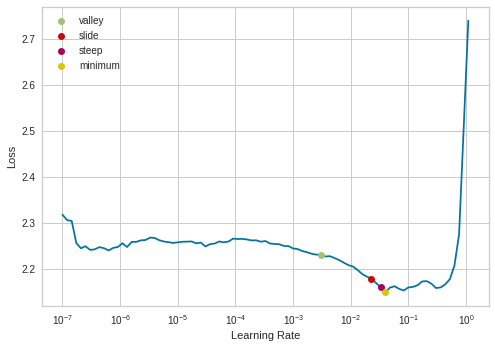

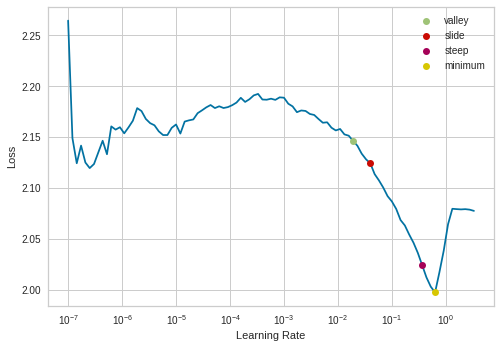

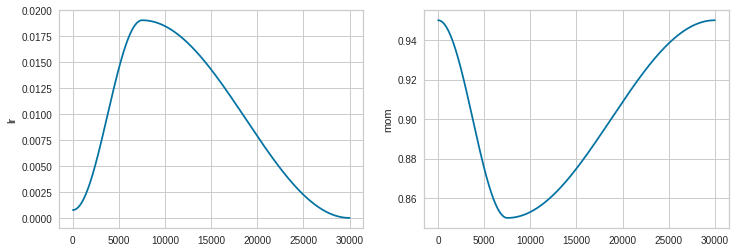

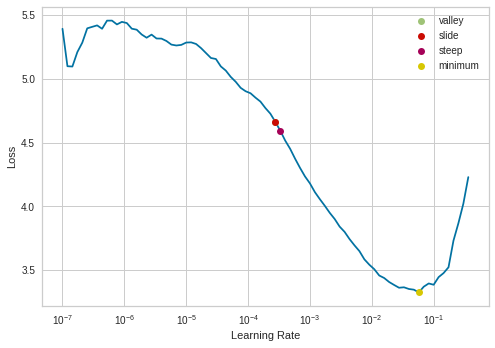

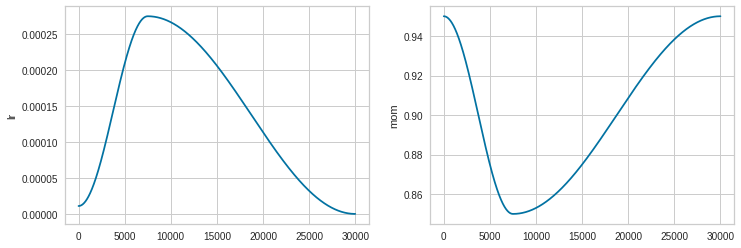

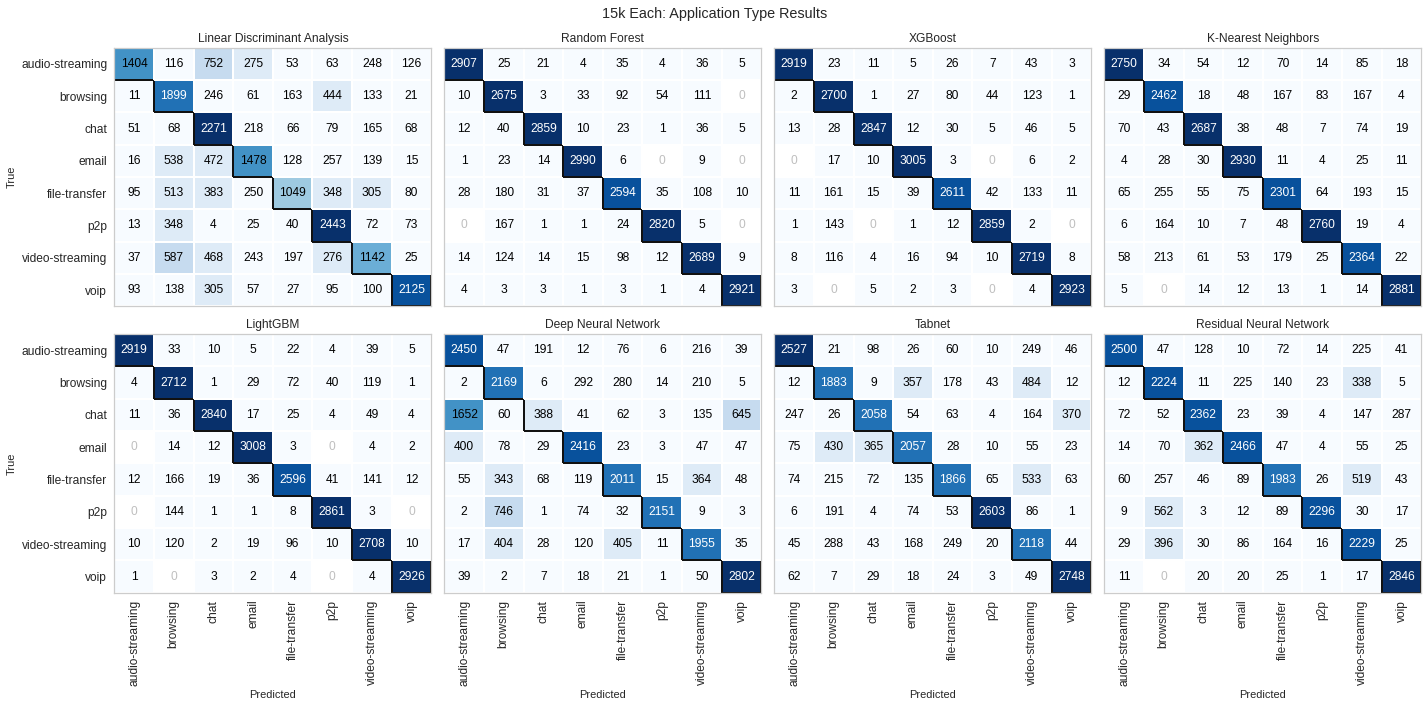

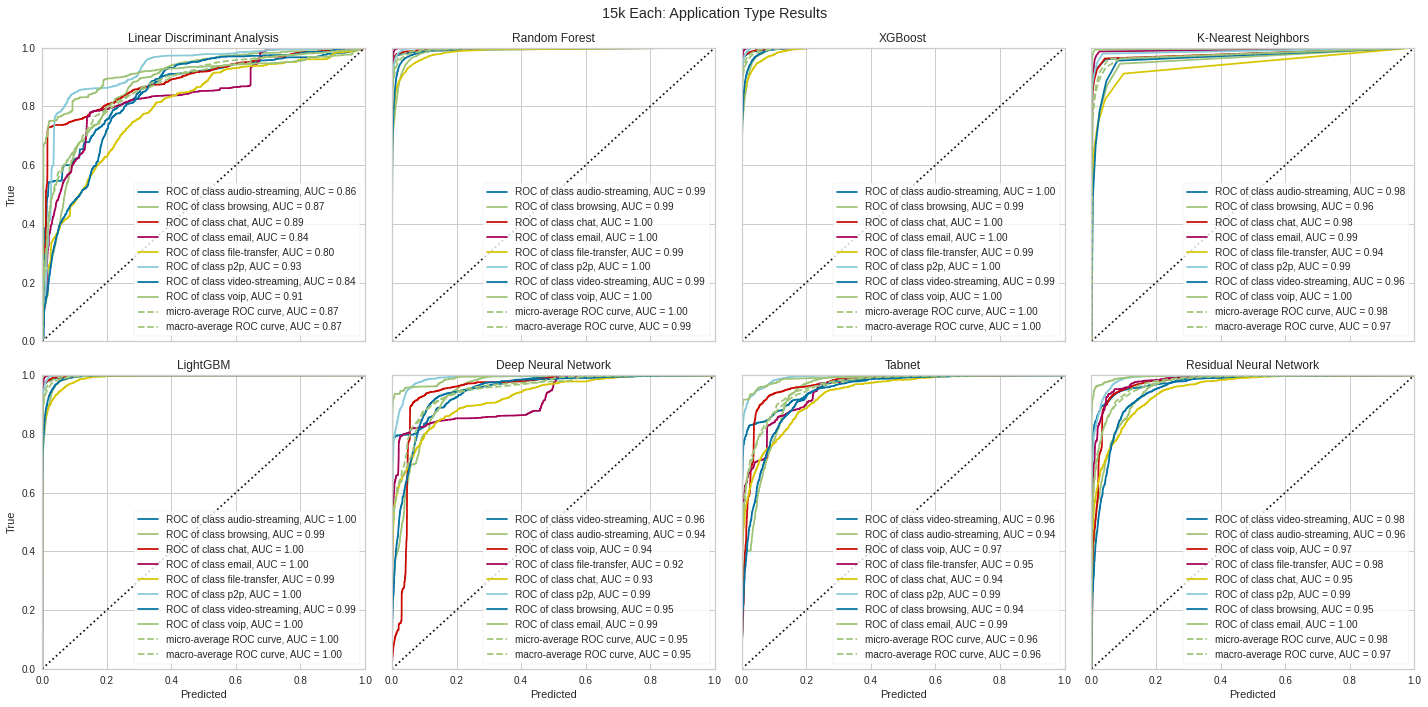

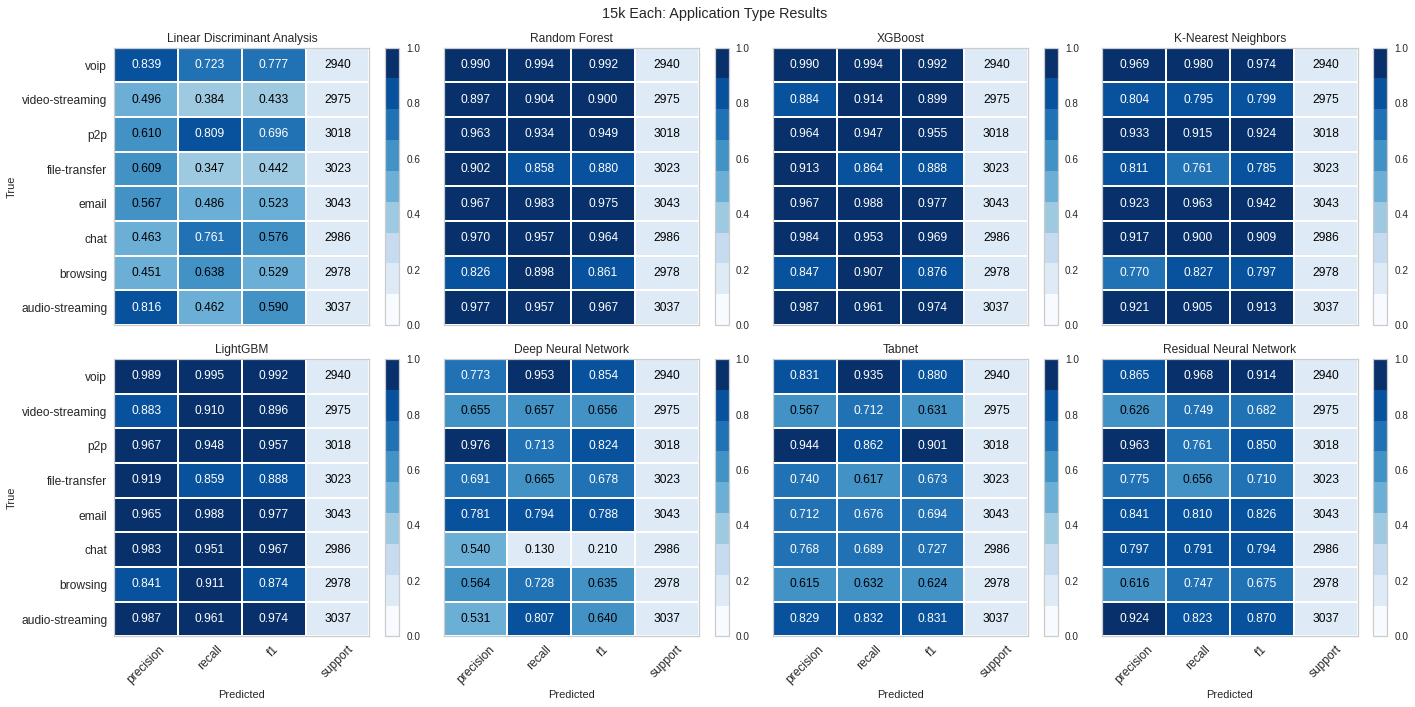

In [133]:
smote_balanced_application_dataset_labels_15_15_15 = train_and_evaluate_n_classifiers(smote_balanced_application_dataset_labels_15_15_15['Dataset'], classifiers, 'Application Type', classifier_names, shallow_classifiers, shape, "15k Each: Application Type Results", epochs=20, experiment_set_name='smote_balanced_application_dataset_labels_15_15_15')

Results for Linear Discriminant Analysis
              precision    recall  f1-score   support

           0       0.84      0.51      0.63      4082
           1       0.47      0.66      0.55      4044
           2       0.47      0.78      0.59      3928
           3       0.57      0.50      0.53      3922
           4       0.59      0.34      0.43      4057
           5       0.62      0.80      0.70      3976
           6       0.51      0.38      0.43      4026
           7       0.83      0.72      0.77      3965

    accuracy                           0.58     32000
   macro avg       0.61      0.59      0.58     32000
weighted avg       0.61      0.58      0.58     32000

	Accuracy: 0.58453125

	F1: 0.5791263683321313

	AUC: 0.871659092346657

	Mathew's Correlation: 0.530582269326529

Results for Random Forest
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4082
           1       0.83      0.90      0.87      4044
    

/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:05:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results for XGBoost
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4082
           1       0.84      0.91      0.88      4044
           2       0.99      0.96      0.97      3928
           3       0.97      0.99      0.98      3922
           4       0.92      0.85      0.89      4057
           5       0.96      0.95      0.96      3976
           6       0.89      0.92      0.90      4026
           7       0.99      0.99      0.99      3965

    accuracy                           0.94     32000
   macro avg       0.94      0.94      0.94     32000
weighted avg       0.94      0.94      0.94     32000

	Accuracy: 0.94240625

	F1: 0.9426067107882394

	AUC: 0.9970868317426014

	M

/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Condensed results:
Results for Linear Discriminant Analysis. Acc: 0.58453125, F1: 0.5791263683321313, AUC: 0.871659092346657, MCC: 0.530582269326529
Results for Random Forest. Acc: 0.940125, F1: 0.940398064099481, AUC: 0.9954007916048224, MCC: 0.9316744058916174


/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Results for XGBoost. Acc: 0.94240625, F1: 0.9426067107882394, AUC: 0.9970868317426014, MCC: 0.9343043671892131
Results for K-Nearest Neighbors. Acc: 0.88684375, F1: 0.8866532487780112, AUC: 0.9760420653983372, MCC: 0.8707995240480313
Results for LightGBM. Acc: 0.940875, F1: 0.9410483406550877, AUC: 0.9969471081564893, MCC: 0.9326019809816987
Results for Deep Neural Network. Acc: 0.8006875, F1: 0.8018098334659998, AUC: 0.9728303488524714, MCC: 0.773444468289163
Results for Tabnet. Acc: 0.7605, F1: 0.7598982635878008, AUC: 0.9628147885087253, MCC: 0.7282310711597302
Results for Residual Neural Network. Acc: 0.8159375, F1: 0.8176337411995942, AUC: 0.9769186197847959, MCC: 0.7901512881563879


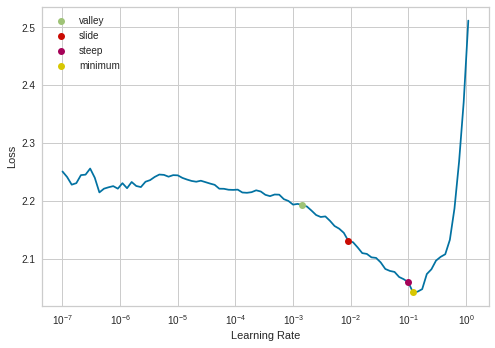

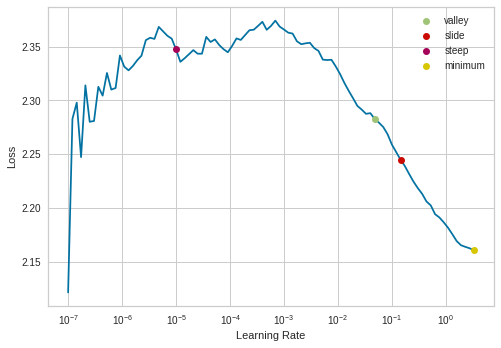

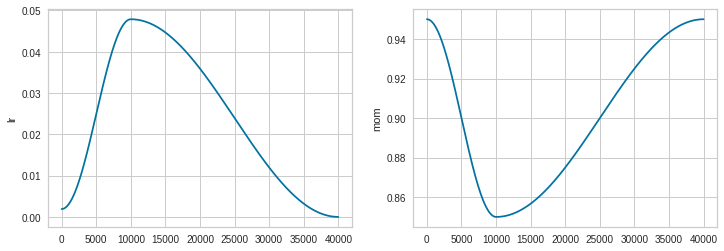

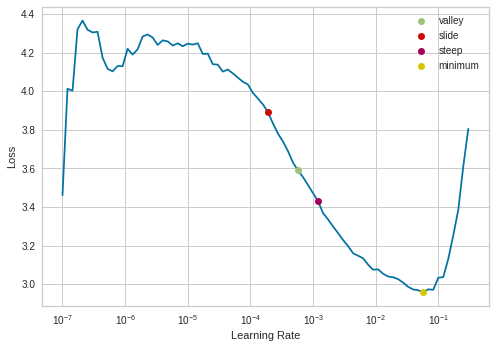

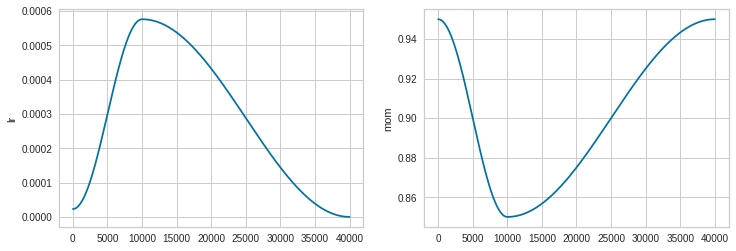

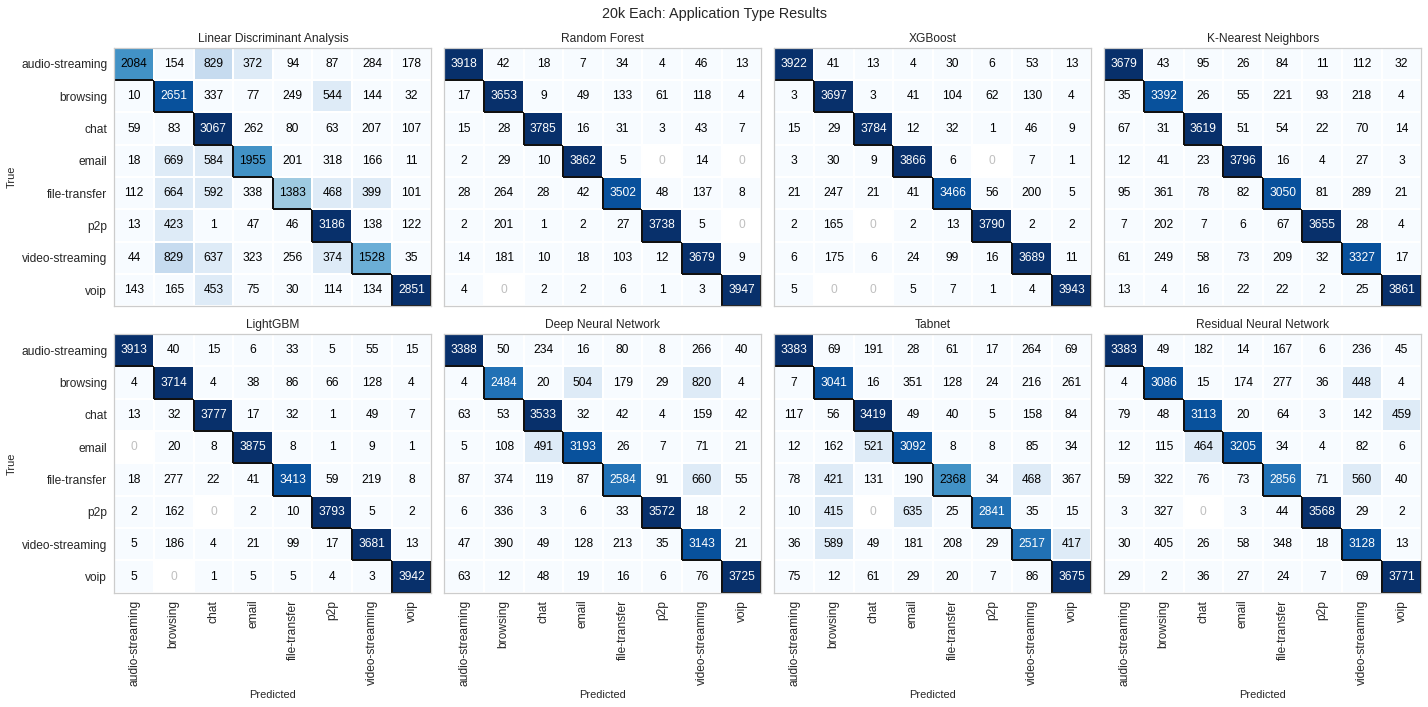

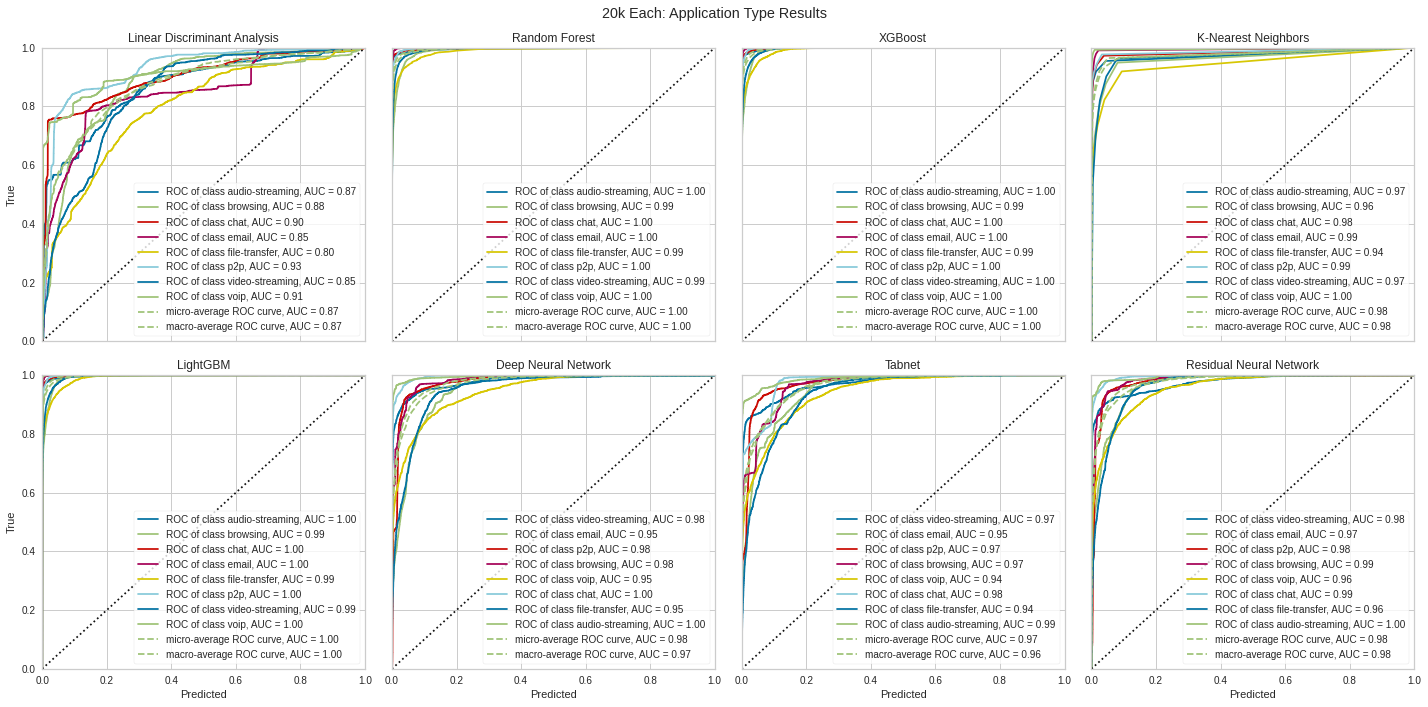

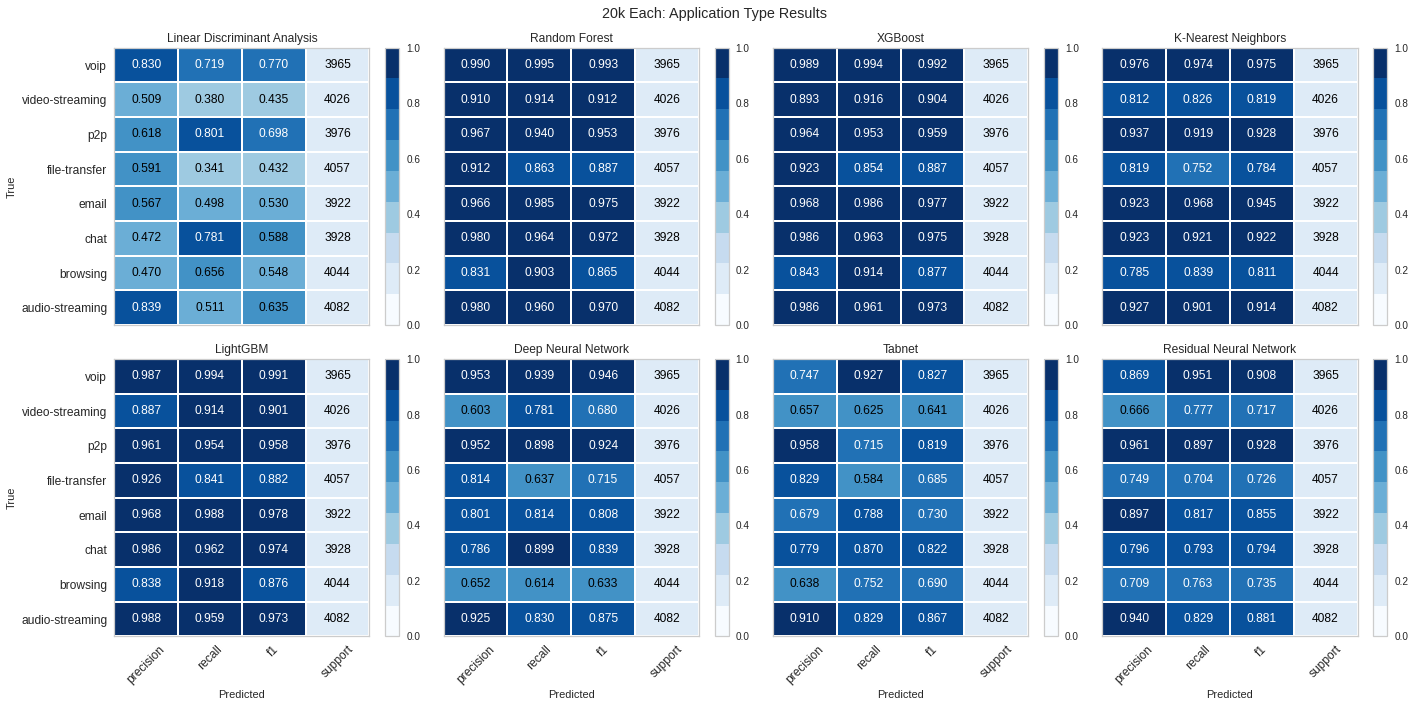

In [10]:
smote_balanced_application_dataset_labels_20_20_20 = train_and_evaluate_n_classifiers(smote_balanced_application_dataset_labels_20_20_20['Dataset'], classifiers, 'Application Type', classifier_names, shallow_classifiers, shape, "20k Each: Application Type Results", epochs=20, experiment_set_name='smote_balanced_application_dataset_labels_20_20_20')

Results for Linear Discriminant Analysis
              precision    recall  f1-score   support

           0       0.85      0.50      0.63      5072
           1       0.46      0.64      0.53      4857
           2       0.47      0.78      0.58      4921
           3       0.60      0.51      0.55      5031
           4       0.60      0.35      0.44      5033
           5       0.62      0.81      0.70      4973
           6       0.51      0.39      0.45      4970
           7       0.83      0.74      0.78      5143

    accuracy                           0.59     40000
   macro avg       0.62      0.59      0.58     40000
weighted avg       0.62      0.59      0.58     40000

	Accuracy: 0.58925

	F1: 0.5847133132747618

	AUC: 0.8720529788712372

	Mathew's Correlation: 0.5361764004513497

Results for Random Forest
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5072
           1       0.84      0.92      0.88      4857
     

/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:53:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results for XGBoost
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5072
           1       0.85      0.93      0.89      4857
           2       0.98      0.97      0.97      4921
           3       0.97      0.99      0.98      5031
           4       0.93      0.86      0.89      5033
           5       0.97      0.95      0.96      4973
           6       0.90      0.92      0.91      4970
           7       0.99      1.00      0.99      5143

    accuracy                           0.95     40000
   macro avg       0.95      0.95      0.95     40000
weighted avg       0.95      0.95      0.95     40000

	Accuracy: 0.94665

	F1: 0.9468525478600958

	AUC: 0.9975114749492829

	Math

/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Condensed results:
Results for Linear Discriminant Analysis. Acc: 0.58925, F1: 0.5847133132747618, AUC: 0.8720529788712372, MCC: 0.5361764004513497
Results for Random Forest. Acc: 0.946775, F1: 0.9470329747685592, AUC: 0.9958117301598804, MCC: 0.9392751242668897


/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Results for XGBoost. Acc: 0.94665, F1: 0.9468525478600958, AUC: 0.9975114749492829, MCC: 0.9391695557796478
Results for K-Nearest Neighbors. Acc: 0.8952, F1: 0.8951417857060671, AUC: 0.9779124823715915, MCC: 0.8803102660157605
Results for LightGBM. Acc: 0.9439, F1: 0.9441412718029379, AUC: 0.9972546447868611, MCC: 0.9360668778667159
Results for Deep Neural Network. Acc: 0.7485, F1: 0.7490582256857364, AUC: 0.9621613785736471, MCC: 0.7146539186084993
Results for Tabnet. Acc: 0.607325, F1: 0.5991015679100451, AUC: 0.8842106105743719, MCC: 0.5706001823950811
Results for Residual Neural Network. Acc: 0.770475, F1: 0.7726368801655125, AUC: 0.9737092058384283, MCC: 0.7395440182795934


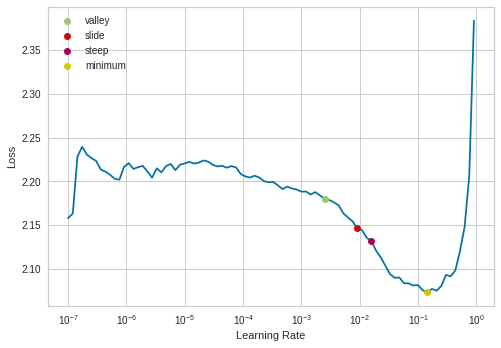

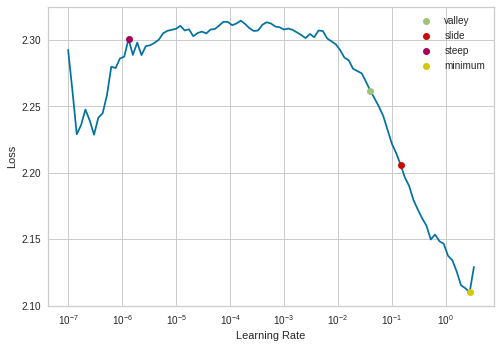

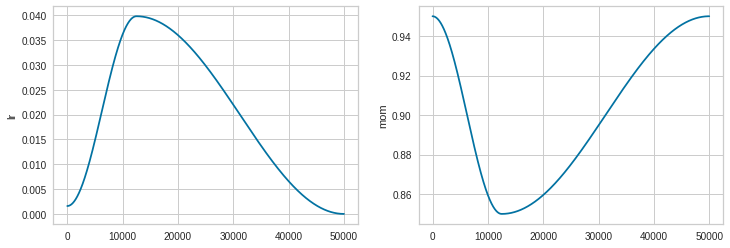

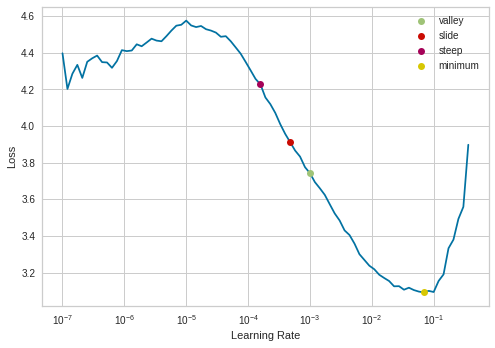

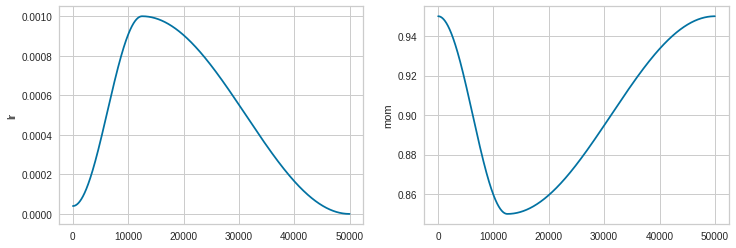

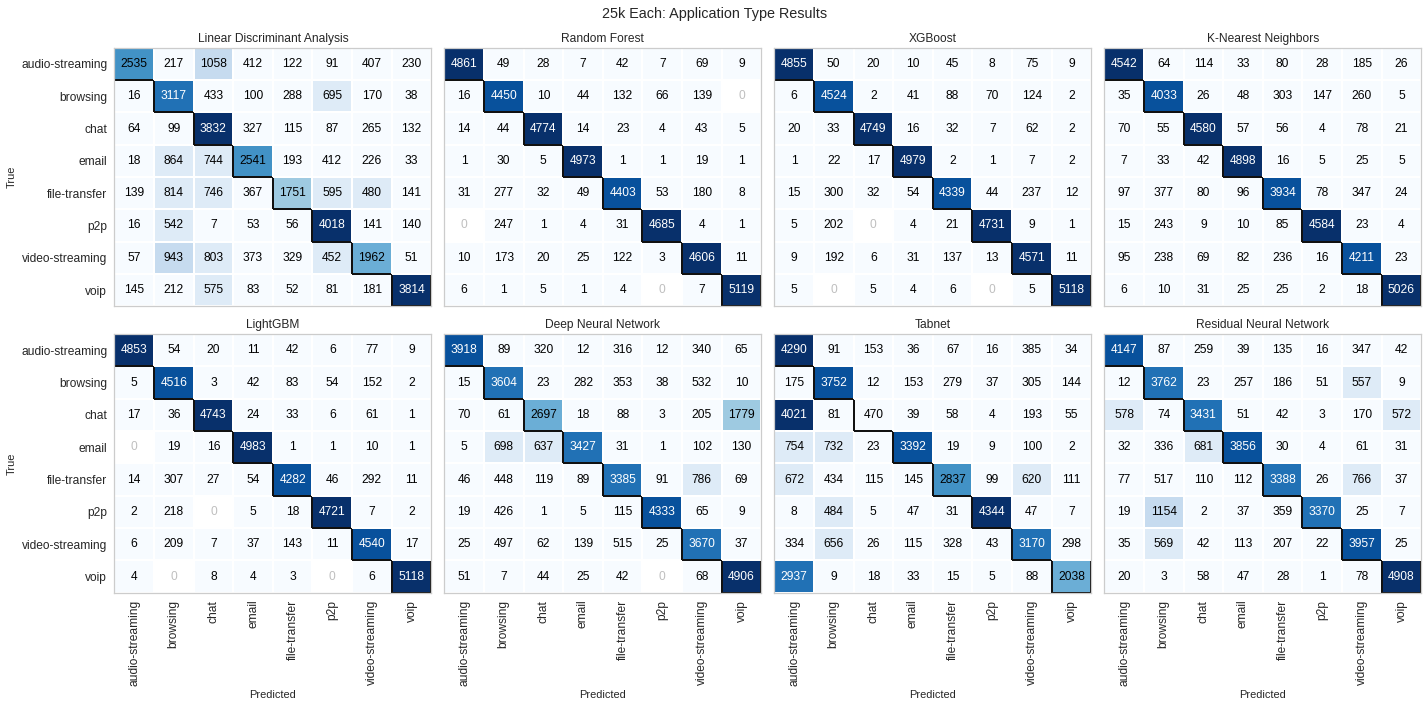

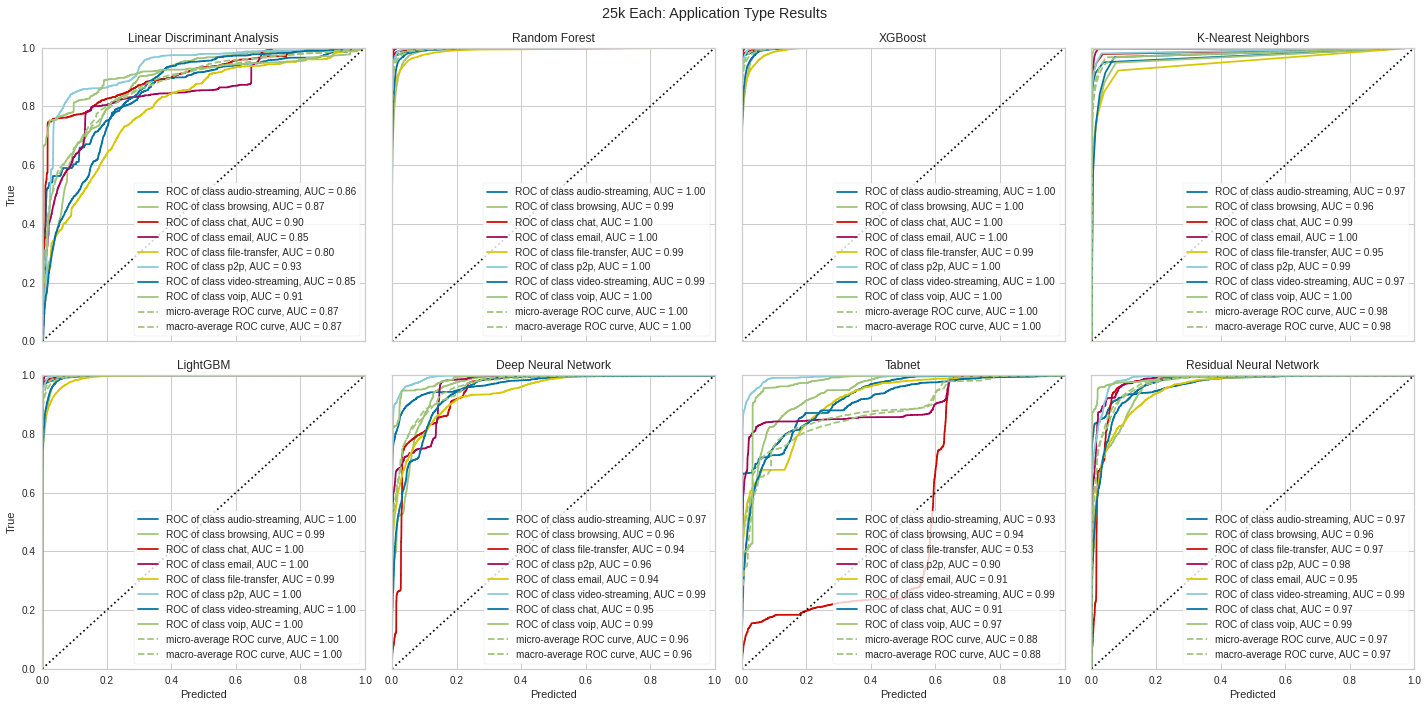

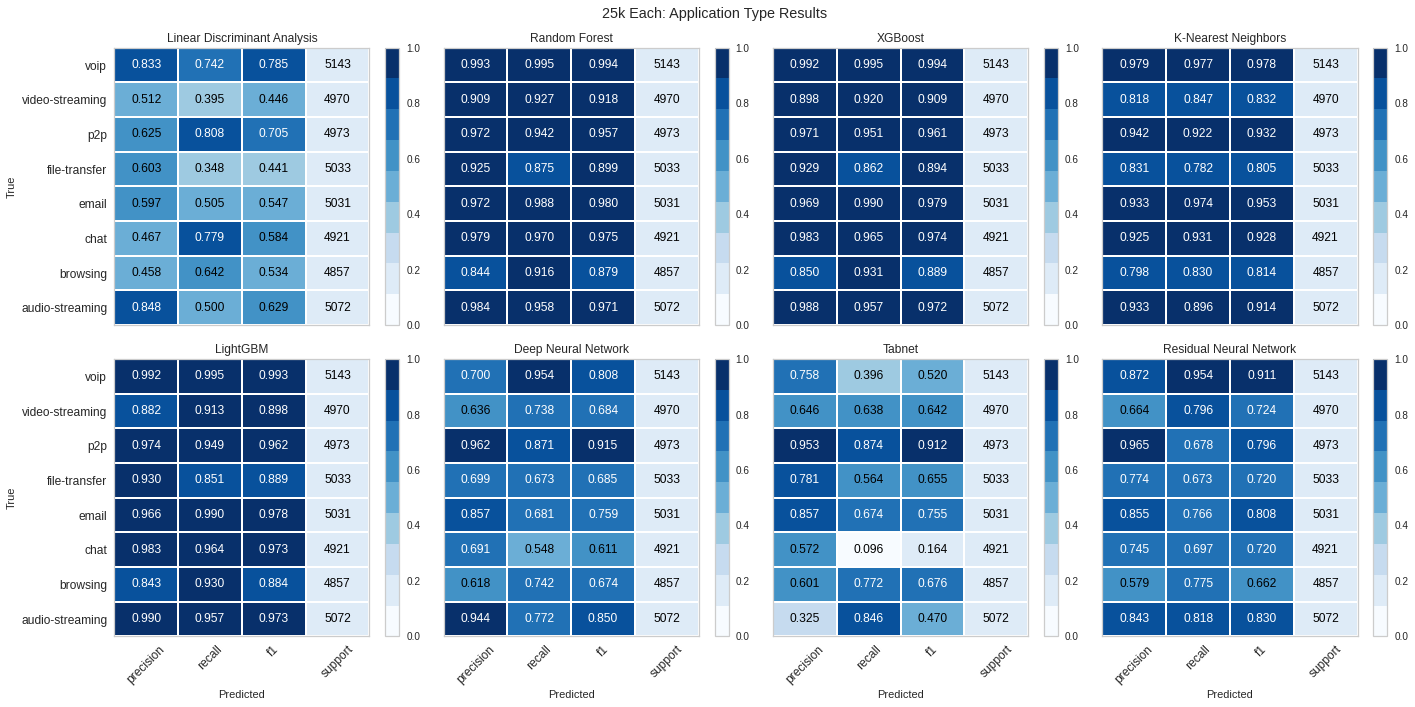

In [12]:
smote_balanced_application_dataset_labels_25_25_25 = train_and_evaluate_n_classifiers(smote_balanced_application_dataset_labels_25_25_25['Dataset'], classifiers, 'Application Type', classifier_names, shallow_classifiers, shape, "25k Each: Application Type Results", epochs=20,experiment_set_name='smote_balanced_application_dataset_labels_25_25_25')

Results for Linear Discriminant Analysis
              precision    recall  f1-score   support

           0       0.83      0.49      0.61      9757
           1       0.46      0.64      0.53      9713
           2       0.47      0.77      0.58      9616
           3       0.58      0.51      0.54      9620
           4       0.60      0.34      0.44      9837
           5       0.63      0.80      0.70      9647
           6       0.50      0.39      0.44      9756
           7       0.83      0.73      0.78      9686

    accuracy                           0.58     77632
   macro avg       0.61      0.58      0.58     77632
weighted avg       0.61      0.58      0.58     77632

	Accuracy: 0.5838958161582852

	F1: 0.5790799631974141

	AUC: 0.8729047114564522

	Mathew's Correlation: 0.5297939998070791

Results for Random Forest
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      9757
           1       0.86      0.93      0.89     

/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:49:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results for XGBoost
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      9757
           1       0.87      0.91      0.89      9713
           2       0.99      0.97      0.98      9616
           3       0.97      0.99      0.98      9620
           4       0.92      0.88      0.90      9837
           5       0.97      0.96      0.96      9647
           6       0.89      0.93      0.91      9756
           7       0.99      1.00      1.00      9686

    accuracy                           0.95     77632
   macro avg       0.95      0.95      0.95     77632
weighted avg       0.95      0.95      0.95     77632

	Accuracy: 0.9487067188788129

	F1: 0.948869110061962

	AUC: 0.9978628132504

/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Condensed results:
Results for Linear Discriminant Analysis. Acc: 0.5838958161582852, F1: 0.5790799631974141, AUC: 0.8729047114564522, MCC: 0.5297939998070791
Results for Random Forest. Acc: 0.9557141384995878, F1: 0.9559842486414319, AUC: 0.9976115169695539, MCC: 0.9494690542232487


/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Results for XGBoost. Acc: 0.9487067188788129, F1: 0.948869110061962, AUC: 0.9978628132504896, MCC: 0.9414435420179436
Results for K-Nearest Neighbors. Acc: 0.9117116652926628, F1: 0.9117164768071, AUC: 0.9832629725324857, MCC: 0.899146527421343
Results for LightGBM. Acc: 0.9446362324814509, F1: 0.9448267044676534, AUC: 0.9974714050672906, MCC: 0.9368231595458231
Results for Deep Neural Network. Acc: 0.7576386026380874, F1: 0.7544902132254795, AUC: 0.9662366075667207, MCC: 0.7266135444771286
Results for Tabnet. Acc: 0.7081229389942292, F1: 0.6913971195493417, AUC: 0.9221449935372336, MCC: 0.6760270995826648
Results for Residual Neural Network. Acc: 0.7726324196207749, F1: 0.7722755376015589, AUC: 0.969274764812097, MCC: 0.7423418088888034


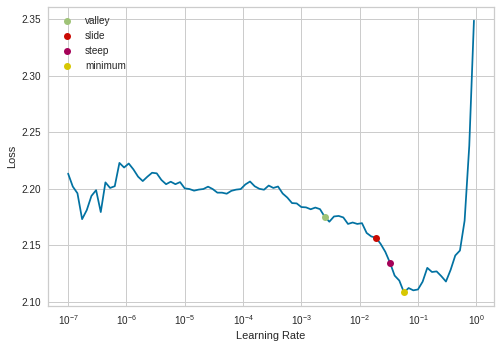

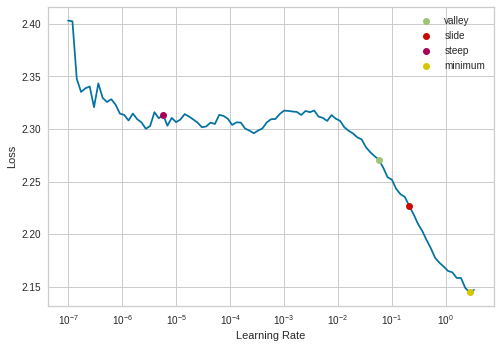

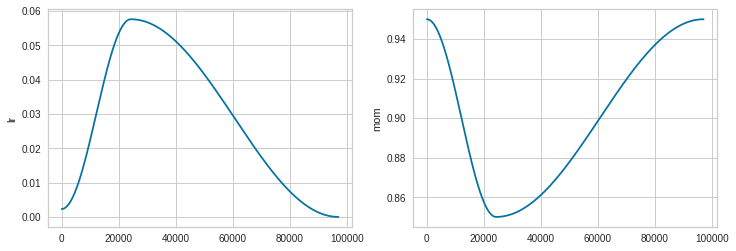

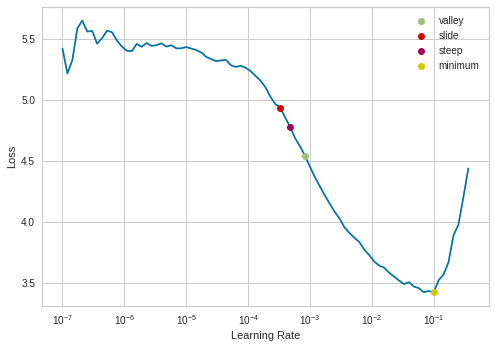

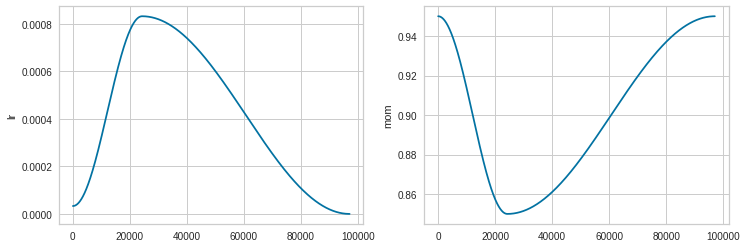

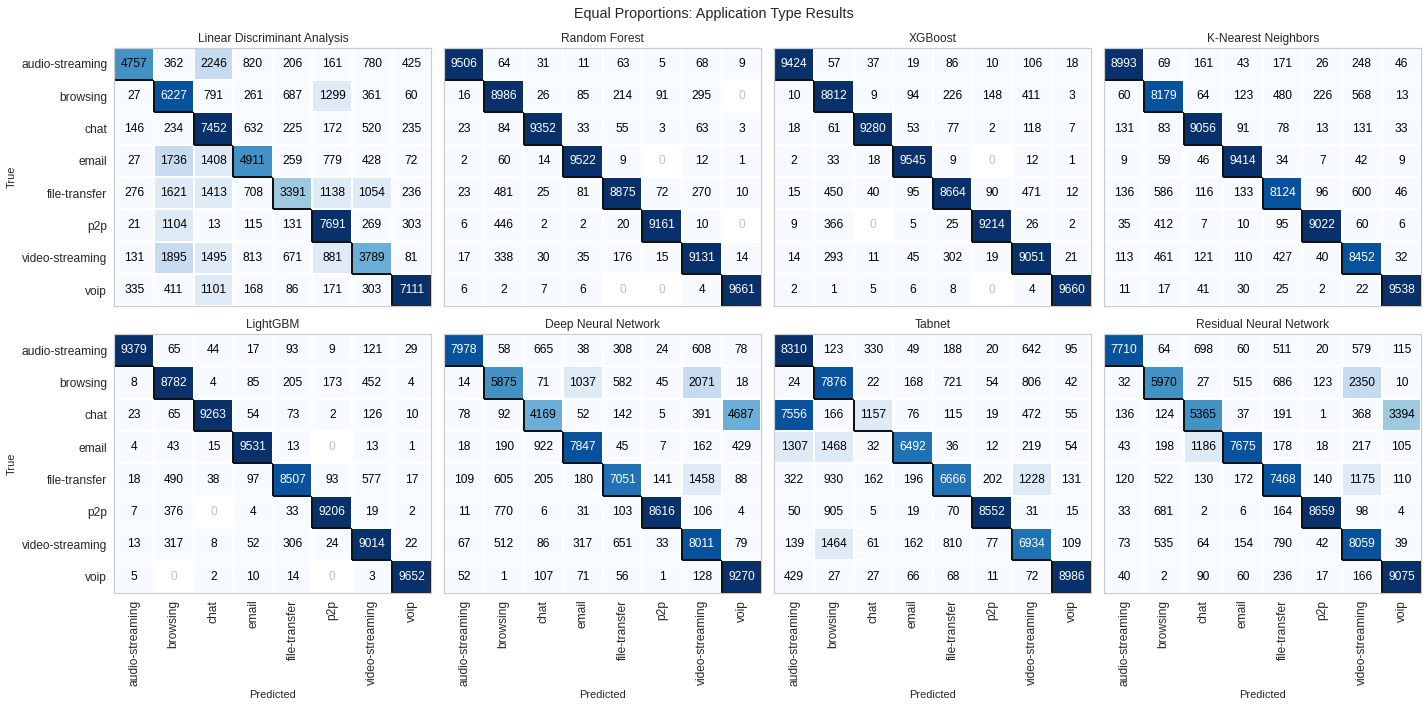

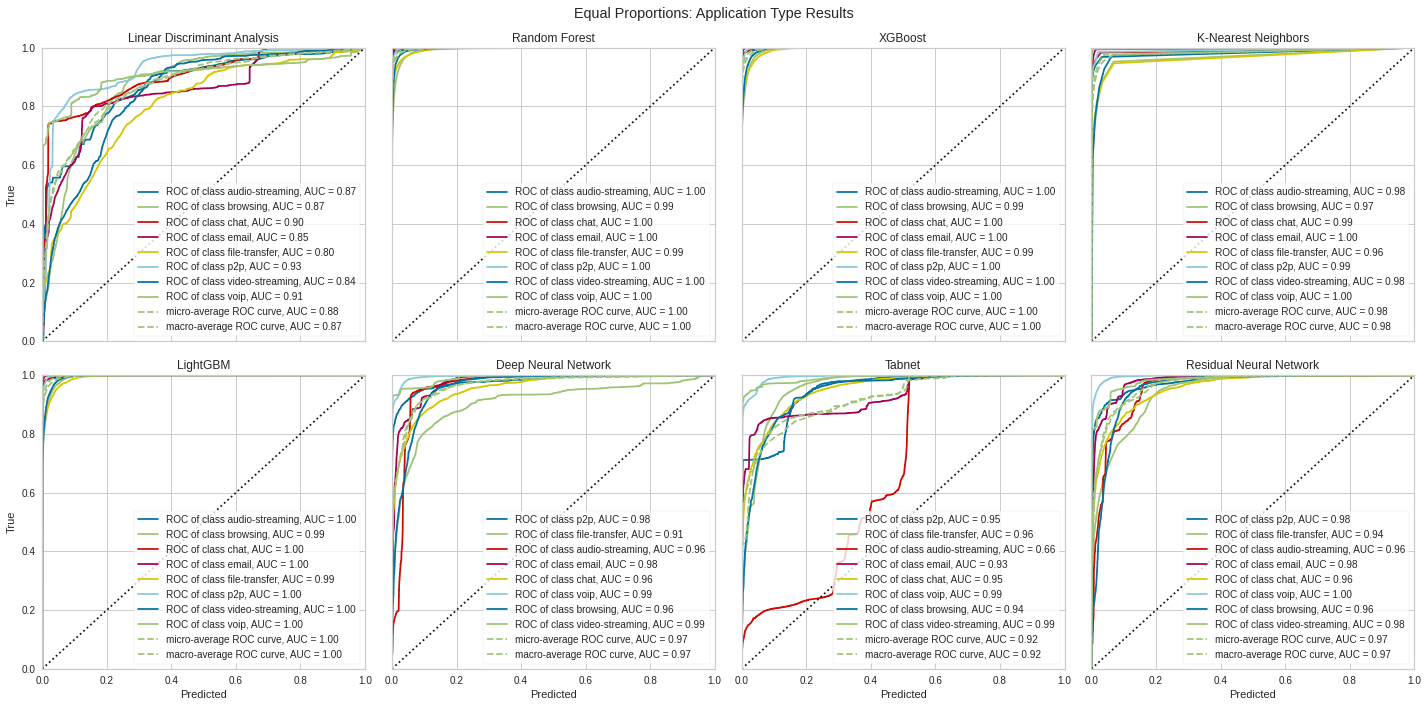

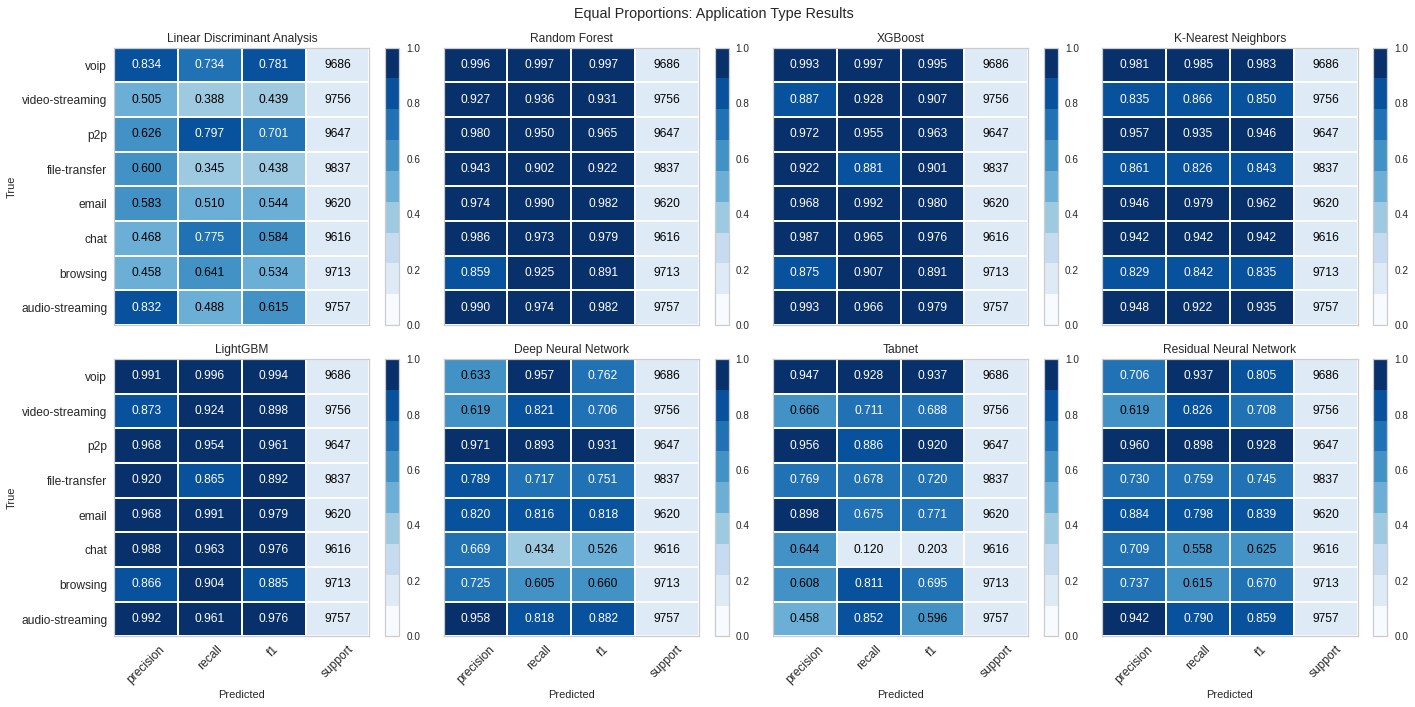

In [13]:
smote_balanced_application_dataset_labels_equal = train_and_evaluate_n_classifiers(smote_balanced_application_dataset_labels_equal['Dataset'], classifiers, 'Application Type', classifier_names, shallow_classifiers, shape, "Equal Proportions: Application Type Results", epochs=20, experiment_set_name='smote_balanced_application_dataset_labels_equal')

Results for Linear Discriminant Analysis
              precision    recall  f1-score   support

           0       0.85      0.53      0.65      5973
           1       0.47      0.64      0.54      5985
           2       0.47      0.78      0.59      5892
           3       0.59      0.50      0.54      6046
           4       0.60      0.34      0.43      6056
           5       0.62      0.81      0.70      6037
           6       0.51      0.40      0.45      5919
           7       0.84      0.75      0.79      6092

    accuracy                           0.59     48000
   macro avg       0.62      0.59      0.59     48000
weighted avg       0.62      0.59      0.59     48000

	Accuracy: 0.5912916666666667

	F1: 0.5862621515180535

	AUC: 0.8731984013448537

	Mathew's Correlation: 0.5380891829773763

Results for Random Forest
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5973
           1       0.87      0.92      0.89     

/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[01:10:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results for XGBoost
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5973
           1       0.86      0.93      0.89      5985
           2       0.99      0.97      0.98      5892
           3       0.97      0.99      0.98      6046
           4       0.93      0.87      0.90      6056
           5       0.97      0.95      0.96      6037
           6       0.89      0.92      0.91      5919
           7       0.99      0.99      0.99      6092

    accuracy                           0.95     48000
   macro avg       0.95      0.95      0.95     48000
weighted avg       0.95      0.95      0.95     48000

	Accuracy: 0.9476041666666667

	F1: 0.9478004901921739

	AUC: 0.997669018196

/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be rem

Condensed results:
Results for Linear Discriminant Analysis. Acc: 0.5912916666666667, F1: 0.5862621515180535, AUC: 0.8731984013448537, MCC: 0.5380891829773763
Results for Random Forest. Acc: 0.9497916666666667, F1: 0.949979250999753, AUC: 0.9965451343355458, MCC: 0.9426792893020576


/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Results for XGBoost. Acc: 0.9476041666666667, F1: 0.9478004901921739, AUC: 0.9976690181969213, MCC: 0.9402367152535679
Results for K-Nearest Neighbors. Acc: 0.9007291666666667, F1: 0.9005765094302585, AUC: 0.9799955868894099, MCC: 0.8866025661756669
Results for LightGBM. Acc: 0.9435625, F1: 0.9437319013454071, AUC: 0.9973039986695484, MCC: 0.9356493611122718
Results for Deep Neural Network. Acc: 0.7458333333333333, F1: 0.7450975589566055, AUC: 0.9444044167587743, MCC: 0.7116096942731631
Results for Tabnet. Acc: 0.8070833333333334, F1: 0.8087920888263305, AUC: 0.9731783524478308, MCC: 0.7800123101020852
Results for Residual Neural Network. Acc: 0.7655833333333333, F1: 0.7683351155999514, AUC: 0.9676184884614021, MCC: 0.7342958511051665


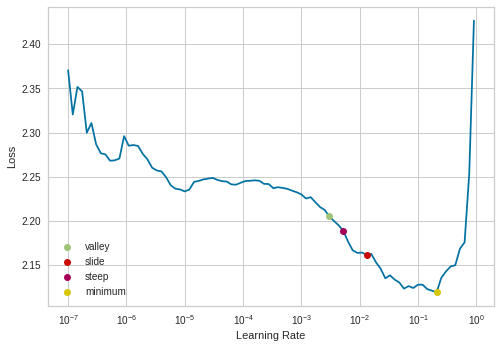

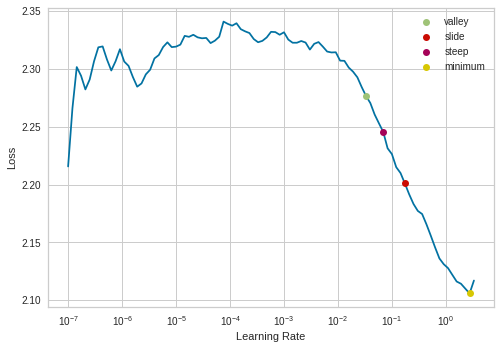

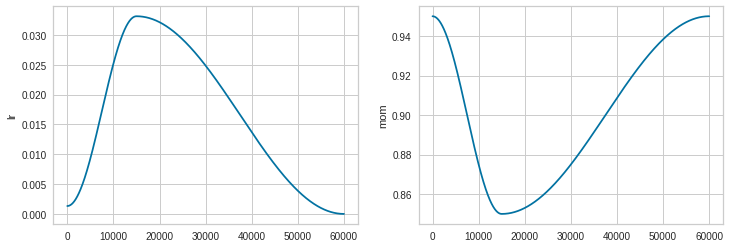

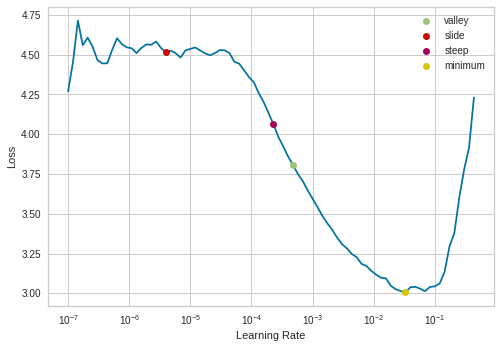

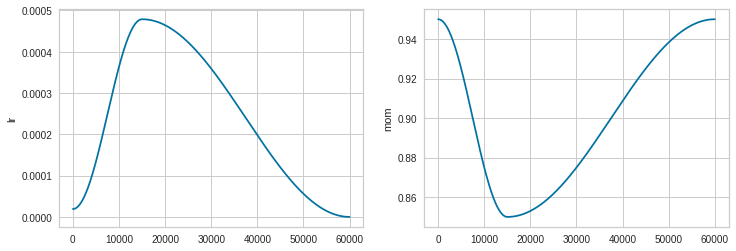

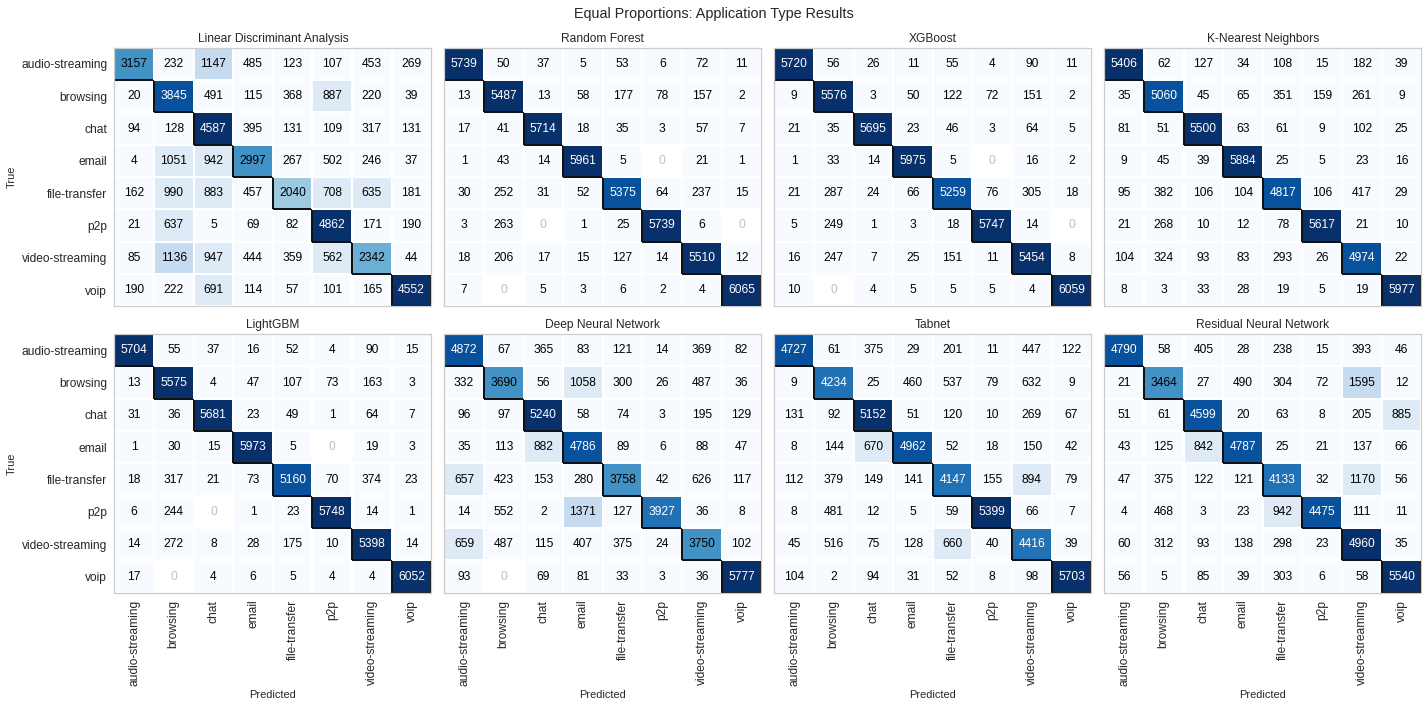

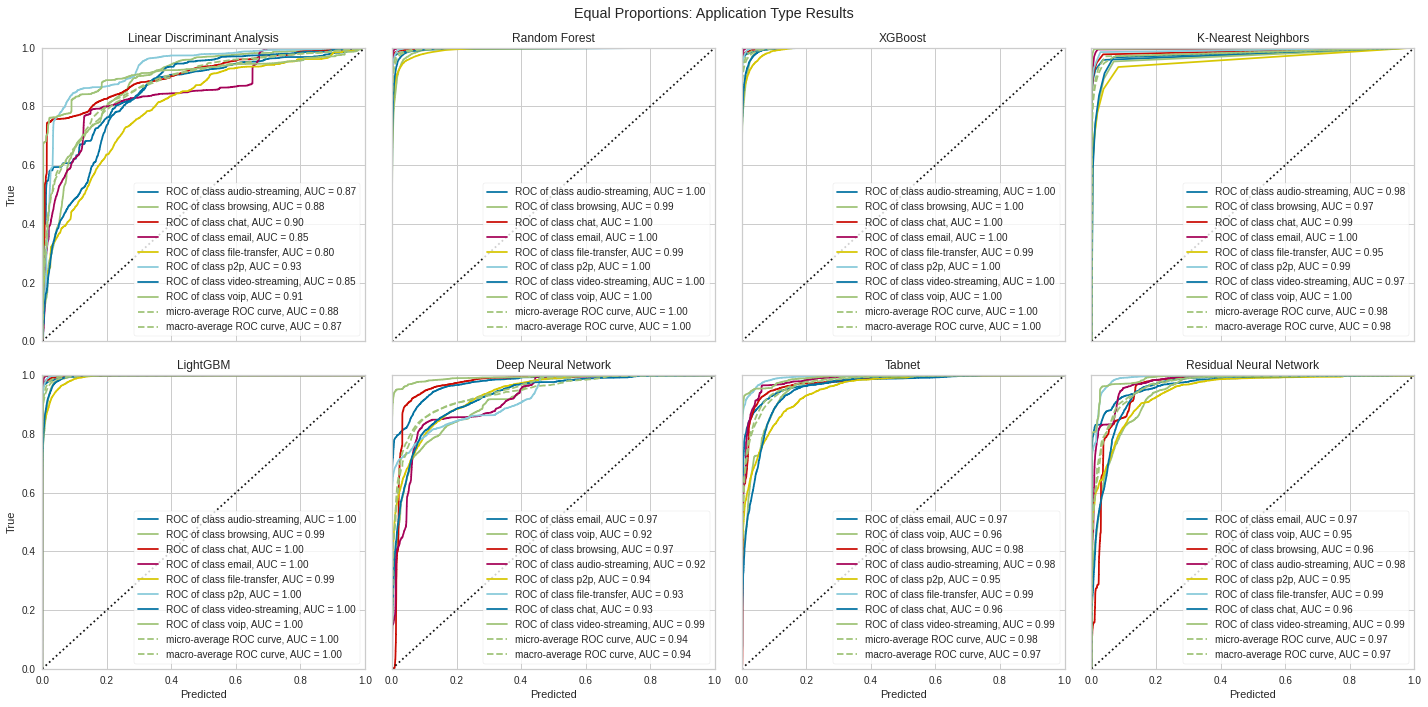

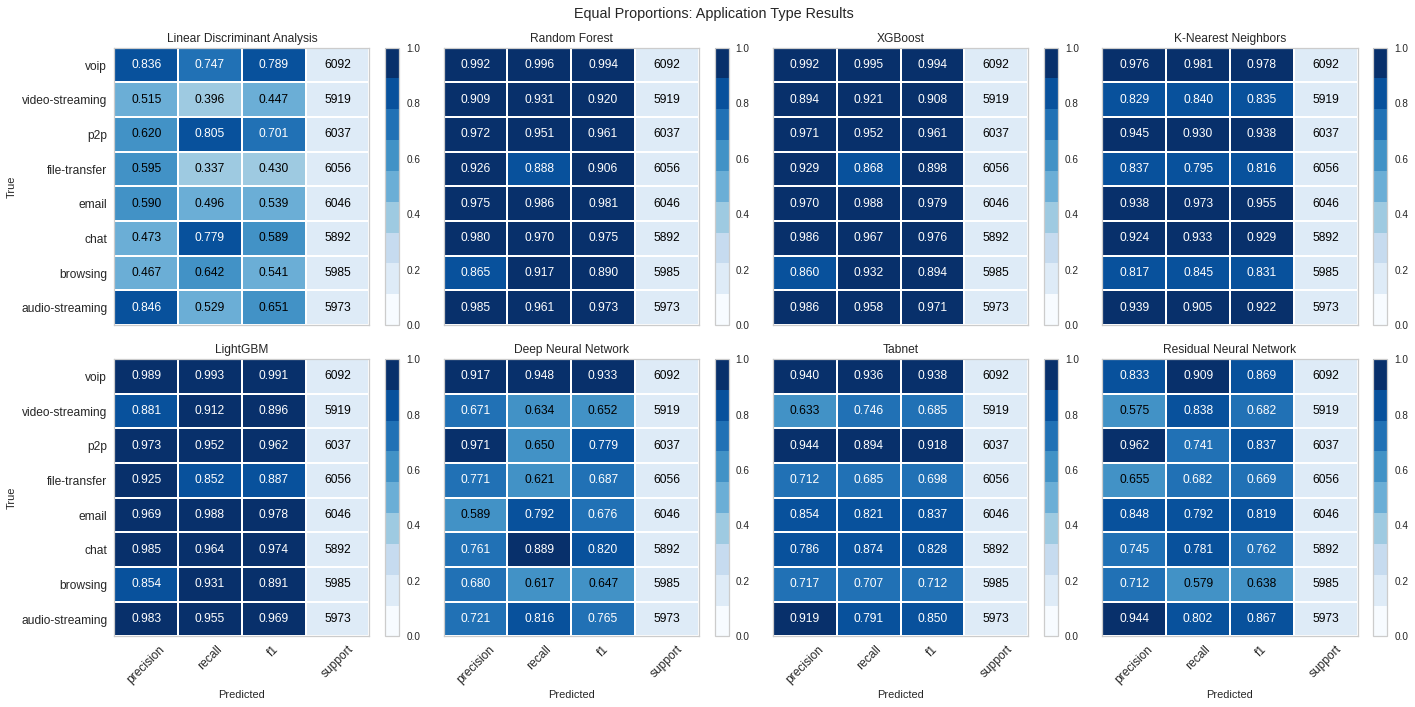

In [14]:
smote_balanced_application_dataset_labels_30_30_30 = train_and_evaluate_n_classifiers(smote_balanced_application_dataset_labels_30_30_30['Dataset'], classifiers, 'Application Type', classifier_names, shallow_classifiers, shape, "Equal Proportions: Application Type Results", epochs=20, experiment_set_name='smote_balanced_application_dataset_labels_30_30_30')